In [1]:
import os
import tarfile
import urllib

import pandas as pd

import matplotlib.pyplot as plt

import datetime

import glob
import dill

initial_localtime = datetime.datetime.now()
print('Execution started at: ', initial_localtime)

Execution started at:  2020-12-21 23:52:35.326594


In [2]:
HOUSING_PATH = os.path.join("datasets","idealista+registros")
os.makedirs(HOUSING_PATH,exist_ok = True)

In [38]:
def find_dbs(name, path):
    dbs = []
    os.chdir(path)
    for file in glob.glob(name):
        dbs.append(file)
    return dbs

def save_last_env():
    dbs = find_dbs('*.db','./')
    dill.dump_session('notebook_env_' + str(len(dbs)) + '.db')
    print('[notebook_env_' + str(len(dbs)) + '.db] saved successfully.')
        
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "Barcelona_Idealista_Registros.csv")
    return pd.read_csv(csv_path)

def metrics_cross_val_score(model,data_train,data_test,labels_train,labels_test,metric_scoring = ["neg_mean_squared_error","r2"],k_fold = 10):
    from sklearn.model_selection import cross_val_score
    
    for metric in metric_scoring:
        print('#' * 100)
        print("Metric: ", metric)

        print('*' * 25)
        print("Sample: ", "Train")

        scores = cross_val_score(model, data_train, labels_train, scoring = metric, cv=k_fold)
        if (metric == "neg_mean_squared_error"):
            error_scores = np.sqrt(-scores)
        else:
            error_scores = scores
        display_scores(error_scores)

        print('*' * 25)
        print("Sample: ", "Test")

        scores = cross_val_score(model, data_test, labels_test, scoring = metric, cv=k_fold)
        if (metric == "neg_mean_squared_error"):
            error_scores = np.sqrt(-scores)
        else:
            error_scores = scores

        display_scores(error_scores)

In [4]:
load_housing_data()

,bathrooms,constructed_year,description,elevator,energetic_qualification_kWhm2_year,floor,heater_system,its_new,m2_build,neigh_m2_useful,...,status,terrace,title,link,avg_neigh_euro_m2,neigh_quality,neigh_type,neigh_floors,neigh_rent,neigh_rooms
0,1,1965,Te imaginas unas viviendas diseñados para disf...,1,0,0,NaN,1,105,75,...,1,0,Dúplex en venta en plaza Guinardó 10,http://idealista.com/inmueble/90709777/,2908,0.078195,15,6,0.288647,5
1,2,1965,Te imaginas unas viviendas diseñados para disf...,1,0,0,NaN,1,104,75,...,1,0,Dúplex en venta en plaza Guinardó 10,http://idealista.com/inmueble/90710185/,2926,0.078195,15,6,0.198069,5
2,3,1996,Zona privilegiada próximo a los principales co...,1,0,8,Gas natural,0,230,105,...,2,1,Ático en venta en via augusta,http://idealista.com/inmueble/90123309/,3511,0.050035,15,7,0.367651,5
3,3,1900,Espectacular piso de finales del siglo XIX de ...,1,0,1,NaN,0,351,75,...,2,1,Piso en venta en La Dreta de l'Eixample,http://idealista.com/inmueble/87478973/,3665,0.139812,25,8,0.340550,5
4,2,1992,Precioso e impecable piso situado en Barcelona...,0,166,2,Gas natural,0,81,75,...,2,1,Piso en venta en Urb. vall d'hebron La Teixonera,http://idealista.com/inmueble/91654206/,2908,0.280532,4,6,0.288647,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,1,1910,¡AHORA PUEDES VISITAR ESTE PISO SIN MOVERTE DE...,1,0,2,NaN,0,84,75,...,2,0,Piso en venta en ronda de Sant Antoni,http://idealista.com/inmueble/91169024/,2716,0.100275,0,0,0.301007,4
1793,2,1967,Espléndido piso en Eixample Housfy compravent...,1,147,0,NaN,0,94,75,...,2,0,Piso en venta en calle del Rosselló 425,http://idealista.com/inmueble/91148063/,3501,0.083093,25,8,0.352727,4
1794,1,1893,Maravilloso piso en Eixample Compraventa entr...,1,0,4,NaN,0,61,75,...,2,0,Piso en venta en calle de Sepúlveda 103,http://idealista.com/inmueble/91145043/,3318,0.130227,15,7,0.365159,5
1795,1,1953,Estupendo piso en Sagrada Familia Housfy com...,1,0,5,NaN,0,88,75,...,2,1,Piso en venta en calle de Sardenya 380,http://idealista.com/inmueble/91113402/,3501,0.083093,25,8,0.352727,4


In [5]:
housing = load_housing_data()
housing.info() # Useful to see information about the data imported from the CSV

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   bathrooms                           1797 non-null   int64  
 1   constructed_year                    1797 non-null   int64  
 2   description                         1795 non-null   object 
 3   elevator                            1797 non-null   int64  
 4   energetic_qualification_kWhm2_year  1797 non-null   int64  
 5   floor                               1797 non-null   int64  
 6   heater_system                       922 non-null    object 
 7   its_new                             1797 non-null   int64  
 8   m2_build                            1797 non-null   int64  
 9   neigh_m2_useful                     1797 non-null   int64  
 10  neighbourhood                       1797 non-null   object 
 11  garden                              1797 no

In [6]:
housing["rooms_per_bathrooms"] = housing["rooms"]/housing["bathrooms"]
housing["rooms_per_m2"] = housing["rooms"]/housing["m2_build"]
housing["bathrooms_per_m2"] = housing["bathrooms"]/housing["m2_build"]

In [7]:
import numpy as np

median_avg_neigh_euro_m2 = housing['avg_neigh_euro_m2'].median()
housing['avg_neigh_euro_m2'] = np.where(housing['avg_neigh_euro_m2'] == 0, median_avg_neigh_euro_m2, housing['avg_neigh_euro_m2'])

housing.drop("energetic_qualification_kWhm2_year", axis = 1, inplace = True)
housing.drop("description", axis=1, inplace = True)
housing.drop("heater_system", axis=1, inplace = True)
housing.drop("link", axis=1, inplace = True)
housing.drop("title", axis=1, inplace = True)
housing.drop("neighbourhood", axis=1, inplace = True)
housing.drop("real_estate", axis=1, inplace = True)
housing.drop("ref", axis=1, inplace = True)

housing.info() # Useful to see information about the data imported from the CSV

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bathrooms              1797 non-null   int64  
 1   constructed_year       1797 non-null   int64  
 2   elevator               1797 non-null   int64  
 3   floor                  1797 non-null   int64  
 4   its_new                1797 non-null   int64  
 5   m2_build               1797 non-null   int64  
 6   neigh_m2_useful        1797 non-null   int64  
 7   garden                 1797 non-null   int64  
 8   price_down_euro        1797 non-null   int64  
 9   price_down_percentage  1797 non-null   int64  
 10  price_euro             1797 non-null   int64  
 11  price_m2               1797 non-null   int64  
 12  rooms                  1797 non-null   int64  
 13  status                 1797 non-null   int64  
 14  terrace                1797 non-null   int64  
 15  avg_

In [8]:
housing.describe() # Summary of each numerical attribute

,bathrooms,constructed_year,elevator,floor,its_new,m2_build,neigh_m2_useful,garden,price_down_euro,price_down_percentage,...,terrace,avg_neigh_euro_m2,neigh_quality,neigh_type,neigh_floors,neigh_rent,neigh_rooms,rooms_per_bathrooms,rooms_per_m2,bathrooms_per_m2
count,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,2.086811,1956.112410,0.808570,2.578742,0.023929,141.338898,78.013356,0.220367,75795.091263,1.218141,...,0.475793,3571.242070,0.110694,12.513077,5.560935,0.317871,4.572621,1.799984,0.027675,0.016411
std,1.169503,37.394389,0.393536,3.083300,0.152870,107.437812,13.963994,0.414610,181383.364377,2.907299,...,0.499553,562.858131,0.064998,8.909247,2.360894,0.093118,0.514691,0.831327,0.010975,0.005210
min,1.000000,1700.000000,0.000000,-1.000000,0.000000,29.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1801.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.003704
25%,1.000000,1936.000000,1.000000,0.000000,0.000000,78.000000,75.000000,0.000000,0.000000,0.000000,...,0.000000,3318.000000,0.062808,7.000000,4.000000,0.266586,4.000000,1.000000,0.019608,0.012658
50%,2.000000,1965.000000,1.000000,2.000000,0.000000,105.000000,75.000000,0.000000,0.000000,0.000000,...,0.000000,3501.000000,0.100275,15.000000,6.000000,0.324633,5.000000,1.500000,0.026316,0.015625
75%,2.000000,1975.000000,1.000000,4.000000,0.000000,168.000000,75.000000,0.000000,0.000000,0.000000,...,1.000000,3665.000000,0.139812,15.000000,7.000000,0.352727,5.000000,2.000000,0.034884,0.019608
max,10.000000,2021.000000,1.000000,60.000000,1.000000,900.000000,135.000000,1.000000,998000.000000,25.000000,...,1.000000,5519.000000,0.373873,40.000000,10.000000,0.775076,5.000000,7.000000,0.066667,0.044444


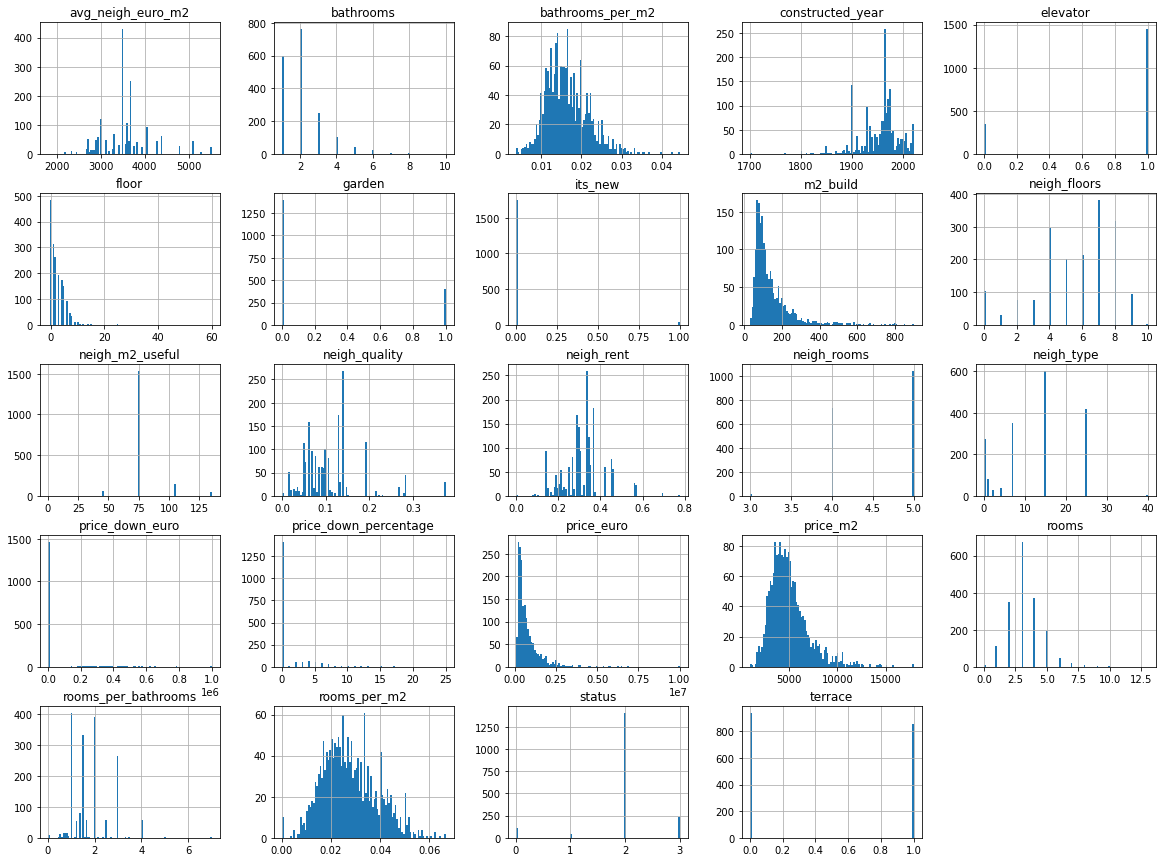

In [9]:
%matplotlib inline
housing.hist(bins = 100, figsize = (20,15))
plt.show()

In [10]:
features = ["bathrooms", "constructed_year", "floor", "m2_build", "neigh_m2_useful", "price_down_euro", "price_down_percentage", "price_euro", "price_m2", "rooms", "status", "avg_neigh_euro_m2", "neigh_type", "neigh_floors", "neigh_rooms"]

not_normalized_housing = housing.copy()
price_euro_info = []

count = 0
for feat in features:
    
    new_feat = []
    actualFeat = housing[feat]
    maxFeat = np.max(actualFeat)
    minFeat = np.min(actualFeat)
    for i in actualFeat:
        i = (i-minFeat)/(maxFeat-minFeat)
        new_feat.append(i)    
    housing[feat] = new_feat
    
    if (feat == "price_euro"):
        actualFeatNN = not_normalized_housing[feat]
        maxFeat = np.max(actualFeatNN)
        minFeat = np.min(actualFeatNN)
        meanFeat = np.mean(actualFeatNN)
        medianFeat = np.median(actualFeatNN)
        varFeat = np.var(actualFeatNN)
        price_euro_info.append([maxFeat,minFeat,meanFeat,medianFeat,varFeat])
    count += 1

In [11]:
max_price = price_euro_info[0][0]
min_price = price_euro_info[0][1]
max_min_price = max_price + min_price

In [34]:
def test_pred_lab(predicted,labels):
    print('<>' * 50)
    p = (predicted*max_min_price)+min_price
    l = (labels*max_min_price)+min_price
    results = np.stack((p, l), axis=1)
    print("[TEST]")
    print("Predictions & Labels \n ", results, '\n')
    plt.plot(p, l, '.', color='black')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F6698F430>,
      dtype=object)

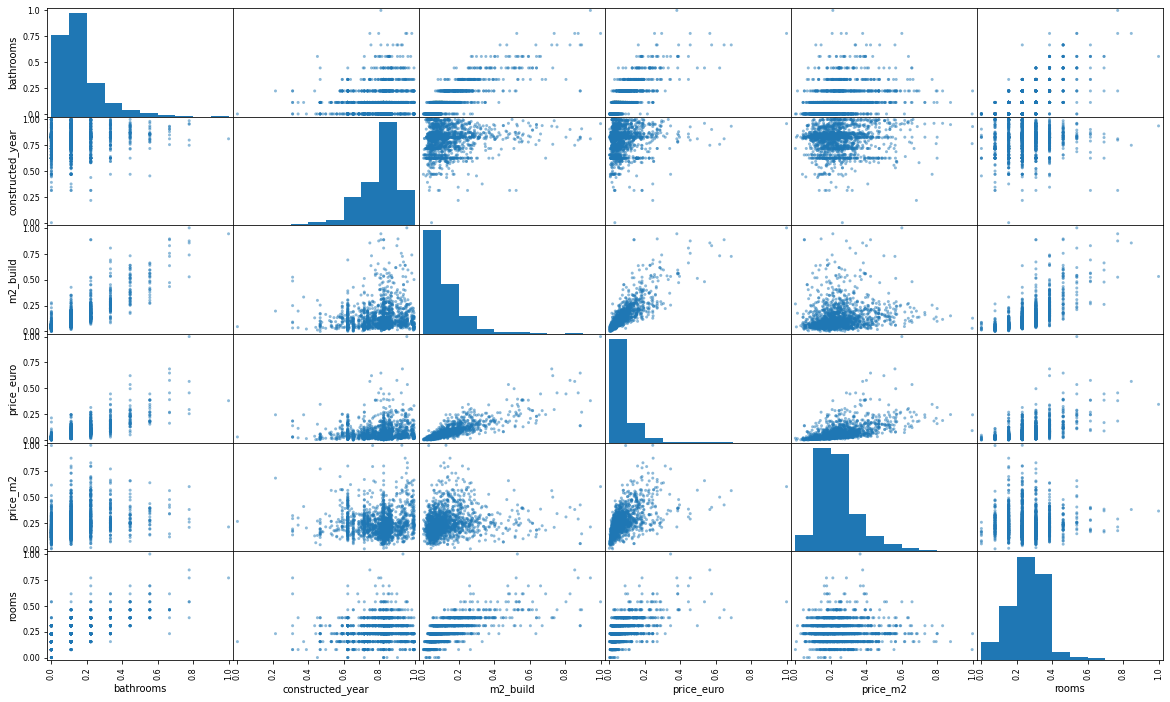

In [13]:
from pandas.plotting import scatter_matrix

attributes = [
              "bathrooms", "constructed_year", "m2_build", "price_euro","price_m2", "rooms"
             ]

scatter_matrix(housing[attributes],figsize = (20,12))

In [14]:
corr = housing.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
# 'RdBu_r' & 'BrBG' are other good diverging colormaps


,bathrooms,constructed_year,elevator,floor,its_new,m2_build,neigh_m2_useful,garden,price_down_euro,price_down_percentage,price_euro,price_m2,rooms,status,terrace,avg_neigh_euro_m2,neigh_quality,neigh_type,neigh_floors,neigh_rent,neigh_rooms,rooms_per_bathrooms,rooms_per_m2,bathrooms_per_m2
bathrooms,1.00,0.14,-0.09,-0.08,-0.03,0.83,0.18,0.46,-0.11,-0.04,0.79,0.34,0.64,0.11,0.36,0.29,-0.02,-0.07,-0.04,0.08,0.21,-0.50,-0.50,0.02
constructed_year,0.14,1.00,0.15,0.09,0.00,0.09,0.12,0.31,-0.02,-0.03,0.08,0.04,0.09,-0.01,0.18,0.11,-0.12,0.08,0.12,-0.17,0.06,-0.03,-0.01,-0.02
elevator,-0.09,0.15,1.00,0.25,0.07,-0.16,0.07,-0.02,0.04,-0.04,-0.06,0.19,-0.01,0.05,-0.04,0.10,-0.05,0.14,0.22,0.05,0.18,0.03,0.05,0.06
floor,-0.08,0.09,0.25,1.00,0.00,-0.10,0.02,0.02,0.01,0.00,-0.05,0.09,0.01,0.05,0.01,0.03,-0.05,0.06,0.10,-0.03,0.01,0.10,0.12,0.02
its_new,-0.03,0.00,0.07,0.00,1.00,-0.06,-0.00,-0.07,-0.02,-0.02,-0.02,0.13,-0.13,-0.24,0.08,0.00,0.00,-0.02,0.01,0.05,0.00,-0.12,-0.08,0.08
m2_build,0.83,0.09,-0.16,-0.10,-0.06,1.00,0.15,0.44,-0.12,-0.03,0.85,0.20,0.69,0.12,0.35,0.25,-0.03,-0.05,-0.04,0.04,0.17,-0.25,-0.54,-0.42
neigh_m2_useful,0.18,0.12,0.07,0.02,-0.00,0.15,1.00,0.18,0.02,-0.02,0.13,0.09,0.16,0.02,0.11,0.39,-0.38,-0.07,-0.03,-0.07,0.23,-0.07,-0.10,-0.04
garden,0.46,0.31,-0.02,0.02,-0.07,0.44,0.18,1.00,-0.05,0.00,0.43,0.21,0.35,0.12,0.32,0.27,-0.09,-0.05,-0.04,-0.11,0.07,-0.18,-0.28,-0.16
price_down_euro,-0.11,-0.02,0.04,0.01,-0.02,-0.12,0.02,-0.05,1.00,0.59,-0.15,-0.12,-0.06,-0.02,-0.06,0.00,0.00,0.03,0.04,0.07,0.00,0.05,0.08,0.04
price_down_percentage,-0.04,-0.03,-0.04,0.00,-0.02,-0.03,-0.02,0.00,0.59,1.00,-0.08,-0.13,-0.02,-0.01,-0.08,-0.02,0.03,-0.01,-0.03,0.01,-0.05,0.04,0.05,0.02


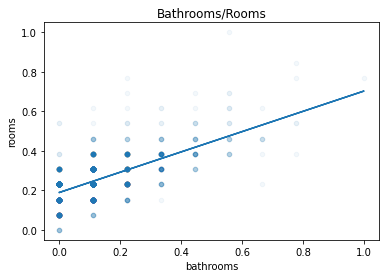

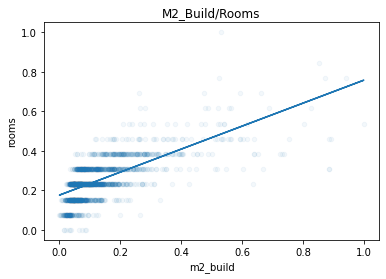

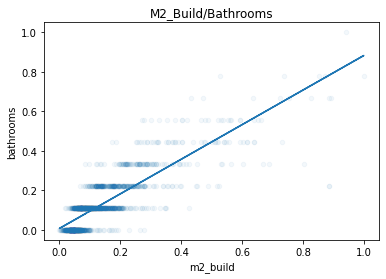

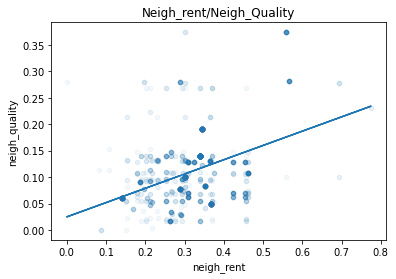

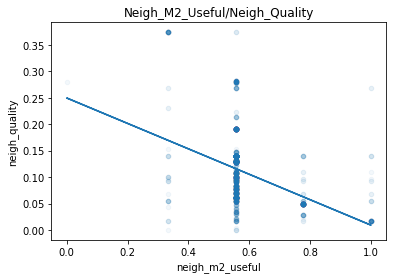

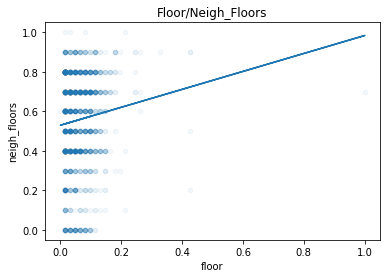

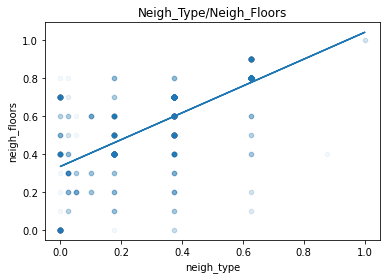

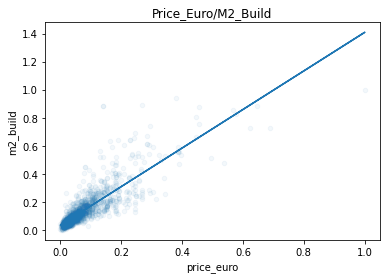

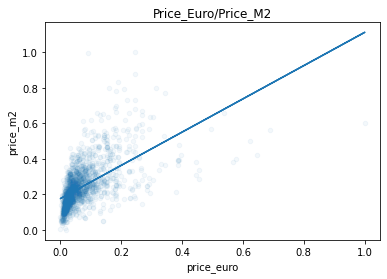

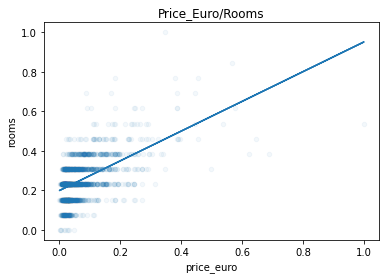

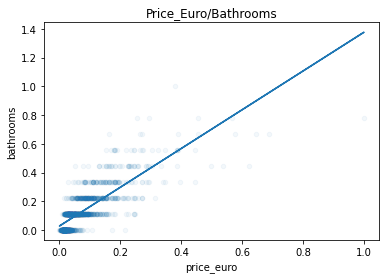

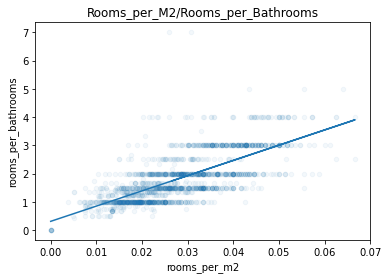

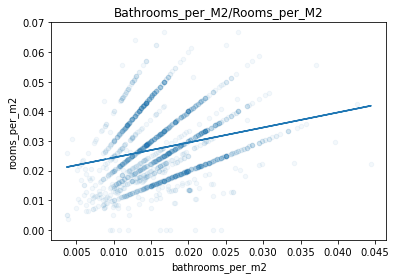

In [15]:
#################################
# Visualizing data #
#################################

from numpy.polynomial.polynomial import polyfit

housing.plot(kind = "scatter", x = "bathrooms", y = "rooms", alpha = 0.05, title = "Bathrooms/Rooms")
b, m = polyfit(housing.bathrooms,housing.rooms, 1)
plt.plot(housing.bathrooms, b + m * housing.bathrooms, '-')
plt.show()

housing.plot(kind = "scatter", x = "m2_build", y = "rooms", alpha = 0.05, title = "M2_Build/Rooms")
b, m = polyfit(housing.m2_build,housing.rooms, 1)
plt.plot(housing.m2_build, b + m * housing.m2_build, '-')
plt.show()

housing.plot(kind = "scatter", x = "m2_build", y = "bathrooms", alpha = 0.05, title = "M2_Build/Bathrooms")
b, m = polyfit(housing.m2_build,housing.bathrooms, 1)
plt.plot(housing.m2_build, b + m * housing.m2_build, '-')
plt.show()

housing.plot(kind = "scatter", x = "neigh_rent", y = "neigh_quality", alpha = 0.05, title = "Neigh_rent/Neigh_Quality")
b, m = polyfit(housing.neigh_rent,housing.neigh_quality, 1)
plt.plot(housing.neigh_rent, b + m * housing.neigh_rent, '-')
plt.show()

housing.plot(kind = "scatter", x = "neigh_m2_useful", y = "neigh_quality", alpha = 0.05, title = "Neigh_M2_Useful/Neigh_Quality")
b, m = polyfit(housing.neigh_m2_useful,housing.neigh_quality, 1)
plt.plot(housing.neigh_m2_useful, b + m * housing.neigh_m2_useful, '-')
plt.show()

housing.plot(kind = "scatter", x = "floor", y = "neigh_floors", alpha = 0.05, title = "Floor/Neigh_Floors")
b, m = polyfit(housing.floor,housing.neigh_floors, 1)
plt.plot(housing.floor, b + m * housing.floor, '-')
plt.show()

housing.plot(kind = "scatter", x = "neigh_type", y = "neigh_floors", alpha = 0.05, title = "Neigh_Type/Neigh_Floors")
b, m = polyfit(housing.neigh_type,housing.neigh_floors, 1)
plt.plot(housing.neigh_type, b + m * housing.neigh_type, '-')
plt.show()

housing.plot(kind = "scatter", x = "price_euro", y = "m2_build", alpha = 0.05, title = "Price_Euro/M2_Build")
b, m = polyfit(housing.price_euro,housing.m2_build, 1)
plt.plot(housing.price_euro, b + m * housing.price_euro, '-')
plt.show()

housing.plot(kind = "scatter", x = "price_euro", y = "price_m2", alpha = 0.05, title = "Price_Euro/Price_M2")
b, m = polyfit(housing.price_euro,housing.price_m2, 1)
plt.plot(housing.price_euro, b + m * housing.price_euro, '-')
plt.show()

housing.plot(kind = "scatter", x = "price_euro", y = "rooms", alpha = 0.05, title = "Price_Euro/Rooms")
b, m = polyfit(housing.price_euro,housing.rooms, 1)
plt.plot(housing.price_euro, b + m * housing.price_euro, '-')
plt.show()

housing.plot(kind = "scatter", x = "price_euro", y = "bathrooms", alpha = 0.05, title = "Price_Euro/Bathrooms")
b, m = polyfit(housing.price_euro,housing.bathrooms, 1)
plt.plot(housing.price_euro, b + m * housing.price_euro, '-')
plt.show()

housing.plot(kind = "scatter", x = "rooms_per_m2", y = "rooms_per_bathrooms", alpha = 0.05, title = "Rooms_per_M2/Rooms_per_Bathrooms")
b, m = polyfit(housing.rooms_per_m2,housing.rooms_per_bathrooms, 1)
plt.plot(housing.rooms_per_m2, b + m * housing.rooms_per_m2, '-')
plt.show()

housing.plot(kind = "scatter", x = "bathrooms_per_m2", y = "rooms_per_m2", alpha = 0.05, title = "Bathrooms_per_M2/Rooms_per_M2")
b, m = polyfit(housing.bathrooms_per_m2,housing.rooms_per_m2, 1)
plt.plot(housing.bathrooms_per_m2, b + m * housing.bathrooms_per_m2, '-')
plt.show()


In [16]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[-in_test_set], data.loc[in_test_set]

In [17]:
from sklearn.model_selection import train_test_split

housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

not_normalized_housing_with_id = not_normalized_housing.reset_index()
nn_train_set, nn_test_set =  split_train_test_by_id(not_normalized_housing_with_id, 0.2, "index")

In [18]:
housing = test_set.copy()

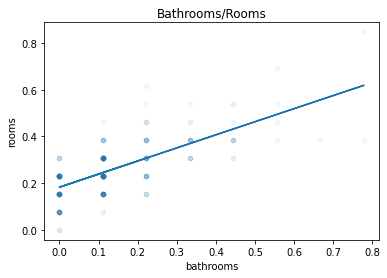

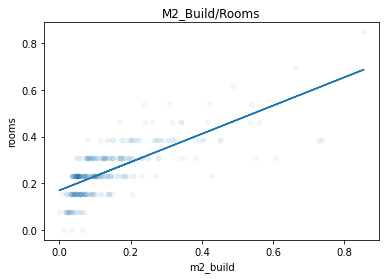

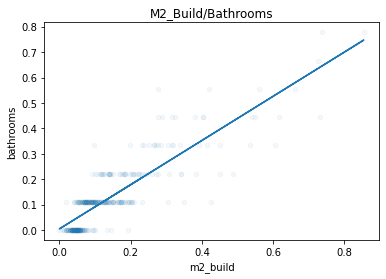

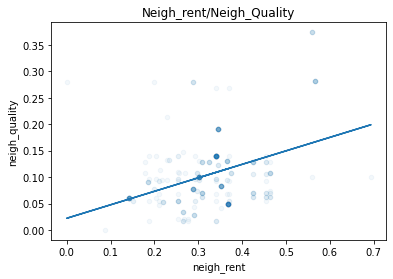

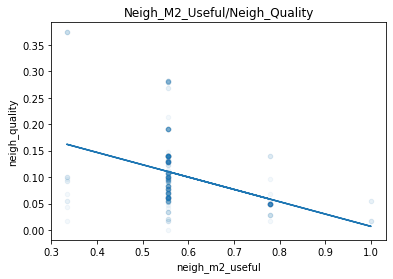

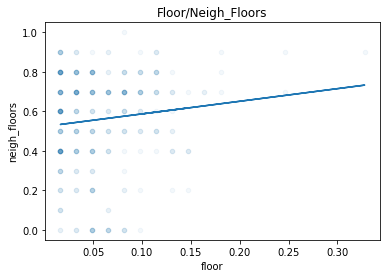

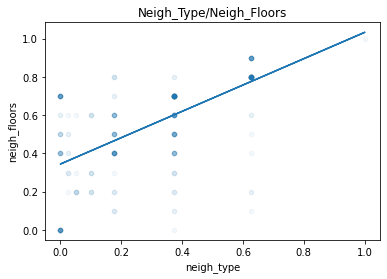

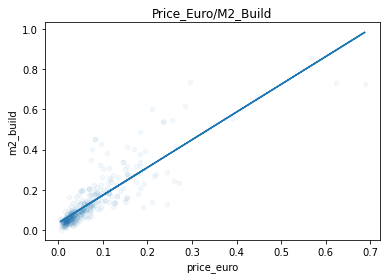

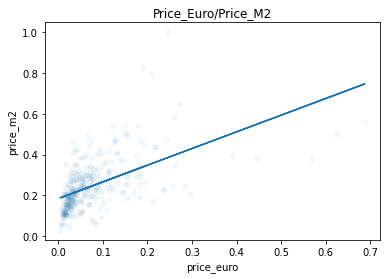

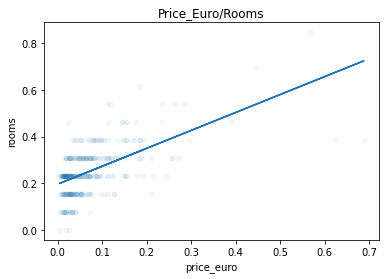

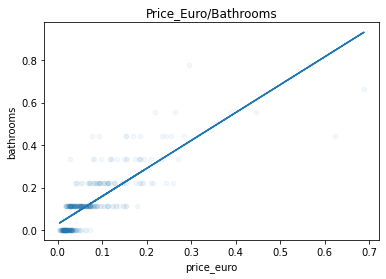

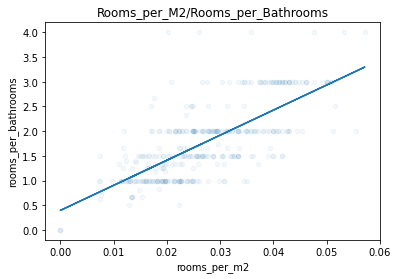

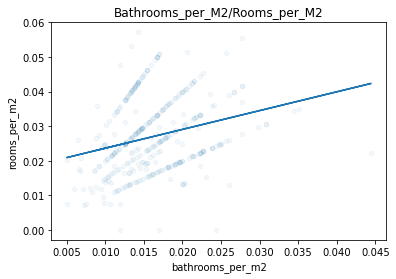

In [19]:
#################################
# Visualizing data #
#################################

housing.plot(kind = "scatter", x = "bathrooms", y = "rooms", alpha = 0.05, title = "Bathrooms/Rooms")
b, m = polyfit(housing.bathrooms,housing.rooms, 1)
plt.plot(housing.bathrooms, b + m * housing.bathrooms, '-')
plt.show()

housing.plot(kind = "scatter", x = "m2_build", y = "rooms", alpha = 0.05, title = "M2_Build/Rooms")
b, m = polyfit(housing.m2_build,housing.rooms, 1)
plt.plot(housing.m2_build, b + m * housing.m2_build, '-')
plt.show()

housing.plot(kind = "scatter", x = "m2_build", y = "bathrooms", alpha = 0.05, title = "M2_Build/Bathrooms")
b, m = polyfit(housing.m2_build,housing.bathrooms, 1)
plt.plot(housing.m2_build, b + m * housing.m2_build, '-')
plt.show()

housing.plot(kind = "scatter", x = "neigh_rent", y = "neigh_quality", alpha = 0.05, title = "Neigh_rent/Neigh_Quality")
b, m = polyfit(housing.neigh_rent,housing.neigh_quality, 1)
plt.plot(housing.neigh_rent, b + m * housing.neigh_rent, '-')
plt.show()

housing.plot(kind = "scatter", x = "neigh_m2_useful", y = "neigh_quality", alpha = 0.05, title = "Neigh_M2_Useful/Neigh_Quality")
b, m = polyfit(housing.neigh_m2_useful,housing.neigh_quality, 1)
plt.plot(housing.neigh_m2_useful, b + m * housing.neigh_m2_useful, '-')
plt.show()

housing.plot(kind = "scatter", x = "floor", y = "neigh_floors", alpha = 0.05, title = "Floor/Neigh_Floors")
b, m = polyfit(housing.floor,housing.neigh_floors, 1)
plt.plot(housing.floor, b + m * housing.floor, '-')
plt.show()

housing.plot(kind = "scatter", x = "neigh_type", y = "neigh_floors", alpha = 0.05, title = "Neigh_Type/Neigh_Floors")
b, m = polyfit(housing.neigh_type,housing.neigh_floors, 1)
plt.plot(housing.neigh_type, b + m * housing.neigh_type, '-')
plt.show()

housing.plot(kind = "scatter", x = "price_euro", y = "m2_build", alpha = 0.05, title = "Price_Euro/M2_Build")
b, m = polyfit(housing.price_euro,housing.m2_build, 1)
plt.plot(housing.price_euro, b + m * housing.price_euro, '-')
plt.show()

housing.plot(kind = "scatter", x = "price_euro", y = "price_m2", alpha = 0.05, title = "Price_Euro/Price_M2")
b, m = polyfit(housing.price_euro,housing.price_m2, 1)
plt.plot(housing.price_euro, b + m * housing.price_euro, '-')
plt.show()

housing.plot(kind = "scatter", x = "price_euro", y = "rooms", alpha = 0.05, title = "Price_Euro/Rooms")
b, m = polyfit(housing.price_euro,housing.rooms, 1)
plt.plot(housing.price_euro, b + m * housing.price_euro, '-')
plt.show()

housing.plot(kind = "scatter", x = "price_euro", y = "bathrooms", alpha = 0.05, title = "Price_Euro/Bathrooms")
b, m = polyfit(housing.price_euro,housing.bathrooms, 1)
plt.plot(housing.price_euro, b + m * housing.price_euro, '-')
plt.show()

housing.plot(kind = "scatter", x = "rooms_per_m2", y = "rooms_per_bathrooms", alpha = 0.05, title = "Rooms_per_M2/Rooms_per_Bathrooms")
b, m = polyfit(housing.rooms_per_m2,housing.rooms_per_bathrooms, 1)
plt.plot(housing.rooms_per_m2, b + m * housing.rooms_per_m2, '-')
plt.show()

housing.plot(kind = "scatter", x = "bathrooms_per_m2", y = "rooms_per_m2", alpha = 0.05, title = "Bathrooms_per_M2/Rooms_per_M2")
b, m = polyfit(housing.bathrooms_per_m2,housing.rooms_per_m2, 1)
plt.plot(housing.bathrooms_per_m2, b + m * housing.bathrooms_per_m2, '-')
plt.show()


In [20]:
housing_prepared = train_set.drop("price_euro", axis = 1)
housing_labels = train_set["price_euro"].copy()
housing_prepared_test = test_set.drop("price_euro", axis = 1)
housing_labels_test = test_set["price_euro"].copy()

# nn_housing_prepared = nn_train_set.drop("price_euro", axis = 1)
# nn_housing_labels = nn_train_set["price_euro"].copy()
# nn_housing_prepared_test = nn_test_set.drop("price_euro", axis = 1)
# nn_housing_labels_test = nn_test_set["price_euro"].copy()

Prepared and Labels size:  (1436, 24)  and  (1436,)
Training for LinearRegression started at:  2020-12-22 00:04:15.129046
Training for LinearRegression finished at:  2020-12-22 00:04:15.133926
Training lasted for:  0:00:00.004880
<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
[TEST]
Predictions & Labels 
  [[ 1.76336331e+06  2.00711511e+06]
 [ 4.33217797e+05  3.02244725e+05]
 [ 3.87156283e+05  4.80743945e+05]
 [ 1.30570560e+06  1.26674903e+06]
 [ 9.20940463e+05  8.61068986e+05]
 [ 4.31213863e+05  4.35104940e+05]
 [ 5.98103431e+05  6.02447958e+05]
 [ 4.11142107e+05  3.99607936e+05]
 [ 8.33633080e+05  8.05287980e+05]
 [ 7.33860498e+05  6.88654968e+05]
 [ 1.52790301e+06  1.03348301e+06]
 [ 4.00470894e+05  3.99607936e+05]
 [ 1.98894362e+06  1.77384909e+06]
 [ 2.19962283e+05  3.13400927e+05]
 [ 4.64112354e+05  4.80743945e+05]
 [ 2.47475235e+05  3.43826930e+05]
 [ 8.20647104e+05  7.58634775e+05]
 [-3.15585245e+05  1.29830706e+05]
 [ 3.158

Scores: [0.76523648 0.92990899 0.84240937 0.91986718 0.95315921 0.89137791
 0.86932721 0.92408936 0.93599592 0.92945423]
Mean: 0.8960825849371588
Standard deviation: 0.05403544668166135
*************************
Sample:  Test
Scores: [0.7883769  0.76625971 0.94129361 0.88055597 0.89483417 0.95366086
 0.95767098 0.92118415 0.78640223 0.94702992]
Mean: 0.8837268491347696
Standard deviation: 0.07181811198904035


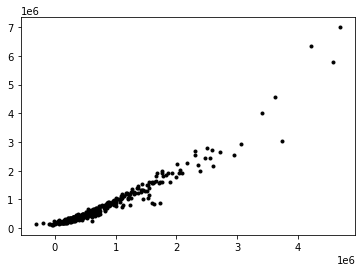

In [35]:
###########################
# Selecting a Train Model #
###########################

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats

# print("Housing Labels: ", housing_labels)

# R2 - https://en.wikipedia.org/wiki/Coefficient_of_determination #
# Neg_Mean_Squared_Error - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error #

print("Prepared and Labels size: ", housing_prepared.shape, " and ", housing_labels.shape)

print('=' * 100)
time_start = datetime.datetime.now()
print('Training for LinearRegression started at: ', time_start)

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

time_finish = datetime.datetime.now()
print('Training for LinearRegression finished at: ', time_finish)
print('Training lasted for: ', time_finish-time_start)

test_pred_lab(lin_reg.predict(housing_prepared_test),housing_labels_test)

metrics_cross_val_score(lin_reg, housing_prepared, housing_prepared_test, housing_labels, housing_labels_test)

Training for DecisionTreeRegressor started at:  2020-12-22 00:04:41.263263
Training for DecisionTreeRegressor finished at:  2020-12-22 00:04:41.279856
Training lasted for:  0:00:00.016593
<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
[TEST]
Predictions & Labels 
  [[2022328.11319805 2007115.11153633]
 [ 485814.94536482  302244.72531346]
 [ 475672.94425701  480743.94481092]
 [1281962.03232791 1266749.0306662 ]
 [ 906707.99133894  861068.98635379]
 [ 435104.93982577  435104.93982577]
 [ 597376.95755073  602447.95810464]
 [ 424962.93871796  399607.93594844]
 [ 769790.9763835   805287.98026084]
 [ 729222.97195226  688654.96752102]
 [1413808.04672944 1033483.00518657]
 [ 430033.93927187  399607.93594844]
 [1814417.09048794 1773849.0860567 ]
 [ 394536.93539453  313400.92653205]
 [ 455388.94204139  480743.94481092]
 [ 353968.93096329  343826.92985548]
 [ 729222.97195226  758634.77516491]
 [ 130844.90659147  129830.70648069]
 [ 262690.9209

Scores: [0.01176756 0.080526   0.04828755 0.01619833 0.01375487 0.0134154
 0.01400223 0.02351899 0.01789949 0.02345255]
Mean: 0.026282297182656428
Standard deviation: 0.020732060342721337
*************************
Sample:  Test
Scores: [0.01215801 0.06109629 0.04262646 0.03484398 0.03135021 0.03007165
 0.01876944 0.01376192 0.03221587 0.01239709]
Mean: 0.028929093006031296
Standard deviation: 0.014707618581411286
####################################################################################################
Metric:  r2
*************************
Sample:  Train
Scores: [0.94410242 0.8954602  0.82737264 0.94239526 0.95316056 0.96916194
 0.9177969  0.93257951 0.94471655 0.95204786]
Mean: 0.9278793864024296
Standard deviation: 0.03867977195983142
*************************
Sample:  Test
Scores: [ 0.8476103  -0.15248018  0.89945265  0.84365401  0.98065315  0.80518194
  0.90214917  0.89535489  0.83634426  0.96347249]
Mean: 0.7821392700923813
Standard deviation: 0.31596285651124684


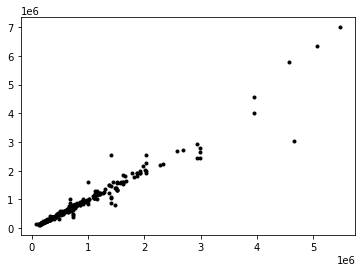

In [36]:
from sklearn.tree import DecisionTreeRegressor

print('=' * 100)
time_start = datetime.datetime.now()
print('Training for DecisionTreeRegressor started at: ', time_start)

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

time_finish = datetime.datetime.now()
print('Training for DecisionTreeRegressor finished at: ', time_finish)
print('Training lasted for: ', time_finish-time_start)

test_pred_lab(tree_reg.predict(housing_prepared_test),housing_labels_test)

metrics_cross_val_score(tree_reg, housing_prepared, housing_prepared_test, housing_labels, housing_labels_test)

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# R2 - https://internal.ncl.ac.uk/ask/numeracy-maths-statistics/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html #
# GridSearchCV - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV.get_params #

scoring = {'RMSE': 'neg_mean_squared_error', 'R2': 'r2'}

param_grid = [
    {'n_estimators':[1,10,30,60,90,120,210,250,300,350,400,450,600],'max_features':range(2,24)},
    {'bootstrap': [False], 'n_estimators':[1,10,30,60,90,120,210,250,300,350,400,450,600],'max_features':range(2,24)}
]

print('=' * 100)
time_start = datetime.datetime.now()
print('Training for RandomForestRegressor started at: ', time_start)

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=10, scoring = scoring, refit='R2', return_train_score = True, verbose=10)
grid_search.fit(housing_prepared, housing_labels)
history = grid_search.fit(housing_prepared, housing_labels)

estimators = grid_search.cv_results_['params'][grid_search.best_index_]['n_estimators']
features = grid_search.cv_results_['params'][grid_search.best_index_]['max_features']

forest_reg = RandomForestRegressor(n_estimators = estimators, max_features = features)
forest_reg.fit(housing_prepared, housing_labels)

time_finish = datetime.datetime.now()
print('Training for RandomForestRegressor finished at: ', time_finish)
print('Training lasted for: ', time_finish-time_start)

print('@' * 100)
print("[TRAIN]")
print("Grid Search best result(R2) and estimator(max_feat and n_estimators): ", grid_search.best_score_,grid_search.cv_results_['params'][grid_search.best_index_])

test_pred_lab(forest_reg.predict(housing_prepared_test),housing_labels_test)

metrics_cross_val_score(forest_reg, housing_prepared, housing_prepared_test, housing_labels, housing_labels_test)

Training for RandomForestRegressor started at:  2020-12-20 21:41:36.691483
Fitting 10 folds for each of 572 candidates, totalling 5720 fits
[CV] max_features=2, n_estimators=1 ..................................
[CV]  max_features=2, n_estimators=1, R2=(train=0.760, test=-2.947), RMSE=(train=-0.001, test=-0.008), total=   0.0s
[CV] max_features=2, n_estimators=1 ..................................
[CV]  max_features=2, n_estimators=1, R2=(train=0.791, test=0.452), RMSE=(train=-0.001, test=-0.002), total=   0.0s
[CV] max_features=2, n_estimators=1 ..................................
[CV]  max_features=2, n_estimators=1, R2=(train=0.829, test=0.696), RMSE=(train=-0.001, test=-0.004), total=   0.0s
[CV] max_features=2, n_estimators=1 ..................................
[CV]  max_features=2, n_estimators=1, R2=(train=0.749, test=0.514), RMSE=(train=-0.001, test=-0.002), total=   0.0s
[CV] max_features=2, n_estimators=1 ..................................
[CV]  max_features=2, n_estimators=1, R2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s



[CV] max_features=2, n_estimators=10 .................................
[CV]  max_features=2, n_estimators=10, R2=(train=0.972, test=0.814), RMSE=(train=-0.000, test=-0.001), total=   0.0s
[CV] max_features=2, n_estimators=10 .................................
[CV]  max_features=2, n_estimators=10, R2=(train=0.963, test=0.811), RMSE=(train=-0.000, test=-0.001), total=   0.0s
[CV] max_features=2, n_estimators=10 .................................
[CV]  max_features=2, n_estimators=10, R2=(train=0.962, test=0.749), RMSE=(train=-0.000, test=-0.001), total=   0.0s
[CV] max_features=2, n_estimators=10 .................................
[CV]  max_features=2, n_estimators=10, R2=(train=0.970, test=0.834), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] max_features=2, n_estimators=10 .................................
[CV]  max_features=2, n_estimators=10, R2=(train=0.966, test=0.840), RMSE=(train=-0.000, test=-0.001), total=   0.0s
[CV] max_features=2, n_estimators=10 ......................

[CV]  max_features=2, n_estimators=120, R2=(train=0.977, test=0.866), RMSE=(train=-0.000, test=-0.001), total=   0.2s
[CV] max_features=2, n_estimators=120 ................................
[CV]  max_features=2, n_estimators=120, R2=(train=0.979, test=0.928), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=2, n_estimators=120 ................................
[CV]  max_features=2, n_estimators=120, R2=(train=0.977, test=0.839), RMSE=(train=-0.000, test=-0.001), total=   0.2s
[CV] max_features=2, n_estimators=210 ................................
[CV]  max_features=2, n_estimators=210, R2=(train=0.981, test=0.880), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] max_features=2, n_estimators=210 ................................
[CV]  max_features=2, n_estimators=210, R2=(train=0.978, test=0.877), RMSE=(train=-0.000, test=-0.001), total=   0.4s
[CV] max_features=2, n_estimators=210 ................................
[CV]  max_features=2, n_estimators=210, R2=(train=0.979

[CV]  max_features=2, n_estimators=400, R2=(train=0.980, test=0.893), RMSE=(train=-0.000, test=-0.000), total=   0.7s
[CV] max_features=2, n_estimators=400 ................................
[CV]  max_features=2, n_estimators=400, R2=(train=0.982, test=0.731), RMSE=(train=-0.000, test=-0.004), total=   0.7s
[CV] max_features=2, n_estimators=400 ................................
[CV]  max_features=2, n_estimators=400, R2=(train=0.982, test=0.861), RMSE=(train=-0.000, test=-0.001), total=   0.7s
[CV] max_features=2, n_estimators=400 ................................
[CV]  max_features=2, n_estimators=400, R2=(train=0.979, test=0.898), RMSE=(train=-0.000, test=-0.000), total=   0.7s
[CV] max_features=2, n_estimators=400 ................................
[CV]  max_features=2, n_estimators=400, R2=(train=0.981, test=0.803), RMSE=(train=-0.000, test=-0.001), total=   0.7s
[CV] max_features=2, n_estimators=400 ................................
[CV]  max_features=2, n_estimators=400, R2=(train=0.981

[CV]  max_features=3, n_estimators=30, R2=(train=0.979, test=0.853), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] max_features=3, n_estimators=30 .................................
[CV]  max_features=3, n_estimators=30, R2=(train=0.982, test=0.887), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] max_features=3, n_estimators=30 .................................
[CV]  max_features=3, n_estimators=30, R2=(train=0.981, test=0.742), RMSE=(train=-0.000, test=-0.003), total=   0.1s
[CV] max_features=3, n_estimators=30 .................................
[CV]  max_features=3, n_estimators=30, R2=(train=0.981, test=0.916), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] max_features=3, n_estimators=30 .................................
[CV]  max_features=3, n_estimators=30, R2=(train=0.982, test=0.919), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] max_features=3, n_estimators=30 .................................
[CV]  max_features=3, n_estimators=30, R2=(train=0.979, test

[CV]  max_features=3, n_estimators=210, R2=(train=0.983, test=0.918), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] max_features=3, n_estimators=210 ................................
[CV]  max_features=3, n_estimators=210, R2=(train=0.983, test=0.828), RMSE=(train=-0.000, test=-0.001), total=   0.5s
[CV] max_features=3, n_estimators=210 ................................
[CV]  max_features=3, n_estimators=210, R2=(train=0.983, test=0.900), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] max_features=3, n_estimators=210 ................................
[CV]  max_features=3, n_estimators=210, R2=(train=0.981, test=0.904), RMSE=(train=-0.000, test=-0.001), total=   0.4s
[CV] max_features=3, n_estimators=210 ................................
[CV]  max_features=3, n_estimators=210, R2=(train=0.982, test=0.938), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] max_features=3, n_estimators=210 ................................
[CV]  max_features=3, n_estimators=210, R2=(train=0.982

[CV]  max_features=3, n_estimators=400, R2=(train=0.982, test=0.935), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] max_features=3, n_estimators=400 ................................
[CV]  max_features=3, n_estimators=400, R2=(train=0.983, test=0.880), RMSE=(train=-0.000, test=-0.001), total=   0.8s
[CV] max_features=3, n_estimators=450 ................................
[CV]  max_features=3, n_estimators=450, R2=(train=0.985, test=0.899), RMSE=(train=-0.000, test=-0.000), total=   0.9s
[CV] max_features=3, n_estimators=450 ................................
[CV]  max_features=3, n_estimators=450, R2=(train=0.985, test=0.927), RMSE=(train=-0.000, test=-0.000), total=   0.9s
[CV] max_features=3, n_estimators=450 ................................
[CV]  max_features=3, n_estimators=450, R2=(train=0.985, test=0.751), RMSE=(train=-0.000, test=-0.003), total=   0.9s
[CV] max_features=3, n_estimators=450 ................................
[CV]  max_features=3, n_estimators=450, R2=(train=0.983

[CV]  max_features=4, n_estimators=210, R2=(train=0.986, test=0.845), RMSE=(train=-0.000, test=-0.001), total=   0.5s
[CV] max_features=4, n_estimators=210 ................................
[CV]  max_features=4, n_estimators=210, R2=(train=0.985, test=0.901), RMSE=(train=-0.000, test=-0.000), total=   0.5s
[CV] max_features=4, n_estimators=210 ................................
[CV]  max_features=4, n_estimators=210, R2=(train=0.983, test=0.923), RMSE=(train=-0.000, test=-0.000), total=   0.5s
[CV] max_features=4, n_estimators=210 ................................
[CV]  max_features=4, n_estimators=210, R2=(train=0.985, test=0.952), RMSE=(train=-0.000, test=-0.000), total=   0.5s
[CV] max_features=4, n_estimators=210 ................................
[CV]  max_features=4, n_estimators=210, R2=(train=0.985, test=0.904), RMSE=(train=-0.000, test=-0.001), total=   0.5s
[CV] max_features=4, n_estimators=250 ................................
[CV]  max_features=4, n_estimators=250, R2=(train=0.986

[CV]  max_features=4, n_estimators=400, R2=(train=0.984, test=0.898), RMSE=(train=-0.000, test=-0.001), total=   0.9s
[CV] max_features=4, n_estimators=450 ................................
[CV]  max_features=4, n_estimators=450, R2=(train=0.986, test=0.914), RMSE=(train=-0.000, test=-0.000), total=   1.0s
[CV] max_features=4, n_estimators=450 ................................
[CV]  max_features=4, n_estimators=450, R2=(train=0.985, test=0.940), RMSE=(train=-0.000, test=-0.000), total=   1.0s
[CV] max_features=4, n_estimators=450 ................................
[CV]  max_features=4, n_estimators=450, R2=(train=0.988, test=0.760), RMSE=(train=-0.000, test=-0.003), total=   1.0s
[CV] max_features=4, n_estimators=450 ................................
[CV]  max_features=4, n_estimators=450, R2=(train=0.985, test=0.904), RMSE=(train=-0.000, test=-0.000), total=   1.0s
[CV] max_features=4, n_estimators=450 ................................
[CV]  max_features=4, n_estimators=450, R2=(train=0.985

[CV]  max_features=5, n_estimators=30, R2=(train=0.984, test=0.934), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] max_features=5, n_estimators=30 .................................
[CV]  max_features=5, n_estimators=30, R2=(train=0.991, test=0.874), RMSE=(train=-0.000, test=-0.001), total=   0.1s
[CV] max_features=5, n_estimators=30 .................................
[CV]  max_features=5, n_estimators=30, R2=(train=0.984, test=0.930), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] max_features=5, n_estimators=30 .................................
[CV]  max_features=5, n_estimators=30, R2=(train=0.979, test=0.912), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] max_features=5, n_estimators=30 .................................
[CV]  max_features=5, n_estimators=30, R2=(train=0.984, test=0.933), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] max_features=5, n_estimators=30 .................................
[CV]  max_features=5, n_estimators=30, R2=(train=0.985, test

[CV]  max_features=5, n_estimators=210, R2=(train=0.988, test=0.967), RMSE=(train=-0.000, test=-0.000), total=   0.5s
[CV] max_features=5, n_estimators=210 ................................
[CV]  max_features=5, n_estimators=210, R2=(train=0.985, test=0.910), RMSE=(train=-0.000, test=-0.001), total=   0.5s
[CV] max_features=5, n_estimators=250 ................................
[CV]  max_features=5, n_estimators=250, R2=(train=0.988, test=0.925), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] max_features=5, n_estimators=250 ................................
[CV]  max_features=5, n_estimators=250, R2=(train=0.987, test=0.954), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] max_features=5, n_estimators=250 ................................
[CV]  max_features=5, n_estimators=250, R2=(train=0.989, test=0.782), RMSE=(train=-0.000, test=-0.003), total=   0.6s
[CV] max_features=5, n_estimators=250 ................................
[CV]  max_features=5, n_estimators=250, R2=(train=0.987

[CV]  max_features=5, n_estimators=450, R2=(train=0.990, test=0.780), RMSE=(train=-0.000, test=-0.003), total=   1.1s
[CV] max_features=5, n_estimators=450 ................................
[CV]  max_features=5, n_estimators=450, R2=(train=0.987, test=0.920), RMSE=(train=-0.000, test=-0.000), total=   1.2s
[CV] max_features=5, n_estimators=450 ................................
[CV]  max_features=5, n_estimators=450, R2=(train=0.987, test=0.951), RMSE=(train=-0.000, test=-0.000), total=   2.5s
[CV] max_features=5, n_estimators=450 ................................
[CV]  max_features=5, n_estimators=450, R2=(train=0.988, test=0.854), RMSE=(train=-0.000, test=-0.001), total=   2.0s
[CV] max_features=5, n_estimators=450 ................................
[CV]  max_features=5, n_estimators=450, R2=(train=0.988, test=0.901), RMSE=(train=-0.000, test=-0.000), total=   1.4s
[CV] max_features=5, n_estimators=450 ................................
[CV]  max_features=5, n_estimators=450, R2=(train=0.985

[CV]  max_features=6, n_estimators=30, R2=(train=0.987, test=0.864), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] max_features=6, n_estimators=30 .................................
[CV]  max_features=6, n_estimators=30, R2=(train=0.989, test=0.921), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] max_features=6, n_estimators=30 .................................
[CV]  max_features=6, n_estimators=30, R2=(train=0.978, test=0.960), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] max_features=6, n_estimators=30 .................................
[CV]  max_features=6, n_estimators=30, R2=(train=0.982, test=0.930), RMSE=(train=-0.000, test=-0.001), total=   0.1s
[CV] max_features=6, n_estimators=60 .................................
[CV]  max_features=6, n_estimators=60, R2=(train=0.989, test=0.943), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=6, n_estimators=60 .................................
[CV]  max_features=6, n_estimators=60, R2=(train=0.987, test

[CV]  max_features=6, n_estimators=250, R2=(train=0.988, test=0.950), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] max_features=6, n_estimators=250 ................................
[CV]  max_features=6, n_estimators=250, R2=(train=0.986, test=0.954), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] max_features=6, n_estimators=250 ................................
[CV]  max_features=6, n_estimators=250, R2=(train=0.991, test=0.794), RMSE=(train=-0.000, test=-0.003), total=   0.7s
[CV] max_features=6, n_estimators=250 ................................
[CV]  max_features=6, n_estimators=250, R2=(train=0.989, test=0.932), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] max_features=6, n_estimators=250 ................................
[CV]  max_features=6, n_estimators=250, R2=(train=0.988, test=0.958), RMSE=(train=-0.000, test=-0.000), total=   0.7s
[CV] max_features=6, n_estimators=250 ................................
[CV]  max_features=6, n_estimators=250, R2=(train=0.989

[CV]  max_features=6, n_estimators=450, R2=(train=0.988, test=0.957), RMSE=(train=-0.000, test=-0.000), total=   1.2s
[CV] max_features=6, n_estimators=450 ................................
[CV]  max_features=6, n_estimators=450, R2=(train=0.990, test=0.870), RMSE=(train=-0.000, test=-0.001), total=   1.2s
[CV] max_features=6, n_estimators=450 ................................
[CV]  max_features=6, n_estimators=450, R2=(train=0.989, test=0.919), RMSE=(train=-0.000, test=-0.000), total=   1.2s
[CV] max_features=6, n_estimators=450 ................................
[CV]  max_features=6, n_estimators=450, R2=(train=0.988, test=0.944), RMSE=(train=-0.000, test=-0.000), total=   1.2s
[CV] max_features=6, n_estimators=450 ................................
[CV]  max_features=6, n_estimators=450, R2=(train=0.987, test=0.962), RMSE=(train=-0.000, test=-0.000), total=   1.2s
[CV] max_features=6, n_estimators=450 ................................
[CV]  max_features=6, n_estimators=450, R2=(train=0.988

[CV]  max_features=7, n_estimators=250, R2=(train=0.987, test=0.965), RMSE=(train=-0.000, test=-0.000), total=   0.7s
[CV] max_features=7, n_estimators=250 ................................
[CV]  max_features=7, n_estimators=250, R2=(train=0.991, test=0.790), RMSE=(train=-0.000, test=-0.003), total=   0.7s
[CV] max_features=7, n_estimators=250 ................................
[CV]  max_features=7, n_estimators=250, R2=(train=0.990, test=0.923), RMSE=(train=-0.000, test=-0.000), total=   0.7s
[CV] max_features=7, n_estimators=250 ................................
[CV]  max_features=7, n_estimators=250, R2=(train=0.989, test=0.962), RMSE=(train=-0.000, test=-0.000), total=   0.7s
[CV] max_features=7, n_estimators=250 ................................
[CV]  max_features=7, n_estimators=250, R2=(train=0.989, test=0.888), RMSE=(train=-0.000, test=-0.001), total=   0.7s
[CV] max_features=7, n_estimators=250 ................................
[CV]  max_features=7, n_estimators=250, R2=(train=0.990

[CV]  max_features=7, n_estimators=450, R2=(train=0.990, test=0.894), RMSE=(train=-0.000, test=-0.000), total=   1.3s
[CV] max_features=7, n_estimators=450 ................................
[CV]  max_features=7, n_estimators=450, R2=(train=0.989, test=0.920), RMSE=(train=-0.000, test=-0.000), total=   1.3s
[CV] max_features=7, n_estimators=450 ................................
[CV]  max_features=7, n_estimators=450, R2=(train=0.988, test=0.947), RMSE=(train=-0.000, test=-0.000), total=   1.2s
[CV] max_features=7, n_estimators=450 ................................
[CV]  max_features=7, n_estimators=450, R2=(train=0.988, test=0.969), RMSE=(train=-0.000, test=-0.000), total=   1.2s
[CV] max_features=7, n_estimators=450 ................................
[CV]  max_features=7, n_estimators=450, R2=(train=0.988, test=0.934), RMSE=(train=-0.000, test=-0.000), total=   1.3s
[CV] max_features=7, n_estimators=600 ................................
[CV]  max_features=7, n_estimators=600, R2=(train=0.989

[CV]  max_features=8, n_estimators=30, R2=(train=0.981, test=0.947), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] max_features=8, n_estimators=60 .................................
[CV]  max_features=8, n_estimators=60, R2=(train=0.988, test=0.963), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=8, n_estimators=60 .................................
[CV]  max_features=8, n_estimators=60, R2=(train=0.989, test=0.954), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=8, n_estimators=60 .................................
[CV]  max_features=8, n_estimators=60, R2=(train=0.990, test=0.793), RMSE=(train=-0.000, test=-0.003), total=   0.2s
[CV] max_features=8, n_estimators=60 .................................
[CV]  max_features=8, n_estimators=60, R2=(train=0.990, test=0.922), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=8, n_estimators=60 .................................
[CV]  max_features=8, n_estimators=60, R2=(train=0.990, test

[CV]  max_features=8, n_estimators=250, R2=(train=0.991, test=0.931), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] max_features=8, n_estimators=250 ................................
[CV]  max_features=8, n_estimators=250, R2=(train=0.987, test=0.965), RMSE=(train=-0.000, test=-0.000), total=   0.7s
[CV] max_features=8, n_estimators=250 ................................
[CV]  max_features=8, n_estimators=250, R2=(train=0.989, test=0.884), RMSE=(train=-0.000, test=-0.001), total=   0.8s
[CV] max_features=8, n_estimators=250 ................................
[CV]  max_features=8, n_estimators=250, R2=(train=0.989, test=0.929), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] max_features=8, n_estimators=250 ................................
[CV]  max_features=8, n_estimators=250, R2=(train=0.989, test=0.954), RMSE=(train=-0.000, test=-0.000), total=   0.7s
[CV] max_features=8, n_estimators=250 ................................
[CV]  max_features=8, n_estimators=250, R2=(train=0.989

[CV]  max_features=8, n_estimators=450, R2=(train=0.989, test=0.949), RMSE=(train=-0.000, test=-0.000), total=   1.4s
[CV] max_features=8, n_estimators=450 ................................
[CV]  max_features=8, n_estimators=450, R2=(train=0.989, test=0.967), RMSE=(train=-0.000, test=-0.000), total=   1.3s
[CV] max_features=8, n_estimators=450 ................................
[CV]  max_features=8, n_estimators=450, R2=(train=0.990, test=0.938), RMSE=(train=-0.000, test=-0.000), total=   1.4s
[CV] max_features=8, n_estimators=600 ................................
[CV]  max_features=8, n_estimators=600, R2=(train=0.990, test=0.963), RMSE=(train=-0.000, test=-0.000), total=   1.8s
[CV] max_features=8, n_estimators=600 ................................
[CV]  max_features=8, n_estimators=600, R2=(train=0.990, test=0.970), RMSE=(train=-0.000, test=-0.000), total=   1.8s
[CV] max_features=8, n_estimators=600 ................................
[CV]  max_features=8, n_estimators=600, R2=(train=0.992

[CV]  max_features=9, n_estimators=60, R2=(train=0.988, test=0.970), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=9, n_estimators=60 .................................
[CV]  max_features=9, n_estimators=60, R2=(train=0.991, test=0.800), RMSE=(train=-0.000, test=-0.003), total=   0.2s
[CV] max_features=9, n_estimators=60 .................................
[CV]  max_features=9, n_estimators=60, R2=(train=0.990, test=0.950), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=9, n_estimators=60 .................................
[CV]  max_features=9, n_estimators=60, R2=(train=0.990, test=0.973), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=9, n_estimators=60 .................................
[CV]  max_features=9, n_estimators=60, R2=(train=0.990, test=0.929), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=9, n_estimators=60 .................................
[CV]  max_features=9, n_estimators=60, R2=(train=0.988, test

[CV]  max_features=9, n_estimators=250, R2=(train=0.991, test=0.905), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] max_features=9, n_estimators=250 ................................
[CV]  max_features=9, n_estimators=250, R2=(train=0.990, test=0.933), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] max_features=9, n_estimators=250 ................................
[CV]  max_features=9, n_estimators=250, R2=(train=0.989, test=0.962), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] max_features=9, n_estimators=250 ................................
[CV]  max_features=9, n_estimators=250, R2=(train=0.989, test=0.969), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] max_features=9, n_estimators=250 ................................
[CV]  max_features=9, n_estimators=250, R2=(train=0.989, test=0.944), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] max_features=9, n_estimators=300 ................................
[CV]  max_features=9, n_estimators=300, R2=(train=0.992

[CV]  max_features=9, n_estimators=450, R2=(train=0.990, test=0.942), RMSE=(train=-0.000, test=-0.000), total=   1.4s
[CV] max_features=9, n_estimators=600 ................................
[CV]  max_features=9, n_estimators=600, R2=(train=0.990, test=0.965), RMSE=(train=-0.000, test=-0.000), total=   1.9s
[CV] max_features=9, n_estimators=600 ................................
[CV]  max_features=9, n_estimators=600, R2=(train=0.990, test=0.973), RMSE=(train=-0.000, test=-0.000), total=   1.9s
[CV] max_features=9, n_estimators=600 ................................
[CV]  max_features=9, n_estimators=600, R2=(train=0.992, test=0.801), RMSE=(train=-0.000, test=-0.003), total=   2.0s
[CV] max_features=9, n_estimators=600 ................................
[CV]  max_features=9, n_estimators=600, R2=(train=0.991, test=0.946), RMSE=(train=-0.000, test=-0.000), total=   1.9s
[CV] max_features=9, n_estimators=600 ................................
[CV]  max_features=9, n_estimators=600, R2=(train=0.991

[CV]  max_features=10, n_estimators=60, R2=(train=0.989, test=0.938), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=10, n_estimators=60 ................................
[CV]  max_features=10, n_estimators=60, R2=(train=0.990, test=0.972), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=10, n_estimators=60 ................................
[CV]  max_features=10, n_estimators=60, R2=(train=0.991, test=0.912), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=10, n_estimators=60 ................................
[CV]  max_features=10, n_estimators=60, R2=(train=0.991, test=0.944), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=10, n_estimators=60 ................................
[CV]  max_features=10, n_estimators=60, R2=(train=0.990, test=0.957), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=10, n_estimators=60 ................................
[CV]  max_features=10, n_estimators=60, R2=(train=0.988

[CV]  max_features=10, n_estimators=250, R2=(train=0.989, test=0.954), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] max_features=10, n_estimators=250 ...............................
[CV]  max_features=10, n_estimators=250, R2=(train=0.991, test=0.970), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] max_features=10, n_estimators=250 ...............................
[CV]  max_features=10, n_estimators=250, R2=(train=0.992, test=0.950), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] max_features=10, n_estimators=300 ...............................
[CV]  max_features=10, n_estimators=300, R2=(train=0.991, test=0.974), RMSE=(train=-0.000, test=-0.000), total=   1.0s
[CV] max_features=10, n_estimators=300 ...............................
[CV]  max_features=10, n_estimators=300, R2=(train=0.991, test=0.967), RMSE=(train=-0.000, test=-0.000), total=   1.0s
[CV] max_features=10, n_estimators=300 ...............................
[CV]  max_features=10, n_estimators=300, R2=(train

[CV]  max_features=10, n_estimators=600, R2=(train=0.991, test=0.973), RMSE=(train=-0.000, test=-0.000), total=   2.0s
[CV] max_features=10, n_estimators=600 ...............................
[CV]  max_features=10, n_estimators=600, R2=(train=0.993, test=0.804), RMSE=(train=-0.000, test=-0.003), total=   2.0s
[CV] max_features=10, n_estimators=600 ...............................
[CV]  max_features=10, n_estimators=600, R2=(train=0.991, test=0.942), RMSE=(train=-0.000, test=-0.000), total=   2.0s
[CV] max_features=10, n_estimators=600 ...............................
[CV]  max_features=10, n_estimators=600, R2=(train=0.991, test=0.977), RMSE=(train=-0.000, test=-0.000), total=   2.0s
[CV] max_features=10, n_estimators=600 ...............................
[CV]  max_features=10, n_estimators=600, R2=(train=0.991, test=0.917), RMSE=(train=-0.000, test=-0.000), total=   2.0s
[CV] max_features=10, n_estimators=600 ...............................
[CV]  max_features=10, n_estimators=600, R2=(train

[CV]  max_features=11, n_estimators=60, R2=(train=0.989, test=0.931), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=11, n_estimators=60 ................................
[CV]  max_features=11, n_estimators=60, R2=(train=0.987, test=0.944), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=11, n_estimators=60 ................................
[CV]  max_features=11, n_estimators=60, R2=(train=0.989, test=0.958), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=11, n_estimators=60 ................................
[CV]  max_features=11, n_estimators=60, R2=(train=0.988, test=0.983), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=11, n_estimators=60 ................................
[CV]  max_features=11, n_estimators=60, R2=(train=0.990, test=0.946), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=11, n_estimators=90 ................................
[CV]  max_features=11, n_estimators=90, R2=(train=0.992

[CV]  max_features=11, n_estimators=250, R2=(train=0.991, test=0.955), RMSE=(train=-0.000, test=-0.000), total=   0.9s
[CV] max_features=11, n_estimators=300 ...............................
[CV]  max_features=11, n_estimators=300, R2=(train=0.992, test=0.974), RMSE=(train=-0.000, test=-0.000), total=   1.1s
[CV] max_features=11, n_estimators=300 ...............................
[CV]  max_features=11, n_estimators=300, R2=(train=0.991, test=0.972), RMSE=(train=-0.000, test=-0.000), total=   1.1s
[CV] max_features=11, n_estimators=300 ...............................
[CV]  max_features=11, n_estimators=300, R2=(train=0.993, test=0.815), RMSE=(train=-0.000, test=-0.002), total=   1.1s
[CV] max_features=11, n_estimators=300 ...............................
[CV]  max_features=11, n_estimators=300, R2=(train=0.991, test=0.947), RMSE=(train=-0.000, test=-0.000), total=   1.1s
[CV] max_features=11, n_estimators=300 ...............................
[CV]  max_features=11, n_estimators=300, R2=(train

[CV]  max_features=11, n_estimators=600, R2=(train=0.991, test=0.946), RMSE=(train=-0.000, test=-0.000), total=   2.2s
[CV] max_features=11, n_estimators=600 ...............................
[CV]  max_features=11, n_estimators=600, R2=(train=0.992, test=0.979), RMSE=(train=-0.000, test=-0.000), total=   2.1s
[CV] max_features=11, n_estimators=600 ...............................
[CV]  max_features=11, n_estimators=600, R2=(train=0.992, test=0.930), RMSE=(train=-0.000, test=-0.000), total=   2.1s
[CV] max_features=11, n_estimators=600 ...............................
[CV]  max_features=11, n_estimators=600, R2=(train=0.992, test=0.948), RMSE=(train=-0.000, test=-0.000), total=   2.1s
[CV] max_features=11, n_estimators=600 ...............................
[CV]  max_features=11, n_estimators=600, R2=(train=0.990, test=0.964), RMSE=(train=-0.000, test=-0.000), total=   2.1s
[CV] max_features=11, n_estimators=600 ...............................
[CV]  max_features=11, n_estimators=600, R2=(train

[CV]  max_features=12, n_estimators=60, R2=(train=0.992, test=0.964), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=12, n_estimators=60 ................................
[CV]  max_features=12, n_estimators=60, R2=(train=0.989, test=0.962), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=12, n_estimators=60 ................................
[CV]  max_features=12, n_estimators=60, R2=(train=0.992, test=0.969), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=12, n_estimators=90 ................................
[CV]  max_features=12, n_estimators=90, R2=(train=0.992, test=0.975), RMSE=(train=-0.000, test=-0.000), total=   0.3s
[CV] max_features=12, n_estimators=90 ................................
[CV]  max_features=12, n_estimators=90, R2=(train=0.991, test=0.970), RMSE=(train=-0.000, test=-0.000), total=   0.3s
[CV] max_features=12, n_estimators=90 ................................
[CV]  max_features=12, n_estimators=90, R2=(train=0.994

[CV]  max_features=12, n_estimators=300, R2=(train=0.992, test=0.976), RMSE=(train=-0.000, test=-0.000), total=   1.1s
[CV] max_features=12, n_estimators=300 ...............................
[CV]  max_features=12, n_estimators=300, R2=(train=0.994, test=0.811), RMSE=(train=-0.000, test=-0.003), total=   1.1s
[CV] max_features=12, n_estimators=300 ...............................
[CV]  max_features=12, n_estimators=300, R2=(train=0.992, test=0.951), RMSE=(train=-0.000, test=-0.000), total=   1.1s
[CV] max_features=12, n_estimators=300 ...............................
[CV]  max_features=12, n_estimators=300, R2=(train=0.992, test=0.981), RMSE=(train=-0.000, test=-0.000), total=   1.1s
[CV] max_features=12, n_estimators=300 ...............................
[CV]  max_features=12, n_estimators=300, R2=(train=0.992, test=0.937), RMSE=(train=-0.000, test=-0.000), total=   1.1s
[CV] max_features=12, n_estimators=300 ...............................
[CV]  max_features=12, n_estimators=300, R2=(train

[CV]  max_features=12, n_estimators=600, R2=(train=0.992, test=0.938), RMSE=(train=-0.000, test=-0.000), total=   2.3s
[CV] max_features=12, n_estimators=600 ...............................
[CV]  max_features=12, n_estimators=600, R2=(train=0.992, test=0.952), RMSE=(train=-0.000, test=-0.000), total=   2.3s
[CV] max_features=12, n_estimators=600 ...............................
[CV]  max_features=12, n_estimators=600, R2=(train=0.992, test=0.966), RMSE=(train=-0.000, test=-0.000), total=   2.3s
[CV] max_features=12, n_estimators=600 ...............................
[CV]  max_features=12, n_estimators=600, R2=(train=0.991, test=0.972), RMSE=(train=-0.000, test=-0.000), total=   2.3s
[CV] max_features=12, n_estimators=600 ...............................
[CV]  max_features=12, n_estimators=600, R2=(train=0.991, test=0.953), RMSE=(train=-0.000, test=-0.000), total=   2.3s
[CV] max_features=13, n_estimators=1 .................................
[CV]  max_features=13, n_estimators=1, R2=(train=0

[CV]  max_features=13, n_estimators=60, R2=(train=0.992, test=0.958), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=13, n_estimators=90 ................................
[CV]  max_features=13, n_estimators=90, R2=(train=0.989, test=0.973), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] max_features=13, n_estimators=90 ................................
[CV]  max_features=13, n_estimators=90, R2=(train=0.993, test=0.966), RMSE=(train=-0.000, test=-0.000), total=   0.3s
[CV] max_features=13, n_estimators=90 ................................
[CV]  max_features=13, n_estimators=90, R2=(train=0.993, test=0.824), RMSE=(train=-0.000, test=-0.002), total=   0.3s
[CV] max_features=13, n_estimators=90 ................................
[CV]  max_features=13, n_estimators=90, R2=(train=0.992, test=0.936), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] max_features=13, n_estimators=90 ................................
[CV]  max_features=13, n_estimators=90, R2=(train=0.992

[CV]  max_features=13, n_estimators=300, R2=(train=0.992, test=0.945), RMSE=(train=-0.000, test=-0.000), total=   1.2s
[CV] max_features=13, n_estimators=300 ...............................
[CV]  max_features=13, n_estimators=300, R2=(train=0.991, test=0.982), RMSE=(train=-0.000, test=-0.000), total=   1.2s
[CV] max_features=13, n_estimators=300 ...............................
[CV]  max_features=13, n_estimators=300, R2=(train=0.993, test=0.944), RMSE=(train=-0.000, test=-0.000), total=   1.2s
[CV] max_features=13, n_estimators=300 ...............................
[CV]  max_features=13, n_estimators=300, R2=(train=0.993, test=0.954), RMSE=(train=-0.000, test=-0.000), total=   1.2s
[CV] max_features=13, n_estimators=300 ...............................
[CV]  max_features=13, n_estimators=300, R2=(train=0.992, test=0.969), RMSE=(train=-0.000, test=-0.000), total=   1.2s
[CV] max_features=13, n_estimators=300 ...............................
[CV]  max_features=13, n_estimators=300, R2=(train

[CV]  max_features=13, n_estimators=600, R2=(train=0.991, test=0.962), RMSE=(train=-0.000, test=-0.000), total=   2.4s
[CV] max_features=13, n_estimators=600 ...............................
[CV]  max_features=13, n_estimators=600, R2=(train=0.991, test=0.976), RMSE=(train=-0.000, test=-0.000), total=   2.3s
[CV] max_features=13, n_estimators=600 ...............................
[CV]  max_features=13, n_estimators=600, R2=(train=0.992, test=0.961), RMSE=(train=-0.000, test=-0.000), total=   2.4s
[CV] max_features=14, n_estimators=1 .................................
[CV]  max_features=14, n_estimators=1, R2=(train=0.928, test=0.894), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] max_features=14, n_estimators=1 .................................
[CV]  max_features=14, n_estimators=1, R2=(train=0.938, test=0.828), RMSE=(train=-0.000, test=-0.001), total=   0.0s
[CV] max_features=14, n_estimators=1 .................................
[CV]  max_features=14, n_estimators=1, R2=(train=0.966

[CV]  max_features=14, n_estimators=90, R2=(train=0.991, test=0.973), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] max_features=14, n_estimators=90 ................................
[CV]  max_features=14, n_estimators=90, R2=(train=0.994, test=0.820), RMSE=(train=-0.000, test=-0.002), total=   0.4s
[CV] max_features=14, n_estimators=90 ................................
[CV]  max_features=14, n_estimators=90, R2=(train=0.992, test=0.947), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] max_features=14, n_estimators=90 ................................
[CV]  max_features=14, n_estimators=90, R2=(train=0.992, test=0.982), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] max_features=14, n_estimators=90 ................................
[CV]  max_features=14, n_estimators=90, R2=(train=0.990, test=0.927), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] max_features=14, n_estimators=90 ................................
[CV]  max_features=14, n_estimators=90, R2=(train=0.992

[CV]  max_features=14, n_estimators=300, R2=(train=0.992, test=0.950), RMSE=(train=-0.000, test=-0.000), total=   1.2s
[CV] max_features=14, n_estimators=300 ...............................
[CV]  max_features=14, n_estimators=300, R2=(train=0.991, test=0.957), RMSE=(train=-0.000, test=-0.000), total=   1.2s
[CV] max_features=14, n_estimators=300 ...............................
[CV]  max_features=14, n_estimators=300, R2=(train=0.992, test=0.967), RMSE=(train=-0.000, test=-0.000), total=   1.3s
[CV] max_features=14, n_estimators=300 ...............................
[CV]  max_features=14, n_estimators=300, R2=(train=0.992, test=0.980), RMSE=(train=-0.000, test=-0.000), total=   1.3s
[CV] max_features=14, n_estimators=300 ...............................
[CV]  max_features=14, n_estimators=300, R2=(train=0.992, test=0.961), RMSE=(train=-0.000, test=-0.000), total=   1.2s
[CV] max_features=14, n_estimators=350 ...............................
[CV]  max_features=14, n_estimators=350, R2=(train

[CV]  max_features=14, n_estimators=600, R2=(train=0.992, test=0.958), RMSE=(train=-0.000, test=-0.000), total=   2.5s
[CV] max_features=15, n_estimators=1 .................................
[CV]  max_features=15, n_estimators=1, R2=(train=0.939, test=0.889), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] max_features=15, n_estimators=1 .................................
[CV]  max_features=15, n_estimators=1, R2=(train=0.949, test=0.218), RMSE=(train=-0.000, test=-0.003), total=   0.0s
[CV] max_features=15, n_estimators=1 .................................
[CV]  max_features=15, n_estimators=1, R2=(train=0.936, test=0.504), RMSE=(train=-0.000, test=-0.007), total=   0.0s
[CV] max_features=15, n_estimators=1 .................................
[CV]  max_features=15, n_estimators=1, R2=(train=0.961, test=0.056), RMSE=(train=-0.000, test=-0.004), total=   0.0s
[CV] max_features=15, n_estimators=1 .................................
[CV]  max_features=15, n_estimators=1, R2=(train=0.978, te

[CV]  max_features=15, n_estimators=90, R2=(train=0.993, test=0.963), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] max_features=15, n_estimators=90 ................................
[CV]  max_features=15, n_estimators=90, R2=(train=0.991, test=0.980), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] max_features=15, n_estimators=90 ................................
[CV]  max_features=15, n_estimators=90, R2=(train=0.990, test=0.948), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] max_features=15, n_estimators=90 ................................
[CV]  max_features=15, n_estimators=90, R2=(train=0.992, test=0.963), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] max_features=15, n_estimators=90 ................................
[CV]  max_features=15, n_estimators=90, R2=(train=0.992, test=0.973), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] max_features=15, n_estimators=90 ................................
[CV]  max_features=15, n_estimators=90, R2=(train=0.991

[CV]  max_features=15, n_estimators=300, R2=(train=0.993, test=0.973), RMSE=(train=-0.000, test=-0.000), total=   1.3s
[CV] max_features=15, n_estimators=300 ...............................
[CV]  max_features=15, n_estimators=300, R2=(train=0.992, test=0.975), RMSE=(train=-0.000, test=-0.000), total=   1.3s
[CV] max_features=15, n_estimators=300 ...............................
[CV]  max_features=15, n_estimators=300, R2=(train=0.993, test=0.958), RMSE=(train=-0.000, test=-0.000), total=   1.3s
[CV] max_features=15, n_estimators=350 ...............................
[CV]  max_features=15, n_estimators=350, R2=(train=0.992, test=0.983), RMSE=(train=-0.000, test=-0.000), total=   1.5s
[CV] max_features=15, n_estimators=350 ...............................
[CV]  max_features=15, n_estimators=350, R2=(train=0.992, test=0.981), RMSE=(train=-0.000, test=-0.000), total=   1.5s
[CV] max_features=15, n_estimators=350 ...............................
[CV]  max_features=15, n_estimators=350, R2=(train

[CV]  max_features=16, n_estimators=10, R2=(train=0.990, test=0.928), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] max_features=16, n_estimators=10 ................................
[CV]  max_features=16, n_estimators=10, R2=(train=0.993, test=0.839), RMSE=(train=-0.000, test=-0.002), total=   0.0s
[CV] max_features=16, n_estimators=10 ................................
[CV]  max_features=16, n_estimators=10, R2=(train=0.988, test=0.948), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] max_features=16, n_estimators=10 ................................
[CV]  max_features=16, n_estimators=10, R2=(train=0.990, test=0.971), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] max_features=16, n_estimators=10 ................................
[CV]  max_features=16, n_estimators=10, R2=(train=0.987, test=0.944), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] max_features=16, n_estimators=10 ................................
[CV]  max_features=16, n_estimators=10, R2=(train=0.993

[CV]  max_features=16, n_estimators=120, R2=(train=0.995, test=0.960), RMSE=(train=-0.000, test=-0.000), total=   0.5s
[CV] max_features=16, n_estimators=120 ...............................
[CV]  max_features=16, n_estimators=120, R2=(train=0.993, test=0.970), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] max_features=16, n_estimators=120 ...............................
[CV]  max_features=16, n_estimators=120, R2=(train=0.991, test=0.974), RMSE=(train=-0.000, test=-0.000), total=   0.5s
[CV] max_features=16, n_estimators=120 ...............................
[CV]  max_features=16, n_estimators=120, R2=(train=0.993, test=0.974), RMSE=(train=-0.000, test=-0.000), total=   0.5s
[CV] max_features=16, n_estimators=120 ...............................
[CV]  max_features=16, n_estimators=120, R2=(train=0.991, test=0.963), RMSE=(train=-0.000, test=-0.000), total=   0.5s
[CV] max_features=16, n_estimators=210 ...............................
[CV]  max_features=16, n_estimators=210, R2=(train

[CV]  max_features=16, n_estimators=350, R2=(train=0.993, test=0.962), RMSE=(train=-0.000, test=-0.000), total=   1.6s
[CV] max_features=16, n_estimators=400 ...............................
[CV]  max_features=16, n_estimators=400, R2=(train=0.992, test=0.984), RMSE=(train=-0.000, test=-0.000), total=   1.8s
[CV] max_features=16, n_estimators=400 ...............................
[CV]  max_features=16, n_estimators=400, R2=(train=0.993, test=0.971), RMSE=(train=-0.000, test=-0.000), total=   1.8s
[CV] max_features=16, n_estimators=400 ...............................
[CV]  max_features=16, n_estimators=400, R2=(train=0.995, test=0.822), RMSE=(train=-0.000, test=-0.002), total=   1.9s
[CV] max_features=16, n_estimators=400 ...............................
[CV]  max_features=16, n_estimators=400, R2=(train=0.993, test=0.963), RMSE=(train=-0.000, test=-0.000), total=   1.8s
[CV] max_features=16, n_estimators=400 ...............................
[CV]  max_features=16, n_estimators=400, R2=(train

[CV]  max_features=17, n_estimators=10, R2=(train=0.987, test=0.962), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] max_features=17, n_estimators=10 ................................
[CV]  max_features=17, n_estimators=10, R2=(train=0.983, test=0.987), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] max_features=17, n_estimators=10 ................................
[CV]  max_features=17, n_estimators=10, R2=(train=0.985, test=0.930), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] max_features=17, n_estimators=10 ................................
[CV]  max_features=17, n_estimators=10, R2=(train=0.992, test=0.991), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] max_features=17, n_estimators=10 ................................
[CV]  max_features=17, n_estimators=10, R2=(train=0.983, test=0.918), RMSE=(train=-0.000, test=-0.001), total=   0.0s
[CV] max_features=17, n_estimators=30 ................................
[CV]  max_features=17, n_estimators=30, R2=(train=0.991

[CV]  max_features=17, n_estimators=120, R2=(train=0.994, test=0.975), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] max_features=17, n_estimators=210 ...............................
[CV]  max_features=17, n_estimators=210, R2=(train=0.992, test=0.986), RMSE=(train=-0.000, test=-0.000), total=   1.0s
[CV] max_features=17, n_estimators=210 ...............................
[CV]  max_features=17, n_estimators=210, R2=(train=0.993, test=0.974), RMSE=(train=-0.000, test=-0.000), total=   1.0s
[CV] max_features=17, n_estimators=210 ...............................
[CV]  max_features=17, n_estimators=210, R2=(train=0.995, test=0.826), RMSE=(train=-0.000, test=-0.002), total=   1.0s
[CV] max_features=17, n_estimators=210 ...............................
[CV]  max_features=17, n_estimators=210, R2=(train=0.993, test=0.966), RMSE=(train=-0.000, test=-0.000), total=   1.0s
[CV] max_features=17, n_estimators=210 ...............................
[CV]  max_features=17, n_estimators=210, R2=(train

[CV]  max_features=17, n_estimators=400, R2=(train=0.993, test=0.962), RMSE=(train=-0.000, test=-0.000), total=   1.9s
[CV] max_features=17, n_estimators=400 ...............................
[CV]  max_features=17, n_estimators=400, R2=(train=0.993, test=0.985), RMSE=(train=-0.000, test=-0.000), total=   1.8s
[CV] max_features=17, n_estimators=400 ...............................
[CV]  max_features=17, n_estimators=400, R2=(train=0.993, test=0.965), RMSE=(train=-0.000, test=-0.000), total=   1.9s
[CV] max_features=17, n_estimators=400 ...............................
[CV]  max_features=17, n_estimators=400, R2=(train=0.994, test=0.975), RMSE=(train=-0.000, test=-0.000), total=   1.9s
[CV] max_features=17, n_estimators=400 ...............................
[CV]  max_features=17, n_estimators=400, R2=(train=0.993, test=0.977), RMSE=(train=-0.000, test=-0.000), total=   1.9s
[CV] max_features=17, n_estimators=400 ...............................
[CV]  max_features=17, n_estimators=400, R2=(train

[CV]  max_features=18, n_estimators=10, R2=(train=0.990, test=0.910), RMSE=(train=-0.000, test=-0.001), total=   0.1s
[CV] max_features=18, n_estimators=30 ................................
[CV]  max_features=18, n_estimators=30, R2=(train=0.992, test=0.986), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] max_features=18, n_estimators=30 ................................
[CV]  max_features=18, n_estimators=30, R2=(train=0.992, test=0.972), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] max_features=18, n_estimators=30 ................................
[CV]  max_features=18, n_estimators=30, R2=(train=0.994, test=0.841), RMSE=(train=-0.000, test=-0.002), total=   0.1s
[CV] max_features=18, n_estimators=30 ................................
[CV]  max_features=18, n_estimators=30, R2=(train=0.995, test=0.936), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=18, n_estimators=30 ................................
[CV]  max_features=18, n_estimators=30, R2=(train=0.991

[CV]  max_features=18, n_estimators=210, R2=(train=0.993, test=0.955), RMSE=(train=-0.000, test=-0.000), total=   1.0s
[CV] max_features=18, n_estimators=210 ...............................
[CV]  max_features=18, n_estimators=210, R2=(train=0.992, test=0.987), RMSE=(train=-0.000, test=-0.000), total=   1.0s
[CV] max_features=18, n_estimators=210 ...............................
[CV]  max_features=18, n_estimators=210, R2=(train=0.994, test=0.969), RMSE=(train=-0.000, test=-0.000), total=   1.1s
[CV] max_features=18, n_estimators=210 ...............................
[CV]  max_features=18, n_estimators=210, R2=(train=0.994, test=0.981), RMSE=(train=-0.000, test=-0.000), total=   1.0s
[CV] max_features=18, n_estimators=210 ...............................
[CV]  max_features=18, n_estimators=210, R2=(train=0.992, test=0.980), RMSE=(train=-0.000, test=-0.000), total=   1.0s
[CV] max_features=18, n_estimators=210 ...............................
[CV]  max_features=18, n_estimators=210, R2=(train

[CV]  max_features=18, n_estimators=400, R2=(train=0.993, test=0.977), RMSE=(train=-0.000, test=-0.000), total=   1.9s
[CV] max_features=18, n_estimators=400 ...............................
[CV]  max_features=18, n_estimators=400, R2=(train=0.994, test=0.978), RMSE=(train=-0.000, test=-0.000), total=   1.9s
[CV] max_features=18, n_estimators=400 ...............................
[CV]  max_features=18, n_estimators=400, R2=(train=0.994, test=0.969), RMSE=(train=-0.000, test=-0.000), total=   1.9s
[CV] max_features=18, n_estimators=450 ...............................
[CV]  max_features=18, n_estimators=450, R2=(train=0.993, test=0.984), RMSE=(train=-0.000, test=-0.000), total=   2.2s
[CV] max_features=18, n_estimators=450 ...............................
[CV]  max_features=18, n_estimators=450, R2=(train=0.993, test=0.975), RMSE=(train=-0.000, test=-0.000), total=   2.2s
[CV] max_features=18, n_estimators=450 ...............................
[CV]  max_features=18, n_estimators=450, R2=(train

[CV]  max_features=19, n_estimators=30, R2=(train=0.993, test=0.811), RMSE=(train=-0.000, test=-0.003), total=   0.2s
[CV] max_features=19, n_estimators=30 ................................
[CV]  max_features=19, n_estimators=30, R2=(train=0.993, test=0.960), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=19, n_estimators=30 ................................
[CV]  max_features=19, n_estimators=30, R2=(train=0.992, test=0.983), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=19, n_estimators=30 ................................
[CV]  max_features=19, n_estimators=30, R2=(train=0.991, test=0.978), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=19, n_estimators=30 ................................
[CV]  max_features=19, n_estimators=30, R2=(train=0.995, test=0.976), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=19, n_estimators=30 ................................
[CV]  max_features=19, n_estimators=30, R2=(train=0.993

[CV]  max_features=19, n_estimators=210, R2=(train=0.994, test=0.984), RMSE=(train=-0.000, test=-0.000), total=   1.0s
[CV] max_features=19, n_estimators=210 ...............................
[CV]  max_features=19, n_estimators=210, R2=(train=0.994, test=0.978), RMSE=(train=-0.000, test=-0.000), total=   1.1s
[CV] max_features=19, n_estimators=210 ...............................
[CV]  max_features=19, n_estimators=210, R2=(train=0.993, test=0.975), RMSE=(train=-0.000, test=-0.000), total=   1.1s
[CV] max_features=19, n_estimators=210 ...............................
[CV]  max_features=19, n_estimators=210, R2=(train=0.991, test=0.960), RMSE=(train=-0.000, test=-0.000), total=   1.1s
[CV] max_features=19, n_estimators=250 ...............................
[CV]  max_features=19, n_estimators=250, R2=(train=0.993, test=0.985), RMSE=(train=-0.000, test=-0.000), total=   1.3s
[CV] max_features=19, n_estimators=250 ...............................
[CV]  max_features=19, n_estimators=250, R2=(train

[CV]  max_features=19, n_estimators=450, R2=(train=0.993, test=0.983), RMSE=(train=-0.000, test=-0.000), total=   2.3s
[CV] max_features=19, n_estimators=450 ...............................
[CV]  max_features=19, n_estimators=450, R2=(train=0.992, test=0.971), RMSE=(train=-0.000, test=-0.000), total=   2.2s
[CV] max_features=19, n_estimators=450 ...............................
[CV]  max_features=19, n_estimators=450, R2=(train=0.995, test=0.833), RMSE=(train=-0.000, test=-0.002), total=   2.3s
[CV] max_features=19, n_estimators=450 ...............................
[CV]  max_features=19, n_estimators=450, R2=(train=0.993, test=0.966), RMSE=(train=-0.000, test=-0.000), total=   2.3s
[CV] max_features=19, n_estimators=450 ...............................
[CV]  max_features=19, n_estimators=450, R2=(train=0.994, test=0.988), RMSE=(train=-0.000, test=-0.000), total=   2.2s
[CV] max_features=19, n_estimators=450 ...............................
[CV]  max_features=19, n_estimators=450, R2=(train

[CV]  max_features=20, n_estimators=30, R2=(train=0.989, test=0.987), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=20, n_estimators=30 ................................
[CV]  max_features=20, n_estimators=30, R2=(train=0.990, test=0.964), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=20, n_estimators=30 ................................
[CV]  max_features=20, n_estimators=30, R2=(train=0.994, test=0.982), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=20, n_estimators=30 ................................
[CV]  max_features=20, n_estimators=30, R2=(train=0.991, test=0.980), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=20, n_estimators=30 ................................
[CV]  max_features=20, n_estimators=30, R2=(train=0.990, test=0.970), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=20, n_estimators=30 ................................
[CV]  max_features=20, n_estimators=30, R2=(train=0.992

[CV]  max_features=20, n_estimators=210, R2=(train=0.993, test=0.975), RMSE=(train=-0.000, test=-0.000), total=   1.1s
[CV] max_features=20, n_estimators=210 ...............................
[CV]  max_features=20, n_estimators=210, R2=(train=0.994, test=0.968), RMSE=(train=-0.000, test=-0.000), total=   1.1s
[CV] max_features=20, n_estimators=250 ...............................
[CV]  max_features=20, n_estimators=250, R2=(train=0.993, test=0.987), RMSE=(train=-0.000, test=-0.000), total=   1.3s
[CV] max_features=20, n_estimators=250 ...............................
[CV]  max_features=20, n_estimators=250, R2=(train=0.993, test=0.961), RMSE=(train=-0.000, test=-0.000), total=   1.3s
[CV] max_features=20, n_estimators=250 ...............................
[CV]  max_features=20, n_estimators=250, R2=(train=0.995, test=0.834), RMSE=(train=-0.000, test=-0.002), total=   1.3s
[CV] max_features=20, n_estimators=250 ...............................
[CV]  max_features=20, n_estimators=250, R2=(train

[CV]  max_features=20, n_estimators=450, R2=(train=0.995, test=0.828), RMSE=(train=-0.000, test=-0.002), total=   2.5s
[CV] max_features=20, n_estimators=450 ...............................
[CV]  max_features=20, n_estimators=450, R2=(train=0.993, test=0.969), RMSE=(train=-0.000, test=-0.000), total=   2.5s
[CV] max_features=20, n_estimators=450 ...............................
[CV]  max_features=20, n_estimators=450, R2=(train=0.993, test=0.987), RMSE=(train=-0.000, test=-0.000), total=   2.6s
[CV] max_features=20, n_estimators=450 ...............................
[CV]  max_features=20, n_estimators=450, R2=(train=0.993, test=0.974), RMSE=(train=-0.000, test=-0.000), total=   2.6s
[CV] max_features=20, n_estimators=450 ...............................
[CV]  max_features=20, n_estimators=450, R2=(train=0.993, test=0.988), RMSE=(train=-0.000, test=-0.000), total=   2.5s
[CV] max_features=20, n_estimators=450 ...............................
[CV]  max_features=20, n_estimators=450, R2=(train

[CV]  max_features=21, n_estimators=30, R2=(train=0.993, test=0.981), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=21, n_estimators=30 ................................
[CV]  max_features=21, n_estimators=30, R2=(train=0.987, test=0.963), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=21, n_estimators=30 ................................
[CV]  max_features=21, n_estimators=30, R2=(train=0.995, test=0.971), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=21, n_estimators=60 ................................
[CV]  max_features=21, n_estimators=60, R2=(train=0.991, test=0.982), RMSE=(train=-0.000, test=-0.000), total=   0.3s
[CV] max_features=21, n_estimators=60 ................................
[CV]  max_features=21, n_estimators=60, R2=(train=0.992, test=0.977), RMSE=(train=-0.000, test=-0.000), total=   0.3s
[CV] max_features=21, n_estimators=60 ................................
[CV]  max_features=21, n_estimators=60, R2=(train=0.995

[CV]  max_features=21, n_estimators=250, R2=(train=0.992, test=0.966), RMSE=(train=-0.000, test=-0.000), total=   1.4s
[CV] max_features=21, n_estimators=250 ...............................
[CV]  max_features=21, n_estimators=250, R2=(train=0.995, test=0.835), RMSE=(train=-0.000, test=-0.002), total=   1.4s
[CV] max_features=21, n_estimators=250 ...............................
[CV]  max_features=21, n_estimators=250, R2=(train=0.995, test=0.971), RMSE=(train=-0.000, test=-0.000), total=   1.4s
[CV] max_features=21, n_estimators=250 ...............................
[CV]  max_features=21, n_estimators=250, R2=(train=0.994, test=0.988), RMSE=(train=-0.000, test=-0.000), total=   1.4s
[CV] max_features=21, n_estimators=250 ...............................
[CV]  max_features=21, n_estimators=250, R2=(train=0.993, test=0.971), RMSE=(train=-0.000, test=-0.000), total=   1.4s
[CV] max_features=21, n_estimators=250 ...............................
[CV]  max_features=21, n_estimators=250, R2=(train

[CV]  max_features=21, n_estimators=450, R2=(train=0.993, test=0.974), RMSE=(train=-0.000, test=-0.000), total=   2.6s
[CV] max_features=21, n_estimators=450 ...............................
[CV]  max_features=21, n_estimators=450, R2=(train=0.994, test=0.988), RMSE=(train=-0.000, test=-0.000), total=   2.7s
[CV] max_features=21, n_estimators=450 ...............................
[CV]  max_features=21, n_estimators=450, R2=(train=0.992, test=0.983), RMSE=(train=-0.000, test=-0.000), total=   2.6s
[CV] max_features=21, n_estimators=450 ...............................
[CV]  max_features=21, n_estimators=450, R2=(train=0.993, test=0.969), RMSE=(train=-0.000, test=-0.000), total=   2.6s
[CV] max_features=21, n_estimators=450 ...............................
[CV]  max_features=21, n_estimators=450, R2=(train=0.994, test=0.974), RMSE=(train=-0.000, test=-0.000), total=   2.6s
[CV] max_features=21, n_estimators=600 ...............................
[CV]  max_features=21, n_estimators=600, R2=(train

[CV]  max_features=22, n_estimators=30, R2=(train=0.992, test=0.976), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=22, n_estimators=60 ................................
[CV]  max_features=22, n_estimators=60, R2=(train=0.993, test=0.987), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] max_features=22, n_estimators=60 ................................
[CV]  max_features=22, n_estimators=60, R2=(train=0.991, test=0.954), RMSE=(train=-0.000, test=-0.000), total=   0.3s
[CV] max_features=22, n_estimators=60 ................................
[CV]  max_features=22, n_estimators=60, R2=(train=0.994, test=0.821), RMSE=(train=-0.000, test=-0.002), total=   0.4s
[CV] max_features=22, n_estimators=60 ................................
[CV]  max_features=22, n_estimators=60, R2=(train=0.995, test=0.958), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] max_features=22, n_estimators=60 ................................
[CV]  max_features=22, n_estimators=60, R2=(train=0.994

[CV]  max_features=22, n_estimators=250, R2=(train=0.993, test=0.973), RMSE=(train=-0.000, test=-0.000), total=   1.5s
[CV] max_features=22, n_estimators=250 ...............................
[CV]  max_features=22, n_estimators=250, R2=(train=0.993, test=0.989), RMSE=(train=-0.000, test=-0.000), total=   1.5s
[CV] max_features=22, n_estimators=250 ...............................
[CV]  max_features=22, n_estimators=250, R2=(train=0.993, test=0.976), RMSE=(train=-0.000, test=-0.000), total=   1.5s
[CV] max_features=22, n_estimators=250 ...............................
[CV]  max_features=22, n_estimators=250, R2=(train=0.993, test=0.991), RMSE=(train=-0.000, test=-0.000), total=   1.5s
[CV] max_features=22, n_estimators=250 ...............................
[CV]  max_features=22, n_estimators=250, R2=(train=0.993, test=0.982), RMSE=(train=-0.000, test=-0.000), total=   1.5s
[CV] max_features=22, n_estimators=250 ...............................
[CV]  max_features=22, n_estimators=250, R2=(train

[CV]  max_features=22, n_estimators=450, R2=(train=0.994, test=0.983), RMSE=(train=-0.000, test=-0.000), total=   2.8s
[CV] max_features=22, n_estimators=450 ...............................
[CV]  max_features=22, n_estimators=450, R2=(train=0.993, test=0.967), RMSE=(train=-0.000, test=-0.000), total=   2.8s
[CV] max_features=22, n_estimators=450 ...............................
[CV]  max_features=22, n_estimators=450, R2=(train=0.995, test=0.971), RMSE=(train=-0.000, test=-0.000), total=   2.8s
[CV] max_features=22, n_estimators=600 ...............................
[CV]  max_features=22, n_estimators=600, R2=(train=0.994, test=0.982), RMSE=(train=-0.000, test=-0.000), total=   3.8s
[CV] max_features=22, n_estimators=600 ...............................
[CV]  max_features=22, n_estimators=600, R2=(train=0.993, test=0.966), RMSE=(train=-0.000, test=-0.000), total=   3.8s
[CV] max_features=22, n_estimators=600 ...............................
[CV]  max_features=22, n_estimators=600, R2=(train

[CV]  max_features=23, n_estimators=60, R2=(train=0.992, test=0.965), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] max_features=23, n_estimators=60 ................................
[CV]  max_features=23, n_estimators=60, R2=(train=0.995, test=0.829), RMSE=(train=-0.000, test=-0.002), total=   0.4s
[CV] max_features=23, n_estimators=60 ................................
[CV]  max_features=23, n_estimators=60, R2=(train=0.995, test=0.977), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] max_features=23, n_estimators=60 ................................
[CV]  max_features=23, n_estimators=60, R2=(train=0.992, test=0.987), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] max_features=23, n_estimators=60 ................................
[CV]  max_features=23, n_estimators=60, R2=(train=0.992, test=0.980), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] max_features=23, n_estimators=60 ................................
[CV]  max_features=23, n_estimators=60, R2=(train=0.994

[CV]  max_features=23, n_estimators=250, R2=(train=0.993, test=0.974), RMSE=(train=-0.000, test=-0.000), total=   1.6s
[CV] max_features=23, n_estimators=250 ...............................
[CV]  max_features=23, n_estimators=250, R2=(train=0.993, test=0.989), RMSE=(train=-0.000, test=-0.000), total=   1.6s
[CV] max_features=23, n_estimators=250 ...............................
[CV]  max_features=23, n_estimators=250, R2=(train=0.993, test=0.985), RMSE=(train=-0.000, test=-0.000), total=   1.7s
[CV] max_features=23, n_estimators=250 ...............................
[CV]  max_features=23, n_estimators=250, R2=(train=0.994, test=0.970), RMSE=(train=-0.000, test=-0.000), total=   1.7s
[CV] max_features=23, n_estimators=250 ...............................
[CV]  max_features=23, n_estimators=250, R2=(train=0.993, test=0.969), RMSE=(train=-0.000, test=-0.000), total=   1.7s
[CV] max_features=23, n_estimators=300 ...............................
[CV]  max_features=23, n_estimators=300, R2=(train

[CV]  max_features=23, n_estimators=450, R2=(train=0.994, test=0.974), RMSE=(train=-0.000, test=-0.000), total=   2.8s
[CV] max_features=23, n_estimators=600 ...............................
[CV]  max_features=23, n_estimators=600, R2=(train=0.993, test=0.982), RMSE=(train=-0.000, test=-0.000), total=   3.9s
[CV] max_features=23, n_estimators=600 ...............................
[CV]  max_features=23, n_estimators=600, R2=(train=0.994, test=0.969), RMSE=(train=-0.000, test=-0.000), total=   3.8s
[CV] max_features=23, n_estimators=600 ...............................
[CV]  max_features=23, n_estimators=600, R2=(train=0.995, test=0.833), RMSE=(train=-0.000, test=-0.002), total=   3.7s
[CV] max_features=23, n_estimators=600 ...............................
[CV]  max_features=23, n_estimators=600, R2=(train=0.994, test=0.967), RMSE=(train=-0.000, test=-0.000), total=   3.8s
[CV] max_features=23, n_estimators=600 ...............................
[CV]  max_features=23, n_estimators=600, R2=(train

[CV]  bootstrap=False, max_features=2, n_estimators=60, R2=(train=1.000, test=0.851), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] bootstrap=False, max_features=2, n_estimators=60 ................
[CV]  bootstrap=False, max_features=2, n_estimators=60, R2=(train=1.000, test=0.885), RMSE=(train=-0.000, test=-0.001), total=   0.1s
[CV] bootstrap=False, max_features=2, n_estimators=60 ................
[CV]  bootstrap=False, max_features=2, n_estimators=60, R2=(train=1.000, test=0.754), RMSE=(train=-0.000, test=-0.003), total=   0.2s
[CV] bootstrap=False, max_features=2, n_estimators=60 ................
[CV]  bootstrap=False, max_features=2, n_estimators=60, R2=(train=1.000, test=0.874), RMSE=(train=-0.000, test=-0.001), total=   0.1s
[CV] bootstrap=False, max_features=2, n_estimators=60 ................
[CV]  bootstrap=False, max_features=2, n_estimators=60, R2=(train=1.000, test=0.892), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] bootstrap=False, max_features=2, n_estima

[CV]  bootstrap=False, max_features=2, n_estimators=250, R2=(train=1.000, test=0.862), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] bootstrap=False, max_features=2, n_estimators=250 ...............
[CV]  bootstrap=False, max_features=2, n_estimators=250, R2=(train=1.000, test=0.900), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] bootstrap=False, max_features=2, n_estimators=250 ...............
[CV]  bootstrap=False, max_features=2, n_estimators=250, R2=(train=1.000, test=0.770), RMSE=(train=-0.000, test=-0.003), total=   0.6s
[CV] bootstrap=False, max_features=2, n_estimators=250 ...............
[CV]  bootstrap=False, max_features=2, n_estimators=250, R2=(train=1.000, test=0.868), RMSE=(train=-0.000, test=-0.001), total=   0.6s
[CV] bootstrap=False, max_features=2, n_estimators=250 ...............
[CV]  bootstrap=False, max_features=2, n_estimators=250, R2=(train=1.000, test=0.909), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] bootstrap=False, max_features=2, n_e

[CV]  bootstrap=False, max_features=2, n_estimators=450, R2=(train=1.000, test=0.855), RMSE=(train=-0.000, test=-0.000), total=   1.0s
[CV] bootstrap=False, max_features=2, n_estimators=450 ...............
[CV]  bootstrap=False, max_features=2, n_estimators=450, R2=(train=1.000, test=0.906), RMSE=(train=-0.000, test=-0.000), total=   1.1s
[CV] bootstrap=False, max_features=2, n_estimators=450 ...............
[CV]  bootstrap=False, max_features=2, n_estimators=450, R2=(train=1.000, test=0.769), RMSE=(train=-0.000, test=-0.003), total=   1.1s
[CV] bootstrap=False, max_features=2, n_estimators=450 ...............
[CV]  bootstrap=False, max_features=2, n_estimators=450, R2=(train=1.000, test=0.867), RMSE=(train=-0.000, test=-0.001), total=   1.1s
[CV] bootstrap=False, max_features=2, n_estimators=450 ...............
[CV]  bootstrap=False, max_features=2, n_estimators=450, R2=(train=1.000, test=0.904), RMSE=(train=-0.000, test=-0.000), total=   1.0s
[CV] bootstrap=False, max_features=2, n_e

[CV]  bootstrap=False, max_features=3, n_estimators=30, R2=(train=1.000, test=0.934), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=3, n_estimators=30 ................
[CV]  bootstrap=False, max_features=3, n_estimators=30, R2=(train=1.000, test=0.735), RMSE=(train=-0.000, test=-0.004), total=   0.1s
[CV] bootstrap=False, max_features=3, n_estimators=30 ................
[CV]  bootstrap=False, max_features=3, n_estimators=30, R2=(train=1.000, test=0.896), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=3, n_estimators=30 ................
[CV]  bootstrap=False, max_features=3, n_estimators=30, R2=(train=1.000, test=0.936), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=3, n_estimators=30 ................
[CV]  bootstrap=False, max_features=3, n_estimators=30, R2=(train=1.000, test=0.819), RMSE=(train=-0.000, test=-0.001), total=   0.1s
[CV] bootstrap=False, max_features=3, n_estima

[CV]  bootstrap=False, max_features=3, n_estimators=210, R2=(train=1.000, test=0.922), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] bootstrap=False, max_features=3, n_estimators=210 ...............
[CV]  bootstrap=False, max_features=3, n_estimators=210, R2=(train=1.000, test=0.786), RMSE=(train=-0.000, test=-0.003), total=   0.6s
[CV] bootstrap=False, max_features=3, n_estimators=210 ...............
[CV]  bootstrap=False, max_features=3, n_estimators=210, R2=(train=1.000, test=0.891), RMSE=(train=-0.000, test=-0.001), total=   0.6s
[CV] bootstrap=False, max_features=3, n_estimators=210 ...............
[CV]  bootstrap=False, max_features=3, n_estimators=210, R2=(train=1.000, test=0.929), RMSE=(train=-0.000, test=-0.000), total=   0.5s
[CV] bootstrap=False, max_features=3, n_estimators=210 ...............
[CV]  bootstrap=False, max_features=3, n_estimators=210, R2=(train=1.000, test=0.836), RMSE=(train=-0.000, test=-0.001), total=   0.6s
[CV] bootstrap=False, max_features=3, n_e

[CV]  bootstrap=False, max_features=3, n_estimators=400, R2=(train=1.000, test=0.937), RMSE=(train=-0.000, test=-0.000), total=   1.1s
[CV] bootstrap=False, max_features=3, n_estimators=400 ...............
[CV]  bootstrap=False, max_features=3, n_estimators=400, R2=(train=1.000, test=0.779), RMSE=(train=-0.000, test=-0.003), total=   1.2s
[CV] bootstrap=False, max_features=3, n_estimators=400 ...............
[CV]  bootstrap=False, max_features=3, n_estimators=400, R2=(train=1.000, test=0.898), RMSE=(train=-0.000, test=-0.000), total=   1.2s
[CV] bootstrap=False, max_features=3, n_estimators=400 ...............
[CV]  bootstrap=False, max_features=3, n_estimators=400, R2=(train=1.000, test=0.934), RMSE=(train=-0.000, test=-0.000), total=   1.1s
[CV] bootstrap=False, max_features=3, n_estimators=400 ...............
[CV]  bootstrap=False, max_features=3, n_estimators=400, R2=(train=1.000, test=0.825), RMSE=(train=-0.000, test=-0.001), total=   1.2s
[CV] bootstrap=False, max_features=3, n_e

[CV]  bootstrap=False, max_features=4, n_estimators=10, R2=(train=1.000, test=0.928), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] bootstrap=False, max_features=4, n_estimators=10 ................
[CV]  bootstrap=False, max_features=4, n_estimators=10, R2=(train=1.000, test=0.811), RMSE=(train=-0.000, test=-0.003), total=   0.0s
[CV] bootstrap=False, max_features=4, n_estimators=10 ................
[CV]  bootstrap=False, max_features=4, n_estimators=10, R2=(train=1.000, test=0.896), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] bootstrap=False, max_features=4, n_estimators=10 ................
[CV]  bootstrap=False, max_features=4, n_estimators=10, R2=(train=1.000, test=0.930), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] bootstrap=False, max_features=4, n_estimators=10 ................
[CV]  bootstrap=False, max_features=4, n_estimators=10, R2=(train=1.000, test=0.822), RMSE=(train=-0.000, test=-0.001), total=   0.0s
[CV] bootstrap=False, max_features=4, n_estima

[CV]  bootstrap=False, max_features=4, n_estimators=120, R2=(train=1.000, test=0.944), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] bootstrap=False, max_features=4, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=4, n_estimators=120, R2=(train=1.000, test=0.801), RMSE=(train=-0.000, test=-0.003), total=   0.4s
[CV] bootstrap=False, max_features=4, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=4, n_estimators=120, R2=(train=1.000, test=0.900), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] bootstrap=False, max_features=4, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=4, n_estimators=120, R2=(train=1.000, test=0.954), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] bootstrap=False, max_features=4, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=4, n_estimators=120, R2=(train=1.000, test=0.856), RMSE=(train=-0.000, test=-0.001), total=   0.4s
[CV] bootstrap=False, max_features=4, n_e

[CV]  bootstrap=False, max_features=4, n_estimators=350, R2=(train=1.000, test=0.950), RMSE=(train=-0.000, test=-0.000), total=   1.2s
[CV] bootstrap=False, max_features=4, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=4, n_estimators=350, R2=(train=1.000, test=0.791), RMSE=(train=-0.000, test=-0.003), total=   1.1s
[CV] bootstrap=False, max_features=4, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=4, n_estimators=350, R2=(train=1.000, test=0.911), RMSE=(train=-0.000, test=-0.000), total=   1.1s
[CV] bootstrap=False, max_features=4, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=4, n_estimators=350, R2=(train=1.000, test=0.949), RMSE=(train=-0.000, test=-0.000), total=   1.1s
[CV] bootstrap=False, max_features=4, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=4, n_estimators=350, R2=(train=1.000, test=0.847), RMSE=(train=-0.000, test=-0.001), total=   1.1s
[CV] bootstrap=False, max_features=4, n_e

[CV]  bootstrap=False, max_features=5, n_estimators=10, R2=(train=1.000, test=0.922), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] bootstrap=False, max_features=5, n_estimators=10 ................
[CV]  bootstrap=False, max_features=5, n_estimators=10, R2=(train=1.000, test=0.789), RMSE=(train=-0.000, test=-0.003), total=   0.0s
[CV] bootstrap=False, max_features=5, n_estimators=10 ................
[CV]  bootstrap=False, max_features=5, n_estimators=10, R2=(train=1.000, test=0.893), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] bootstrap=False, max_features=5, n_estimators=10 ................
[CV]  bootstrap=False, max_features=5, n_estimators=10, R2=(train=1.000, test=0.924), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] bootstrap=False, max_features=5, n_estimators=10 ................
[CV]  bootstrap=False, max_features=5, n_estimators=10, R2=(train=1.000, test=0.764), RMSE=(train=-0.000, test=-0.001), total=   0.0s
[CV] bootstrap=False, max_features=5, n_estima

[CV]  bootstrap=False, max_features=5, n_estimators=120, R2=(train=1.000, test=0.960), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] bootstrap=False, max_features=5, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=5, n_estimators=120, R2=(train=1.000, test=0.804), RMSE=(train=-0.000, test=-0.003), total=   0.4s
[CV] bootstrap=False, max_features=5, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=5, n_estimators=120, R2=(train=1.000, test=0.927), RMSE=(train=-0.000, test=-0.000), total=   0.5s
[CV] bootstrap=False, max_features=5, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=5, n_estimators=120, R2=(train=1.000, test=0.959), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] bootstrap=False, max_features=5, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=5, n_estimators=120, R2=(train=1.000, test=0.861), RMSE=(train=-0.000, test=-0.001), total=   0.4s
[CV] bootstrap=False, max_features=5, n_e

[CV]  bootstrap=False, max_features=5, n_estimators=350, R2=(train=1.000, test=0.962), RMSE=(train=-0.000, test=-0.000), total=   1.3s
[CV] bootstrap=False, max_features=5, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=5, n_estimators=350, R2=(train=1.000, test=0.810), RMSE=(train=-0.000, test=-0.003), total=   1.3s
[CV] bootstrap=False, max_features=5, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=5, n_estimators=350, R2=(train=1.000, test=0.917), RMSE=(train=-0.000, test=-0.000), total=   1.3s
[CV] bootstrap=False, max_features=5, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=5, n_estimators=350, R2=(train=1.000, test=0.961), RMSE=(train=-0.000, test=-0.000), total=   1.2s
[CV] bootstrap=False, max_features=5, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=5, n_estimators=350, R2=(train=1.000, test=0.862), RMSE=(train=-0.000, test=-0.001), total=   1.3s
[CV] bootstrap=False, max_features=5, n_e

[CV]  bootstrap=False, max_features=6, n_estimators=10, R2=(train=1.000, test=0.912), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] bootstrap=False, max_features=6, n_estimators=10 ................
[CV]  bootstrap=False, max_features=6, n_estimators=10, R2=(train=1.000, test=0.810), RMSE=(train=-0.000, test=-0.003), total=   0.0s
[CV] bootstrap=False, max_features=6, n_estimators=10 ................
[CV]  bootstrap=False, max_features=6, n_estimators=10, R2=(train=1.000, test=0.952), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] bootstrap=False, max_features=6, n_estimators=10 ................
[CV]  bootstrap=False, max_features=6, n_estimators=10, R2=(train=1.000, test=0.946), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] bootstrap=False, max_features=6, n_estimators=10 ................
[CV]  bootstrap=False, max_features=6, n_estimators=10, R2=(train=1.000, test=0.813), RMSE=(train=-0.000, test=-0.001), total=   0.0s
[CV] bootstrap=False, max_features=6, n_estima

[CV]  bootstrap=False, max_features=6, n_estimators=120, R2=(train=1.000, test=0.956), RMSE=(train=-0.000, test=-0.000), total=   0.5s
[CV] bootstrap=False, max_features=6, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=6, n_estimators=120, R2=(train=1.000, test=0.812), RMSE=(train=-0.000, test=-0.003), total=   0.5s
[CV] bootstrap=False, max_features=6, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=6, n_estimators=120, R2=(train=1.000, test=0.927), RMSE=(train=-0.000, test=-0.000), total=   0.5s
[CV] bootstrap=False, max_features=6, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=6, n_estimators=120, R2=(train=1.000, test=0.967), RMSE=(train=-0.000, test=-0.000), total=   0.5s
[CV] bootstrap=False, max_features=6, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=6, n_estimators=120, R2=(train=1.000, test=0.879), RMSE=(train=-0.000, test=-0.001), total=   0.5s
[CV] bootstrap=False, max_features=6, n_e

[CV]  bootstrap=False, max_features=6, n_estimators=350, R2=(train=1.000, test=0.959), RMSE=(train=-0.000, test=-0.000), total=   1.4s
[CV] bootstrap=False, max_features=6, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=6, n_estimators=350, R2=(train=1.000, test=0.806), RMSE=(train=-0.000, test=-0.003), total=   1.4s
[CV] bootstrap=False, max_features=6, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=6, n_estimators=350, R2=(train=1.000, test=0.922), RMSE=(train=-0.000, test=-0.000), total=   1.6s
[CV] bootstrap=False, max_features=6, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=6, n_estimators=350, R2=(train=1.000, test=0.966), RMSE=(train=-0.000, test=-0.000), total=   1.4s
[CV] bootstrap=False, max_features=6, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=6, n_estimators=350, R2=(train=1.000, test=0.887), RMSE=(train=-0.000, test=-0.001), total=   1.4s
[CV] bootstrap=False, max_features=6, n_e

[CV]  bootstrap=False, max_features=7, n_estimators=10, R2=(train=1.000, test=0.928), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] bootstrap=False, max_features=7, n_estimators=10 ................
[CV]  bootstrap=False, max_features=7, n_estimators=10, R2=(train=1.000, test=0.786), RMSE=(train=-0.000, test=-0.003), total=   0.1s
[CV] bootstrap=False, max_features=7, n_estimators=10 ................
[CV]  bootstrap=False, max_features=7, n_estimators=10, R2=(train=1.000, test=0.891), RMSE=(train=-0.000, test=-0.001), total=   0.0s
[CV] bootstrap=False, max_features=7, n_estimators=10 ................
[CV]  bootstrap=False, max_features=7, n_estimators=10, R2=(train=1.000, test=0.955), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] bootstrap=False, max_features=7, n_estimators=10 ................
[CV]  bootstrap=False, max_features=7, n_estimators=10, R2=(train=1.000, test=0.903), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] bootstrap=False, max_features=7, n_estima

[CV]  bootstrap=False, max_features=7, n_estimators=120, R2=(train=1.000, test=0.972), RMSE=(train=-0.000, test=-0.000), total=   0.5s
[CV] bootstrap=False, max_features=7, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=7, n_estimators=120, R2=(train=1.000, test=0.815), RMSE=(train=-0.000, test=-0.003), total=   0.5s
[CV] bootstrap=False, max_features=7, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=7, n_estimators=120, R2=(train=1.000, test=0.938), RMSE=(train=-0.000, test=-0.000), total=   0.5s
[CV] bootstrap=False, max_features=7, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=7, n_estimators=120, R2=(train=1.000, test=0.970), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] bootstrap=False, max_features=7, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=7, n_estimators=120, R2=(train=1.000, test=0.885), RMSE=(train=-0.000, test=-0.001), total=   0.5s
[CV] bootstrap=False, max_features=7, n_e

[CV]  bootstrap=False, max_features=7, n_estimators=350, R2=(train=1.000, test=0.964), RMSE=(train=-0.000, test=-0.000), total=   1.5s
[CV] bootstrap=False, max_features=7, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=7, n_estimators=350, R2=(train=1.000, test=0.819), RMSE=(train=-0.000, test=-0.002), total=   1.5s
[CV] bootstrap=False, max_features=7, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=7, n_estimators=350, R2=(train=1.000, test=0.933), RMSE=(train=-0.000, test=-0.000), total=   1.6s
[CV] bootstrap=False, max_features=7, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=7, n_estimators=350, R2=(train=1.000, test=0.970), RMSE=(train=-0.000, test=-0.000), total=   1.6s
[CV] bootstrap=False, max_features=7, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=7, n_estimators=350, R2=(train=1.000, test=0.904), RMSE=(train=-0.000, test=-0.000), total=   1.5s
[CV] bootstrap=False, max_features=7, n_e

[CV]  bootstrap=False, max_features=8, n_estimators=10, R2=(train=1.000, test=0.929), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=8, n_estimators=10 ................
[CV]  bootstrap=False, max_features=8, n_estimators=10, R2=(train=1.000, test=0.808), RMSE=(train=-0.000, test=-0.003), total=   0.0s
[CV] bootstrap=False, max_features=8, n_estimators=10 ................
[CV]  bootstrap=False, max_features=8, n_estimators=10, R2=(train=1.000, test=0.909), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] bootstrap=False, max_features=8, n_estimators=10 ................
[CV]  bootstrap=False, max_features=8, n_estimators=10, R2=(train=1.000, test=0.956), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] bootstrap=False, max_features=8, n_estimators=10 ................
[CV]  bootstrap=False, max_features=8, n_estimators=10, R2=(train=1.000, test=0.892), RMSE=(train=-0.000, test=-0.001), total=   0.0s
[CV] bootstrap=False, max_features=8, n_estima

[CV]  bootstrap=False, max_features=8, n_estimators=120, R2=(train=1.000, test=0.972), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] bootstrap=False, max_features=8, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=8, n_estimators=120, R2=(train=1.000, test=0.814), RMSE=(train=-0.000, test=-0.003), total=   0.6s
[CV] bootstrap=False, max_features=8, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=8, n_estimators=120, R2=(train=1.000, test=0.940), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] bootstrap=False, max_features=8, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=8, n_estimators=120, R2=(train=1.000, test=0.972), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] bootstrap=False, max_features=8, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=8, n_estimators=120, R2=(train=1.000, test=0.898), RMSE=(train=-0.000, test=-0.000), total=   0.5s
[CV] bootstrap=False, max_features=8, n_e

[CV]  bootstrap=False, max_features=8, n_estimators=350, R2=(train=1.000, test=0.969), RMSE=(train=-0.000, test=-0.000), total=   1.6s
[CV] bootstrap=False, max_features=8, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=8, n_estimators=350, R2=(train=1.000, test=0.814), RMSE=(train=-0.000, test=-0.003), total=   1.6s
[CV] bootstrap=False, max_features=8, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=8, n_estimators=350, R2=(train=1.000, test=0.938), RMSE=(train=-0.000, test=-0.000), total=   1.6s
[CV] bootstrap=False, max_features=8, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=8, n_estimators=350, R2=(train=1.000, test=0.975), RMSE=(train=-0.000, test=-0.000), total=   1.6s
[CV] bootstrap=False, max_features=8, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=8, n_estimators=350, R2=(train=1.000, test=0.905), RMSE=(train=-0.000, test=-0.000), total=   1.7s
[CV] bootstrap=False, max_features=8, n_e

[CV]  bootstrap=False, max_features=9, n_estimators=10, R2=(train=1.000, test=0.925), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=9, n_estimators=10 ................
[CV]  bootstrap=False, max_features=9, n_estimators=10, R2=(train=1.000, test=0.814), RMSE=(train=-0.000, test=-0.003), total=   0.1s
[CV] bootstrap=False, max_features=9, n_estimators=10 ................
[CV]  bootstrap=False, max_features=9, n_estimators=10, R2=(train=1.000, test=0.951), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=9, n_estimators=10 ................
[CV]  bootstrap=False, max_features=9, n_estimators=10, R2=(train=1.000, test=0.963), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] bootstrap=False, max_features=9, n_estimators=10 ................
[CV]  bootstrap=False, max_features=9, n_estimators=10, R2=(train=1.000, test=0.881), RMSE=(train=-0.000, test=-0.001), total=   0.1s
[CV] bootstrap=False, max_features=9, n_estima

[CV]  bootstrap=False, max_features=9, n_estimators=120, R2=(train=1.000, test=0.961), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] bootstrap=False, max_features=9, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=9, n_estimators=120, R2=(train=1.000, test=0.818), RMSE=(train=-0.000, test=-0.002), total=   0.6s
[CV] bootstrap=False, max_features=9, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=9, n_estimators=120, R2=(train=1.000, test=0.941), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] bootstrap=False, max_features=9, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=9, n_estimators=120, R2=(train=1.000, test=0.980), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] bootstrap=False, max_features=9, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=9, n_estimators=120, R2=(train=1.000, test=0.937), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] bootstrap=False, max_features=9, n_e

[CV]  bootstrap=False, max_features=9, n_estimators=350, R2=(train=1.000, test=0.956), RMSE=(train=-0.000, test=-0.000), total=   1.7s
[CV] bootstrap=False, max_features=9, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=9, n_estimators=350, R2=(train=1.000, test=0.814), RMSE=(train=-0.000, test=-0.003), total=   1.7s
[CV] bootstrap=False, max_features=9, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=9, n_estimators=350, R2=(train=1.000, test=0.937), RMSE=(train=-0.000, test=-0.000), total=   1.7s
[CV] bootstrap=False, max_features=9, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=9, n_estimators=350, R2=(train=1.000, test=0.977), RMSE=(train=-0.000, test=-0.000), total=   1.7s
[CV] bootstrap=False, max_features=9, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=9, n_estimators=350, R2=(train=1.000, test=0.917), RMSE=(train=-0.000, test=-0.000), total=   1.7s
[CV] bootstrap=False, max_features=9, n_e

[CV]  bootstrap=False, max_features=10, n_estimators=10, R2=(train=1.000, test=0.953), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=10, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=10, n_estimators=10, R2=(train=1.000, test=0.902), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=10, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=10, n_estimators=10, R2=(train=1.000, test=0.811), RMSE=(train=-0.000, test=-0.003), total=   0.1s
[CV] bootstrap=False, max_features=10, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=10, n_estimators=10, R2=(train=1.000, test=0.890), RMSE=(train=-0.000, test=-0.001), total=   0.1s
[CV] bootstrap=False, max_features=10, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=10, n_estimators=10, R2=(train=1.000, test=0.974), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=10, n_

[CV]  bootstrap=False, max_features=10, n_estimators=120, R2=(train=1.000, test=0.984), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] bootstrap=False, max_features=10, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=10, n_estimators=120, R2=(train=1.000, test=0.927), RMSE=(train=-0.000, test=-0.000), total=   0.7s
[CV] bootstrap=False, max_features=10, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=10, n_estimators=120, R2=(train=1.000, test=0.827), RMSE=(train=-0.000, test=-0.002), total=   0.6s
[CV] bootstrap=False, max_features=10, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=10, n_estimators=120, R2=(train=1.000, test=0.926), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] bootstrap=False, max_features=10, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=10, n_estimators=120, R2=(train=1.000, test=0.980), RMSE=(train=-0.000, test=-0.000), total=   0.7s
[CV] bootstrap=False, max_features=1

[CV]  bootstrap=False, max_features=10, n_estimators=350, R2=(train=1.000, test=0.985), RMSE=(train=-0.000, test=-0.000), total=   1.9s
[CV] bootstrap=False, max_features=10, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=10, n_estimators=350, R2=(train=1.000, test=0.948), RMSE=(train=-0.000, test=-0.000), total=   1.8s
[CV] bootstrap=False, max_features=10, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=10, n_estimators=350, R2=(train=1.000, test=0.820), RMSE=(train=-0.000, test=-0.002), total=   1.9s
[CV] bootstrap=False, max_features=10, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=10, n_estimators=350, R2=(train=1.000, test=0.948), RMSE=(train=-0.000, test=-0.000), total=   1.9s
[CV] bootstrap=False, max_features=10, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=10, n_estimators=350, R2=(train=1.000, test=0.981), RMSE=(train=-0.000, test=-0.000), total=   1.9s
[CV] bootstrap=False, max_features=1

[CV]  bootstrap=False, max_features=11, n_estimators=10, R2=(train=1.000, test=0.979), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=11, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=11, n_estimators=10, R2=(train=1.000, test=0.911), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=11, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=11, n_estimators=10, R2=(train=1.000, test=0.843), RMSE=(train=-0.000, test=-0.002), total=   0.1s
[CV] bootstrap=False, max_features=11, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=11, n_estimators=10, R2=(train=1.000, test=0.935), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=11, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=11, n_estimators=10, R2=(train=1.000, test=0.979), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=11, n_

[CV]  bootstrap=False, max_features=11, n_estimators=120, R2=(train=1.000, test=0.983), RMSE=(train=-0.000, test=-0.000), total=   0.7s
[CV] bootstrap=False, max_features=11, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=11, n_estimators=120, R2=(train=1.000, test=0.937), RMSE=(train=-0.000, test=-0.000), total=   0.7s
[CV] bootstrap=False, max_features=11, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=11, n_estimators=120, R2=(train=1.000, test=0.824), RMSE=(train=-0.000, test=-0.002), total=   0.7s
[CV] bootstrap=False, max_features=11, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=11, n_estimators=120, R2=(train=1.000, test=0.942), RMSE=(train=-0.000, test=-0.000), total=   0.7s
[CV] bootstrap=False, max_features=11, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=11, n_estimators=120, R2=(train=1.000, test=0.980), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] bootstrap=False, max_features=1

[CV]  bootstrap=False, max_features=11, n_estimators=350, R2=(train=1.000, test=0.988), RMSE=(train=-0.000, test=-0.000), total=   2.0s
[CV] bootstrap=False, max_features=11, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=11, n_estimators=350, R2=(train=1.000, test=0.951), RMSE=(train=-0.000, test=-0.000), total=   2.0s
[CV] bootstrap=False, max_features=11, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=11, n_estimators=350, R2=(train=1.000, test=0.819), RMSE=(train=-0.000, test=-0.002), total=   1.9s
[CV] bootstrap=False, max_features=11, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=11, n_estimators=350, R2=(train=1.000, test=0.947), RMSE=(train=-0.000, test=-0.000), total=   2.0s
[CV] bootstrap=False, max_features=11, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=11, n_estimators=350, R2=(train=1.000, test=0.981), RMSE=(train=-0.000, test=-0.000), total=   1.9s
[CV] bootstrap=False, max_features=1

[CV]  bootstrap=False, max_features=12, n_estimators=10, R2=(train=1.000, test=0.969), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=12, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=12, n_estimators=10, R2=(train=1.000, test=0.953), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=12, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=12, n_estimators=10, R2=(train=1.000, test=0.837), RMSE=(train=-0.000, test=-0.002), total=   0.1s
[CV] bootstrap=False, max_features=12, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=12, n_estimators=10, R2=(train=1.000, test=0.948), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=12, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=12, n_estimators=10, R2=(train=1.000, test=0.972), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=12, n_

[CV]  bootstrap=False, max_features=12, n_estimators=120, R2=(train=1.000, test=0.988), RMSE=(train=-0.000, test=-0.000), total=   0.7s
[CV] bootstrap=False, max_features=12, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=12, n_estimators=120, R2=(train=1.000, test=0.948), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] bootstrap=False, max_features=12, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=12, n_estimators=120, R2=(train=1.000, test=0.812), RMSE=(train=-0.000, test=-0.003), total=   0.7s
[CV] bootstrap=False, max_features=12, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=12, n_estimators=120, R2=(train=1.000, test=0.952), RMSE=(train=-0.000, test=-0.000), total=   0.7s
[CV] bootstrap=False, max_features=12, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=12, n_estimators=120, R2=(train=1.000, test=0.983), RMSE=(train=-0.000, test=-0.000), total=   0.7s
[CV] bootstrap=False, max_features=1

[CV]  bootstrap=False, max_features=12, n_estimators=350, R2=(train=1.000, test=0.989), RMSE=(train=-0.000, test=-0.000), total=   2.1s
[CV] bootstrap=False, max_features=12, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=12, n_estimators=350, R2=(train=1.000, test=0.935), RMSE=(train=-0.000, test=-0.000), total=   2.1s
[CV] bootstrap=False, max_features=12, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=12, n_estimators=350, R2=(train=1.000, test=0.820), RMSE=(train=-0.000, test=-0.002), total=   2.2s
[CV] bootstrap=False, max_features=12, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=12, n_estimators=350, R2=(train=1.000, test=0.942), RMSE=(train=-0.000, test=-0.000), total=   2.2s
[CV] bootstrap=False, max_features=12, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=12, n_estimators=350, R2=(train=1.000, test=0.982), RMSE=(train=-0.000, test=-0.000), total=   2.1s
[CV] bootstrap=False, max_features=1

[CV]  bootstrap=False, max_features=13, n_estimators=10, R2=(train=1.000, test=0.983), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=13, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=13, n_estimators=10, R2=(train=1.000, test=0.952), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=13, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=13, n_estimators=10, R2=(train=1.000, test=0.797), RMSE=(train=-0.000, test=-0.003), total=   0.1s
[CV] bootstrap=False, max_features=13, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=13, n_estimators=10, R2=(train=1.000, test=0.772), RMSE=(train=-0.000, test=-0.001), total=   0.1s
[CV] bootstrap=False, max_features=13, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=13, n_estimators=10, R2=(train=1.000, test=0.977), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=13, n_

[CV]  bootstrap=False, max_features=13, n_estimators=120, R2=(train=1.000, test=0.991), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] bootstrap=False, max_features=13, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=13, n_estimators=120, R2=(train=1.000, test=0.943), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] bootstrap=False, max_features=13, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=13, n_estimators=120, R2=(train=1.000, test=0.831), RMSE=(train=-0.000, test=-0.002), total=   0.8s
[CV] bootstrap=False, max_features=13, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=13, n_estimators=120, R2=(train=1.000, test=0.950), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] bootstrap=False, max_features=13, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=13, n_estimators=120, R2=(train=1.000, test=0.983), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] bootstrap=False, max_features=1

[CV]  bootstrap=False, max_features=13, n_estimators=350, R2=(train=1.000, test=0.990), RMSE=(train=-0.000, test=-0.000), total=   2.3s
[CV] bootstrap=False, max_features=13, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=13, n_estimators=350, R2=(train=1.000, test=0.924), RMSE=(train=-0.000, test=-0.000), total=   2.2s
[CV] bootstrap=False, max_features=13, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=13, n_estimators=350, R2=(train=1.000, test=0.823), RMSE=(train=-0.000, test=-0.002), total=   2.2s
[CV] bootstrap=False, max_features=13, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=13, n_estimators=350, R2=(train=1.000, test=0.952), RMSE=(train=-0.000, test=-0.000), total=   2.3s
[CV] bootstrap=False, max_features=13, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=13, n_estimators=350, R2=(train=1.000, test=0.983), RMSE=(train=-0.000, test=-0.000), total=   2.2s
[CV] bootstrap=False, max_features=1

[CV]  bootstrap=False, max_features=14, n_estimators=10, R2=(train=1.000, test=0.977), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=14, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=14, n_estimators=10, R2=(train=1.000, test=0.842), RMSE=(train=-0.000, test=-0.001), total=   0.1s
[CV] bootstrap=False, max_features=14, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=14, n_estimators=10, R2=(train=1.000, test=0.821), RMSE=(train=-0.000, test=-0.002), total=   0.1s
[CV] bootstrap=False, max_features=14, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=14, n_estimators=10, R2=(train=1.000, test=0.938), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=14, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=14, n_estimators=10, R2=(train=1.000, test=0.980), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=14, n_

[CV]  bootstrap=False, max_features=14, n_estimators=120, R2=(train=1.000, test=0.991), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] bootstrap=False, max_features=14, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=14, n_estimators=120, R2=(train=1.000, test=0.913), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] bootstrap=False, max_features=14, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=14, n_estimators=120, R2=(train=1.000, test=0.825), RMSE=(train=-0.000, test=-0.002), total=   0.8s
[CV] bootstrap=False, max_features=14, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=14, n_estimators=120, R2=(train=1.000, test=0.960), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] bootstrap=False, max_features=14, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=14, n_estimators=120, R2=(train=1.000, test=0.984), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] bootstrap=False, max_features=1

[CV]  bootstrap=False, max_features=14, n_estimators=350, R2=(train=1.000, test=0.993), RMSE=(train=-0.000, test=-0.000), total=   2.3s
[CV] bootstrap=False, max_features=14, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=14, n_estimators=350, R2=(train=1.000, test=0.918), RMSE=(train=-0.000, test=-0.000), total=   2.3s
[CV] bootstrap=False, max_features=14, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=14, n_estimators=350, R2=(train=1.000, test=0.827), RMSE=(train=-0.000, test=-0.002), total=   2.3s
[CV] bootstrap=False, max_features=14, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=14, n_estimators=350, R2=(train=1.000, test=0.955), RMSE=(train=-0.000, test=-0.000), total=   2.3s
[CV] bootstrap=False, max_features=14, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=14, n_estimators=350, R2=(train=1.000, test=0.984), RMSE=(train=-0.000, test=-0.000), total=   2.3s
[CV] bootstrap=False, max_features=1

[CV]  bootstrap=False, max_features=15, n_estimators=10, R2=(train=1.000, test=0.972), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=15, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=15, n_estimators=10, R2=(train=1.000, test=0.896), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=15, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=15, n_estimators=10, R2=(train=1.000, test=0.800), RMSE=(train=-0.000, test=-0.003), total=   0.1s
[CV] bootstrap=False, max_features=15, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=15, n_estimators=10, R2=(train=1.000, test=0.961), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=15, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=15, n_estimators=10, R2=(train=1.000, test=0.981), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=15, n_

[CV]  bootstrap=False, max_features=15, n_estimators=120, R2=(train=1.000, test=0.992), RMSE=(train=-0.000, test=-0.000), total=   0.9s
[CV] bootstrap=False, max_features=15, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=15, n_estimators=120, R2=(train=1.000, test=0.861), RMSE=(train=-0.000, test=-0.001), total=   0.9s
[CV] bootstrap=False, max_features=15, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=15, n_estimators=120, R2=(train=1.000, test=0.829), RMSE=(train=-0.000, test=-0.002), total=   0.8s
[CV] bootstrap=False, max_features=15, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=15, n_estimators=120, R2=(train=1.000, test=0.962), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] bootstrap=False, max_features=15, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=15, n_estimators=120, R2=(train=1.000, test=0.986), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] bootstrap=False, max_features=1

[CV]  bootstrap=False, max_features=15, n_estimators=350, R2=(train=1.000, test=0.992), RMSE=(train=-0.000, test=-0.000), total=   2.4s
[CV] bootstrap=False, max_features=15, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=15, n_estimators=350, R2=(train=1.000, test=0.924), RMSE=(train=-0.000, test=-0.000), total=   2.3s
[CV] bootstrap=False, max_features=15, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=15, n_estimators=350, R2=(train=1.000, test=0.828), RMSE=(train=-0.000, test=-0.002), total=   2.3s
[CV] bootstrap=False, max_features=15, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=15, n_estimators=350, R2=(train=1.000, test=0.963), RMSE=(train=-0.000, test=-0.000), total=   2.4s
[CV] bootstrap=False, max_features=15, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=15, n_estimators=350, R2=(train=1.000, test=0.984), RMSE=(train=-0.000, test=-0.000), total=   2.5s
[CV] bootstrap=False, max_features=1

[CV]  bootstrap=False, max_features=16, n_estimators=10, R2=(train=1.000, test=0.983), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=16, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=16, n_estimators=10, R2=(train=1.000, test=0.929), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=16, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=16, n_estimators=10, R2=(train=1.000, test=0.778), RMSE=(train=-0.000, test=-0.003), total=   0.1s
[CV] bootstrap=False, max_features=16, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=16, n_estimators=10, R2=(train=1.000, test=0.962), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=16, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=16, n_estimators=10, R2=(train=1.000, test=0.981), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=16, n_

[CV]  bootstrap=False, max_features=16, n_estimators=120, R2=(train=1.000, test=0.991), RMSE=(train=-0.000, test=-0.000), total=   0.9s
[CV] bootstrap=False, max_features=16, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=16, n_estimators=120, R2=(train=1.000, test=0.856), RMSE=(train=-0.000, test=-0.001), total=   0.9s
[CV] bootstrap=False, max_features=16, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=16, n_estimators=120, R2=(train=1.000, test=0.827), RMSE=(train=-0.000, test=-0.002), total=   0.9s
[CV] bootstrap=False, max_features=16, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=16, n_estimators=120, R2=(train=1.000, test=0.951), RMSE=(train=-0.000, test=-0.000), total=   0.9s
[CV] bootstrap=False, max_features=16, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=16, n_estimators=120, R2=(train=1.000, test=0.985), RMSE=(train=-0.000, test=-0.000), total=   0.9s
[CV] bootstrap=False, max_features=1

[CV]  bootstrap=False, max_features=16, n_estimators=350, R2=(train=1.000, test=0.993), RMSE=(train=-0.000, test=-0.000), total=   2.6s
[CV] bootstrap=False, max_features=16, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=16, n_estimators=350, R2=(train=1.000, test=0.852), RMSE=(train=-0.000, test=-0.001), total=   2.5s
[CV] bootstrap=False, max_features=16, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=16, n_estimators=350, R2=(train=1.000, test=0.826), RMSE=(train=-0.000, test=-0.002), total=   2.6s
[CV] bootstrap=False, max_features=16, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=16, n_estimators=350, R2=(train=1.000, test=0.949), RMSE=(train=-0.000, test=-0.000), total=   2.6s
[CV] bootstrap=False, max_features=16, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=16, n_estimators=350, R2=(train=1.000, test=0.985), RMSE=(train=-0.000, test=-0.000), total=   2.6s
[CV] bootstrap=False, max_features=1

[CV]  bootstrap=False, max_features=17, n_estimators=10, R2=(train=1.000, test=0.984), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=17, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=17, n_estimators=10, R2=(train=1.000, test=0.801), RMSE=(train=-0.000, test=-0.001), total=   0.1s
[CV] bootstrap=False, max_features=17, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=17, n_estimators=10, R2=(train=1.000, test=0.838), RMSE=(train=-0.000, test=-0.002), total=   0.1s
[CV] bootstrap=False, max_features=17, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=17, n_estimators=10, R2=(train=1.000, test=0.947), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=17, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=17, n_estimators=10, R2=(train=1.000, test=0.980), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=17, n_

[CV]  bootstrap=False, max_features=17, n_estimators=120, R2=(train=1.000, test=0.994), RMSE=(train=-0.000, test=-0.000), total=   0.9s
[CV] bootstrap=False, max_features=17, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=17, n_estimators=120, R2=(train=1.000, test=0.819), RMSE=(train=-0.000, test=-0.001), total=   0.9s
[CV] bootstrap=False, max_features=17, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=17, n_estimators=120, R2=(train=1.000, test=0.830), RMSE=(train=-0.000, test=-0.002), total=   0.9s
[CV] bootstrap=False, max_features=17, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=17, n_estimators=120, R2=(train=1.000, test=0.945), RMSE=(train=-0.000, test=-0.000), total=   0.9s
[CV] bootstrap=False, max_features=17, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=17, n_estimators=120, R2=(train=1.000, test=0.983), RMSE=(train=-0.000, test=-0.000), total=   0.9s
[CV] bootstrap=False, max_features=1

[CV]  bootstrap=False, max_features=17, n_estimators=350, R2=(train=1.000, test=0.992), RMSE=(train=-0.000, test=-0.000), total=   2.6s
[CV] bootstrap=False, max_features=17, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=17, n_estimators=350, R2=(train=1.000, test=0.850), RMSE=(train=-0.000, test=-0.001), total=   2.6s
[CV] bootstrap=False, max_features=17, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=17, n_estimators=350, R2=(train=1.000, test=0.827), RMSE=(train=-0.000, test=-0.002), total=   2.6s
[CV] bootstrap=False, max_features=17, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=17, n_estimators=350, R2=(train=1.000, test=0.959), RMSE=(train=-0.000, test=-0.000), total=   2.6s
[CV] bootstrap=False, max_features=17, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=17, n_estimators=350, R2=(train=1.000, test=0.984), RMSE=(train=-0.000, test=-0.000), total=   2.9s
[CV] bootstrap=False, max_features=1

[CV]  bootstrap=False, max_features=18, n_estimators=10, R2=(train=1.000, test=0.987), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=18, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=18, n_estimators=10, R2=(train=1.000, test=0.857), RMSE=(train=-0.000, test=-0.001), total=   0.1s
[CV] bootstrap=False, max_features=18, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=18, n_estimators=10, R2=(train=1.000, test=0.814), RMSE=(train=-0.000, test=-0.003), total=   0.1s
[CV] bootstrap=False, max_features=18, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=18, n_estimators=10, R2=(train=1.000, test=0.965), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=18, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=18, n_estimators=10, R2=(train=1.000, test=0.979), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=18, n_

[CV]  bootstrap=False, max_features=18, n_estimators=120, R2=(train=1.000, test=0.992), RMSE=(train=-0.000, test=-0.000), total=   0.9s
[CV] bootstrap=False, max_features=18, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=18, n_estimators=120, R2=(train=1.000, test=0.848), RMSE=(train=-0.000, test=-0.001), total=   0.9s
[CV] bootstrap=False, max_features=18, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=18, n_estimators=120, R2=(train=1.000, test=0.834), RMSE=(train=-0.000, test=-0.002), total=   0.9s
[CV] bootstrap=False, max_features=18, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=18, n_estimators=120, R2=(train=1.000, test=0.961), RMSE=(train=-0.000, test=-0.000), total=   0.9s
[CV] bootstrap=False, max_features=18, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=18, n_estimators=120, R2=(train=1.000, test=0.984), RMSE=(train=-0.000, test=-0.000), total=   1.0s
[CV] bootstrap=False, max_features=1

[CV]  bootstrap=False, max_features=18, n_estimators=350, R2=(train=1.000, test=0.992), RMSE=(train=-0.000, test=-0.000), total=   2.7s
[CV] bootstrap=False, max_features=18, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=18, n_estimators=350, R2=(train=1.000, test=0.777), RMSE=(train=-0.000, test=-0.001), total=   2.7s
[CV] bootstrap=False, max_features=18, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=18, n_estimators=350, R2=(train=1.000, test=0.829), RMSE=(train=-0.000, test=-0.002), total=   2.8s
[CV] bootstrap=False, max_features=18, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=18, n_estimators=350, R2=(train=1.000, test=0.966), RMSE=(train=-0.000, test=-0.000), total=   2.8s
[CV] bootstrap=False, max_features=18, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=18, n_estimators=350, R2=(train=1.000, test=0.983), RMSE=(train=-0.000, test=-0.000), total=   2.7s
[CV] bootstrap=False, max_features=1

[CV]  bootstrap=False, max_features=19, n_estimators=1, R2=(train=1.000, test=0.895), RMSE=(train=-0.000, test=-0.001), total=   0.0s
[CV] bootstrap=False, max_features=19, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=19, n_estimators=10, R2=(train=1.000, test=0.981), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=19, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=19, n_estimators=10, R2=(train=1.000, test=0.878), RMSE=(train=-0.000, test=-0.001), total=   0.1s
[CV] bootstrap=False, max_features=19, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=19, n_estimators=10, R2=(train=1.000, test=0.837), RMSE=(train=-0.000, test=-0.002), total=   0.1s
[CV] bootstrap=False, max_features=19, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=19, n_estimators=10, R2=(train=1.000, test=0.944), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=19, n_e

[CV]  bootstrap=False, max_features=19, n_estimators=90, R2=(train=1.000, test=0.969), RMSE=(train=-0.000, test=-0.000), total=   0.7s
[CV] bootstrap=False, max_features=19, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=19, n_estimators=120, R2=(train=1.000, test=0.991), RMSE=(train=-0.000, test=-0.000), total=   1.0s
[CV] bootstrap=False, max_features=19, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=19, n_estimators=120, R2=(train=1.000, test=0.845), RMSE=(train=-0.000, test=-0.001), total=   1.0s
[CV] bootstrap=False, max_features=19, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=19, n_estimators=120, R2=(train=1.000, test=0.835), RMSE=(train=-0.000, test=-0.002), total=   1.0s
[CV] bootstrap=False, max_features=19, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=19, n_estimators=120, R2=(train=1.000, test=0.962), RMSE=(train=-0.000, test=-0.000), total=   1.1s
[CV] bootstrap=False, max_features=19

[CV]  bootstrap=False, max_features=19, n_estimators=300, R2=(train=1.000, test=0.965), RMSE=(train=-0.000, test=-0.000), total=   2.4s
[CV] bootstrap=False, max_features=19, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=19, n_estimators=350, R2=(train=1.000, test=0.992), RMSE=(train=-0.000, test=-0.000), total=   2.9s
[CV] bootstrap=False, max_features=19, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=19, n_estimators=350, R2=(train=1.000, test=0.812), RMSE=(train=-0.000, test=-0.001), total=   2.8s
[CV] bootstrap=False, max_features=19, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=19, n_estimators=350, R2=(train=1.000, test=0.833), RMSE=(train=-0.000, test=-0.002), total=   2.9s
[CV] bootstrap=False, max_features=19, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=19, n_estimators=350, R2=(train=1.000, test=0.962), RMSE=(train=-0.000, test=-0.000), total=   2.8s
[CV] bootstrap=False, max_features=1

[CV]  bootstrap=False, max_features=19, n_estimators=600, R2=(train=1.000, test=0.972), RMSE=(train=-0.000, test=-0.000), total=   4.9s
[CV] bootstrap=False, max_features=20, n_estimators=1 ................
[CV]  bootstrap=False, max_features=20, n_estimators=1, R2=(train=1.000, test=0.915), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] bootstrap=False, max_features=20, n_estimators=1 ................
[CV]  bootstrap=False, max_features=20, n_estimators=1, R2=(train=1.000, test=0.841), RMSE=(train=-0.000, test=-0.001), total=   0.0s
[CV] bootstrap=False, max_features=20, n_estimators=1 ................
[CV]  bootstrap=False, max_features=20, n_estimators=1, R2=(train=1.000, test=0.797), RMSE=(train=-0.000, test=-0.003), total=   0.0s
[CV] bootstrap=False, max_features=20, n_estimators=1 ................
[CV]  bootstrap=False, max_features=20, n_estimators=1, R2=(train=1.000, test=0.867), RMSE=(train=-0.000, test=-0.001), total=   0.0s
[CV] bootstrap=False, max_features=20, n_est

[CV]  bootstrap=False, max_features=20, n_estimators=60, R2=(train=1.000, test=0.967), RMSE=(train=-0.000, test=-0.000), total=   0.5s
[CV] bootstrap=False, max_features=20, n_estimators=90 ...............
[CV]  bootstrap=False, max_features=20, n_estimators=90, R2=(train=1.000, test=0.990), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] bootstrap=False, max_features=20, n_estimators=90 ...............
[CV]  bootstrap=False, max_features=20, n_estimators=90, R2=(train=1.000, test=0.779), RMSE=(train=-0.000, test=-0.001), total=   0.8s
[CV] bootstrap=False, max_features=20, n_estimators=90 ...............
[CV]  bootstrap=False, max_features=20, n_estimators=90, R2=(train=1.000, test=0.835), RMSE=(train=-0.000, test=-0.002), total=   0.9s
[CV] bootstrap=False, max_features=20, n_estimators=90 ...............
[CV]  bootstrap=False, max_features=20, n_estimators=90, R2=(train=1.000, test=0.960), RMSE=(train=-0.000, test=-0.000), total=   0.7s
[CV] bootstrap=False, max_features=20, n_

[CV]  bootstrap=False, max_features=20, n_estimators=250, R2=(train=1.000, test=0.973), RMSE=(train=-0.000, test=-0.000), total=   2.2s
[CV] bootstrap=False, max_features=20, n_estimators=300 ..............
[CV]  bootstrap=False, max_features=20, n_estimators=300, R2=(train=1.000, test=0.987), RMSE=(train=-0.000, test=-0.000), total=   2.6s
[CV] bootstrap=False, max_features=20, n_estimators=300 ..............
[CV]  bootstrap=False, max_features=20, n_estimators=300, R2=(train=1.000, test=0.724), RMSE=(train=-0.000, test=-0.001), total=   2.5s
[CV] bootstrap=False, max_features=20, n_estimators=300 ..............
[CV]  bootstrap=False, max_features=20, n_estimators=300, R2=(train=1.000, test=0.831), RMSE=(train=-0.000, test=-0.002), total=   2.5s
[CV] bootstrap=False, max_features=20, n_estimators=300 ..............
[CV]  bootstrap=False, max_features=20, n_estimators=300, R2=(train=1.000, test=0.959), RMSE=(train=-0.000, test=-0.000), total=   2.6s
[CV] bootstrap=False, max_features=2

[CV]  bootstrap=False, max_features=20, n_estimators=450, R2=(train=1.000, test=0.969), RMSE=(train=-0.000, test=-0.000), total=   4.0s
[CV] bootstrap=False, max_features=20, n_estimators=600 ..............
[CV]  bootstrap=False, max_features=20, n_estimators=600, R2=(train=1.000, test=0.988), RMSE=(train=-0.000, test=-0.000), total=   5.4s
[CV] bootstrap=False, max_features=20, n_estimators=600 ..............
[CV]  bootstrap=False, max_features=20, n_estimators=600, R2=(train=1.000, test=0.745), RMSE=(train=-0.000, test=-0.001), total=   5.1s
[CV] bootstrap=False, max_features=20, n_estimators=600 ..............
[CV]  bootstrap=False, max_features=20, n_estimators=600, R2=(train=1.000, test=0.831), RMSE=(train=-0.000, test=-0.002), total=   5.0s
[CV] bootstrap=False, max_features=20, n_estimators=600 ..............
[CV]  bootstrap=False, max_features=20, n_estimators=600, R2=(train=1.000, test=0.961), RMSE=(train=-0.000, test=-0.000), total=   5.1s
[CV] bootstrap=False, max_features=2

[CV]  bootstrap=False, max_features=21, n_estimators=30, R2=(train=1.000, test=0.961), RMSE=(train=-0.000, test=-0.000), total=   0.3s
[CV] bootstrap=False, max_features=21, n_estimators=60 ...............
[CV]  bootstrap=False, max_features=21, n_estimators=60, R2=(train=1.000, test=0.982), RMSE=(train=-0.000, test=-0.000), total=   0.5s
[CV] bootstrap=False, max_features=21, n_estimators=60 ...............
[CV]  bootstrap=False, max_features=21, n_estimators=60, R2=(train=1.000, test=0.730), RMSE=(train=-0.000, test=-0.001), total=   0.5s
[CV] bootstrap=False, max_features=21, n_estimators=60 ...............
[CV]  bootstrap=False, max_features=21, n_estimators=60, R2=(train=1.000, test=0.831), RMSE=(train=-0.000, test=-0.002), total=   0.5s
[CV] bootstrap=False, max_features=21, n_estimators=60 ...............
[CV]  bootstrap=False, max_features=21, n_estimators=60, R2=(train=1.000, test=0.955), RMSE=(train=-0.000, test=-0.000), total=   0.5s
[CV] bootstrap=False, max_features=21, n_

[CV]  bootstrap=False, max_features=21, n_estimators=210, R2=(train=1.000, test=0.966), RMSE=(train=-0.000, test=-0.000), total=   1.8s
[CV] bootstrap=False, max_features=21, n_estimators=250 ..............
[CV]  bootstrap=False, max_features=21, n_estimators=250, R2=(train=1.000, test=0.983), RMSE=(train=-0.000, test=-0.000), total=   2.3s
[CV] bootstrap=False, max_features=21, n_estimators=250 ..............
[CV]  bootstrap=False, max_features=21, n_estimators=250, R2=(train=1.000, test=0.648), RMSE=(train=-0.000, test=-0.002), total=   2.1s
[CV] bootstrap=False, max_features=21, n_estimators=250 ..............
[CV]  bootstrap=False, max_features=21, n_estimators=250, R2=(train=1.000, test=0.833), RMSE=(train=-0.000, test=-0.002), total=   2.2s
[CV] bootstrap=False, max_features=21, n_estimators=250 ..............
[CV]  bootstrap=False, max_features=21, n_estimators=250, R2=(train=1.000, test=0.965), RMSE=(train=-0.000, test=-0.000), total=   2.2s
[CV] bootstrap=False, max_features=2

[CV]  bootstrap=False, max_features=21, n_estimators=400, R2=(train=1.000, test=0.966), RMSE=(train=-0.000, test=-0.000), total=   3.6s
[CV] bootstrap=False, max_features=21, n_estimators=450 ..............
[CV]  bootstrap=False, max_features=21, n_estimators=450, R2=(train=1.000, test=0.981), RMSE=(train=-0.000, test=-0.000), total=   4.2s
[CV] bootstrap=False, max_features=21, n_estimators=450 ..............
[CV]  bootstrap=False, max_features=21, n_estimators=450, R2=(train=1.000, test=0.683), RMSE=(train=-0.000, test=-0.001), total=   3.9s
[CV] bootstrap=False, max_features=21, n_estimators=450 ..............
[CV]  bootstrap=False, max_features=21, n_estimators=450, R2=(train=1.000, test=0.829), RMSE=(train=-0.000, test=-0.002), total=   4.0s
[CV] bootstrap=False, max_features=21, n_estimators=450 ..............
[CV]  bootstrap=False, max_features=21, n_estimators=450, R2=(train=1.000, test=0.960), RMSE=(train=-0.000, test=-0.000), total=   3.9s
[CV] bootstrap=False, max_features=2

[CV]  bootstrap=False, max_features=22, n_estimators=10, R2=(train=1.000, test=0.970), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=22, n_estimators=30 ...............
[CV]  bootstrap=False, max_features=22, n_estimators=30, R2=(train=1.000, test=0.977), RMSE=(train=-0.000, test=-0.000), total=   0.3s
[CV] bootstrap=False, max_features=22, n_estimators=30 ...............
[CV]  bootstrap=False, max_features=22, n_estimators=30, R2=(train=1.000, test=0.589), RMSE=(train=-0.000, test=-0.002), total=   0.3s
[CV] bootstrap=False, max_features=22, n_estimators=30 ...............
[CV]  bootstrap=False, max_features=22, n_estimators=30, R2=(train=1.000, test=0.823), RMSE=(train=-0.000, test=-0.002), total=   0.3s
[CV] bootstrap=False, max_features=22, n_estimators=30 ...............
[CV]  bootstrap=False, max_features=22, n_estimators=30, R2=(train=1.000, test=0.956), RMSE=(train=-0.000, test=-0.000), total=   0.3s
[CV] bootstrap=False, max_features=22, n_

[CV]  bootstrap=False, max_features=22, n_estimators=120, R2=(train=1.000, test=0.967), RMSE=(train=-0.000, test=-0.000), total=   1.1s
[CV] bootstrap=False, max_features=22, n_estimators=210 ..............
[CV]  bootstrap=False, max_features=22, n_estimators=210, R2=(train=1.000, test=0.975), RMSE=(train=-0.000, test=-0.000), total=   1.9s
[CV] bootstrap=False, max_features=22, n_estimators=210 ..............
[CV]  bootstrap=False, max_features=22, n_estimators=210, R2=(train=1.000, test=0.568), RMSE=(train=-0.000, test=-0.002), total=   1.9s
[CV] bootstrap=False, max_features=22, n_estimators=210 ..............
[CV]  bootstrap=False, max_features=22, n_estimators=210, R2=(train=1.000, test=0.829), RMSE=(train=-0.000, test=-0.002), total=   1.9s
[CV] bootstrap=False, max_features=22, n_estimators=210 ..............
[CV]  bootstrap=False, max_features=22, n_estimators=210, R2=(train=1.000, test=0.954), RMSE=(train=-0.000, test=-0.000), total=   1.9s
[CV] bootstrap=False, max_features=2

[CV]  bootstrap=False, max_features=22, n_estimators=350, R2=(train=1.000, test=0.962), RMSE=(train=-0.000, test=-0.000), total=   3.6s
[CV] bootstrap=False, max_features=22, n_estimators=400 ..............
[CV]  bootstrap=False, max_features=22, n_estimators=400, R2=(train=1.000, test=0.975), RMSE=(train=-0.000, test=-0.000), total=   3.9s
[CV] bootstrap=False, max_features=22, n_estimators=400 ..............
[CV]  bootstrap=False, max_features=22, n_estimators=400, R2=(train=1.000, test=0.603), RMSE=(train=-0.000, test=-0.002), total=   3.8s
[CV] bootstrap=False, max_features=22, n_estimators=400 ..............
[CV]  bootstrap=False, max_features=22, n_estimators=400, R2=(train=1.000, test=0.831), RMSE=(train=-0.000, test=-0.002), total=   3.6s
[CV] bootstrap=False, max_features=22, n_estimators=400 ..............
[CV]  bootstrap=False, max_features=22, n_estimators=400, R2=(train=1.000, test=0.956), RMSE=(train=-0.000, test=-0.000), total=   3.7s
[CV] bootstrap=False, max_features=2

[CV]  bootstrap=False, max_features=23, n_estimators=10, R2=(train=1.000, test=0.956), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=23, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=23, n_estimators=10, R2=(train=1.000, test=0.132), RMSE=(train=-0.000, test=-0.004), total=   0.1s
[CV] bootstrap=False, max_features=23, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=23, n_estimators=10, R2=(train=1.000, test=0.830), RMSE=(train=-0.000, test=-0.002), total=   0.1s
[CV] bootstrap=False, max_features=23, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=23, n_estimators=10, R2=(train=1.000, test=0.943), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=23, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=23, n_estimators=10, R2=(train=1.000, test=0.970), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=23, n_

[CV]  bootstrap=False, max_features=23, n_estimators=120, R2=(train=1.000, test=0.964), RMSE=(train=-0.000, test=-0.000), total=   1.1s
[CV] bootstrap=False, max_features=23, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=23, n_estimators=120, R2=(train=1.000, test=0.432), RMSE=(train=-0.000, test=-0.002), total=   1.1s
[CV] bootstrap=False, max_features=23, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=23, n_estimators=120, R2=(train=1.000, test=0.832), RMSE=(train=-0.000, test=-0.002), total=   1.1s
[CV] bootstrap=False, max_features=23, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=23, n_estimators=120, R2=(train=1.000, test=0.953), RMSE=(train=-0.000, test=-0.000), total=   1.1s
[CV] bootstrap=False, max_features=23, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=23, n_estimators=120, R2=(train=1.000, test=0.968), RMSE=(train=-0.000, test=-0.000), total=   1.1s
[CV] bootstrap=False, max_features=2

[CV]  bootstrap=False, max_features=23, n_estimators=350, R2=(train=1.000, test=0.958), RMSE=(train=-0.000, test=-0.000), total=   3.4s
[CV] bootstrap=False, max_features=23, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=23, n_estimators=350, R2=(train=1.000, test=0.583), RMSE=(train=-0.000, test=-0.002), total=   3.4s
[CV] bootstrap=False, max_features=23, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=23, n_estimators=350, R2=(train=1.000, test=0.828), RMSE=(train=-0.000, test=-0.002), total=   3.3s
[CV] bootstrap=False, max_features=23, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=23, n_estimators=350, R2=(train=1.000, test=0.949), RMSE=(train=-0.000, test=-0.000), total=   3.3s
[CV] bootstrap=False, max_features=23, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=23, n_estimators=350, R2=(train=1.000, test=0.967), RMSE=(train=-0.000, test=-0.000), total=   3.3s
[CV] bootstrap=False, max_features=2

[Parallel(n_jobs=1)]: Done 5720 out of 5720 | elapsed: 110.5min finished


Fitting 10 folds for each of 572 candidates, totalling 5720 fits
[CV] max_features=2, n_estimators=1 ..................................
[CV]  max_features=2, n_estimators=1, R2=(train=0.846, test=0.155), RMSE=(train=-0.001, test=-0.002), total=   0.0s
[CV] max_features=2, n_estimators=1 ..................................
[CV]  max_features=2, n_estimators=1, R2=(train=0.843, test=0.384), RMSE=(train=-0.001, test=-0.003), total=   0.0s
[CV] max_features=2, n_estimators=1 ..................................
[CV]  max_features=2, n_estimators=1, R2=(train=0.824, test=0.738), RMSE=(train=-0.001, test=-0.004), total=   0.0s
[CV] max_features=2, n_estimators=1 ..................................
[CV]  max_features=2, n_estimators=1, R2=(train=0.762, test=0.416), RMSE=(train=-0.001, test=-0.003), total=   0.0s
[CV] max_features=2, n_estimators=1 ..................................
[CV]  max_features=2, n_estimators=1, R2=(train=0.812, test=0.675), RMSE=(train=-0.001, test=-0.001), total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s


[CV]  max_features=2, n_estimators=10, R2=(train=0.969, test=0.707), RMSE=(train=-0.000, test=-0.004), total=   0.0s
[CV] max_features=2, n_estimators=10 .................................
[CV]  max_features=2, n_estimators=10, R2=(train=0.967, test=0.869), RMSE=(train=-0.000, test=-0.001), total=   0.0s
[CV] max_features=2, n_estimators=10 .................................
[CV]  max_features=2, n_estimators=10, R2=(train=0.959, test=0.851), RMSE=(train=-0.000, test=-0.001), total=   0.0s
[CV] max_features=2, n_estimators=10 .................................
[CV]  max_features=2, n_estimators=10, R2=(train=0.964, test=0.695), RMSE=(train=-0.000, test=-0.001), total=   0.0s
[CV] max_features=2, n_estimators=10 .................................
[CV]  max_features=2, n_estimators=10, R2=(train=0.968, test=0.786), RMSE=(train=-0.000, test=-0.001), total=   0.0s
[CV] max_features=2, n_estimators=10 .................................
[CV]  max_features=2, n_estimators=10, R2=(train=0.971, test

[CV]  max_features=2, n_estimators=120, R2=(train=0.982, test=0.903), RMSE=(train=-0.000, test=-0.000), total=   0.3s
[CV] max_features=2, n_estimators=120 ................................
[CV]  max_features=2, n_estimators=120, R2=(train=0.978, test=0.889), RMSE=(train=-0.000, test=-0.001), total=   0.2s
[CV] max_features=2, n_estimators=120 ................................
[CV]  max_features=2, n_estimators=120, R2=(train=0.975, test=0.929), RMSE=(train=-0.000, test=-0.000), total=   0.3s
[CV] max_features=2, n_estimators=120 ................................
[CV]  max_features=2, n_estimators=120, R2=(train=0.976, test=0.838), RMSE=(train=-0.000, test=-0.001), total=   0.2s
[CV] max_features=2, n_estimators=210 ................................
[CV]  max_features=2, n_estimators=210, R2=(train=0.982, test=0.854), RMSE=(train=-0.000, test=-0.000), total=   0.5s
[CV] max_features=2, n_estimators=210 ................................
[CV]  max_features=2, n_estimators=210, R2=(train=0.979

[CV]  max_features=2, n_estimators=400, R2=(train=0.980, test=0.857), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] max_features=2, n_estimators=400 ................................
[CV]  max_features=2, n_estimators=400, R2=(train=0.979, test=0.884), RMSE=(train=-0.000, test=-0.001), total=   0.8s
[CV] max_features=2, n_estimators=400 ................................
[CV]  max_features=2, n_estimators=400, R2=(train=0.981, test=0.726), RMSE=(train=-0.000, test=-0.004), total=   0.9s
[CV] max_features=2, n_estimators=400 ................................
[CV]  max_features=2, n_estimators=400, R2=(train=0.980, test=0.852), RMSE=(train=-0.000, test=-0.001), total=   0.8s
[CV] max_features=2, n_estimators=400 ................................
[CV]  max_features=2, n_estimators=400, R2=(train=0.979, test=0.888), RMSE=(train=-0.000, test=-0.001), total=   0.9s
[CV] max_features=2, n_estimators=400 ................................
[CV]  max_features=2, n_estimators=400, R2=(train=0.981

[CV]  max_features=3, n_estimators=10, R2=(train=0.971, test=0.936), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] max_features=3, n_estimators=10 .................................
[CV]  max_features=3, n_estimators=10, R2=(train=0.959, test=0.757), RMSE=(train=-0.000, test=-0.002), total=   0.0s
[CV] max_features=3, n_estimators=30 .................................
[CV]  max_features=3, n_estimators=30, R2=(train=0.978, test=0.867), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] max_features=3, n_estimators=30 .................................
[CV]  max_features=3, n_estimators=30, R2=(train=0.978, test=0.898), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] max_features=3, n_estimators=30 .................................
[CV]  max_features=3, n_estimators=30, R2=(train=0.981, test=0.727), RMSE=(train=-0.000, test=-0.004), total=   0.1s
[CV] max_features=3, n_estimators=30 .................................
[CV]  max_features=3, n_estimators=30, R2=(train=0.981, test

[CV]  max_features=3, n_estimators=210, R2=(train=0.985, test=0.751), RMSE=(train=-0.000, test=-0.003), total=   0.5s
[CV] max_features=3, n_estimators=210 ................................
[CV]  max_features=3, n_estimators=210, R2=(train=0.983, test=0.879), RMSE=(train=-0.000, test=-0.001), total=   0.5s
[CV] max_features=3, n_estimators=210 ................................
[CV]  max_features=3, n_estimators=210, R2=(train=0.982, test=0.917), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] max_features=3, n_estimators=210 ................................
[CV]  max_features=3, n_estimators=210, R2=(train=0.984, test=0.827), RMSE=(train=-0.000, test=-0.001), total=   0.5s
[CV] max_features=3, n_estimators=210 ................................
[CV]  max_features=3, n_estimators=210, R2=(train=0.983, test=0.893), RMSE=(train=-0.000, test=-0.000), total=   0.5s
[CV] max_features=3, n_estimators=210 ................................
[CV]  max_features=3, n_estimators=210, R2=(train=0.983

[CV]  max_features=3, n_estimators=400, R2=(train=0.983, test=0.901), RMSE=(train=-0.000, test=-0.000), total=   0.9s
[CV] max_features=3, n_estimators=400 ................................
[CV]  max_features=3, n_estimators=400, R2=(train=0.983, test=0.908), RMSE=(train=-0.000, test=-0.001), total=   0.9s
[CV] max_features=3, n_estimators=400 ................................
[CV]  max_features=3, n_estimators=400, R2=(train=0.982, test=0.939), RMSE=(train=-0.000, test=-0.000), total=   0.9s
[CV] max_features=3, n_estimators=400 ................................
[CV]  max_features=3, n_estimators=400, R2=(train=0.982, test=0.885), RMSE=(train=-0.000, test=-0.001), total=   0.9s
[CV] max_features=3, n_estimators=450 ................................
[CV]  max_features=3, n_estimators=450, R2=(train=0.985, test=0.896), RMSE=(train=-0.000, test=-0.000), total=   1.2s
[CV] max_features=3, n_estimators=450 ................................
[CV]  max_features=3, n_estimators=450, R2=(train=0.983

[CV]  max_features=4, n_estimators=30, R2=(train=0.985, test=0.941), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] max_features=4, n_estimators=30 .................................
[CV]  max_features=4, n_estimators=30, R2=(train=0.982, test=0.747), RMSE=(train=-0.000, test=-0.003), total=   0.1s
[CV] max_features=4, n_estimators=30 .................................
[CV]  max_features=4, n_estimators=30, R2=(train=0.983, test=0.878), RMSE=(train=-0.000, test=-0.001), total=   0.1s
[CV] max_features=4, n_estimators=30 .................................
[CV]  max_features=4, n_estimators=30, R2=(train=0.982, test=0.943), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] max_features=4, n_estimators=30 .................................
[CV]  max_features=4, n_estimators=30, R2=(train=0.977, test=0.827), RMSE=(train=-0.000, test=-0.001), total=   0.1s
[CV] max_features=4, n_estimators=30 .................................
[CV]  max_features=4, n_estimators=30, R2=(train=0.987, test

[CV]  max_features=4, n_estimators=210, R2=(train=0.987, test=0.849), RMSE=(train=-0.000, test=-0.001), total=   0.6s
[CV] max_features=4, n_estimators=210 ................................
[CV]  max_features=4, n_estimators=210, R2=(train=0.986, test=0.908), RMSE=(train=-0.000, test=-0.000), total=   0.5s
[CV] max_features=4, n_estimators=210 ................................
[CV]  max_features=4, n_estimators=210, R2=(train=0.984, test=0.925), RMSE=(train=-0.000, test=-0.000), total=   0.5s
[CV] max_features=4, n_estimators=210 ................................
[CV]  max_features=4, n_estimators=210, R2=(train=0.984, test=0.945), RMSE=(train=-0.000, test=-0.000), total=   0.5s
[CV] max_features=4, n_estimators=210 ................................
[CV]  max_features=4, n_estimators=210, R2=(train=0.986, test=0.901), RMSE=(train=-0.000, test=-0.001), total=   0.5s
[CV] max_features=4, n_estimators=250 ................................
[CV]  max_features=4, n_estimators=250, R2=(train=0.984

[CV]  max_features=4, n_estimators=400, R2=(train=0.983, test=0.893), RMSE=(train=-0.000, test=-0.001), total=   1.1s
[CV] max_features=4, n_estimators=450 ................................
[CV]  max_features=4, n_estimators=450, R2=(train=0.986, test=0.912), RMSE=(train=-0.000, test=-0.000), total=   1.2s
[CV] max_features=4, n_estimators=450 ................................
[CV]  max_features=4, n_estimators=450, R2=(train=0.986, test=0.939), RMSE=(train=-0.000, test=-0.000), total=   1.2s
[CV] max_features=4, n_estimators=450 ................................
[CV]  max_features=4, n_estimators=450, R2=(train=0.987, test=0.772), RMSE=(train=-0.000, test=-0.003), total=   1.2s
[CV] max_features=4, n_estimators=450 ................................
[CV]  max_features=4, n_estimators=450, R2=(train=0.986, test=0.921), RMSE=(train=-0.000, test=-0.000), total=   1.2s
[CV] max_features=4, n_estimators=450 ................................
[CV]  max_features=4, n_estimators=450, R2=(train=0.986

[CV]  max_features=5, n_estimators=30, R2=(train=0.981, test=0.952), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] max_features=5, n_estimators=30 .................................
[CV]  max_features=5, n_estimators=30, R2=(train=0.986, test=0.849), RMSE=(train=-0.000, test=-0.001), total=   0.1s
[CV] max_features=5, n_estimators=30 .................................
[CV]  max_features=5, n_estimators=30, R2=(train=0.984, test=0.909), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] max_features=5, n_estimators=30 .................................
[CV]  max_features=5, n_estimators=30, R2=(train=0.985, test=0.925), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] max_features=5, n_estimators=30 .................................
[CV]  max_features=5, n_estimators=30, R2=(train=0.979, test=0.961), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] max_features=5, n_estimators=30 .................................
[CV]  max_features=5, n_estimators=30, R2=(train=0.978, test

[CV]  max_features=5, n_estimators=210, R2=(train=0.987, test=0.967), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] max_features=5, n_estimators=210 ................................
[CV]  max_features=5, n_estimators=210, R2=(train=0.988, test=0.909), RMSE=(train=-0.000, test=-0.001), total=   0.6s
[CV] max_features=5, n_estimators=250 ................................
[CV]  max_features=5, n_estimators=250, R2=(train=0.987, test=0.935), RMSE=(train=-0.000, test=-0.000), total=   0.7s
[CV] max_features=5, n_estimators=250 ................................
[CV]  max_features=5, n_estimators=250, R2=(train=0.989, test=0.956), RMSE=(train=-0.000, test=-0.000), total=   0.7s
[CV] max_features=5, n_estimators=250 ................................
[CV]  max_features=5, n_estimators=250, R2=(train=0.989, test=0.783), RMSE=(train=-0.000, test=-0.003), total=   0.7s
[CV] max_features=5, n_estimators=250 ................................
[CV]  max_features=5, n_estimators=250, R2=(train=0.988

[CV]  max_features=5, n_estimators=450, R2=(train=0.989, test=0.781), RMSE=(train=-0.000, test=-0.003), total=   1.3s
[CV] max_features=5, n_estimators=450 ................................
[CV]  max_features=5, n_estimators=450, R2=(train=0.988, test=0.915), RMSE=(train=-0.000, test=-0.000), total=   1.3s
[CV] max_features=5, n_estimators=450 ................................
[CV]  max_features=5, n_estimators=450, R2=(train=0.985, test=0.948), RMSE=(train=-0.000, test=-0.000), total=   1.3s
[CV] max_features=5, n_estimators=450 ................................
[CV]  max_features=5, n_estimators=450, R2=(train=0.987, test=0.865), RMSE=(train=-0.000, test=-0.001), total=   1.4s
[CV] max_features=5, n_estimators=450 ................................
[CV]  max_features=5, n_estimators=450, R2=(train=0.987, test=0.904), RMSE=(train=-0.000, test=-0.000), total=   1.3s
[CV] max_features=5, n_estimators=450 ................................
[CV]  max_features=5, n_estimators=450, R2=(train=0.985

[CV]  max_features=6, n_estimators=30, R2=(train=0.985, test=0.880), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] max_features=6, n_estimators=30 .................................
[CV]  max_features=6, n_estimators=30, R2=(train=0.986, test=0.923), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] max_features=6, n_estimators=30 .................................
[CV]  max_features=6, n_estimators=30, R2=(train=0.983, test=0.958), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] max_features=6, n_estimators=30 .................................
[CV]  max_features=6, n_estimators=30, R2=(train=0.987, test=0.894), RMSE=(train=-0.000, test=-0.001), total=   0.1s
[CV] max_features=6, n_estimators=60 .................................
[CV]  max_features=6, n_estimators=60, R2=(train=0.988, test=0.937), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=6, n_estimators=60 .................................
[CV]  max_features=6, n_estimators=60, R2=(train=0.987, test

[CV]  max_features=6, n_estimators=250, R2=(train=0.988, test=0.947), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] max_features=6, n_estimators=250 ................................
[CV]  max_features=6, n_estimators=250, R2=(train=0.989, test=0.953), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] max_features=6, n_estimators=250 ................................
[CV]  max_features=6, n_estimators=250, R2=(train=0.989, test=0.782), RMSE=(train=-0.000, test=-0.003), total=   0.7s
[CV] max_features=6, n_estimators=250 ................................
[CV]  max_features=6, n_estimators=250, R2=(train=0.987, test=0.931), RMSE=(train=-0.000, test=-0.000), total=   0.7s
[CV] max_features=6, n_estimators=250 ................................
[CV]  max_features=6, n_estimators=250, R2=(train=0.988, test=0.957), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] max_features=6, n_estimators=250 ................................
[CV]  max_features=6, n_estimators=250, R2=(train=0.988

[CV]  max_features=6, n_estimators=450, R2=(train=0.988, test=0.960), RMSE=(train=-0.000, test=-0.000), total=   1.3s
[CV] max_features=6, n_estimators=450 ................................
[CV]  max_features=6, n_estimators=450, R2=(train=0.990, test=0.875), RMSE=(train=-0.000, test=-0.001), total=   1.5s
[CV] max_features=6, n_estimators=450 ................................
[CV]  max_features=6, n_estimators=450, R2=(train=0.988, test=0.909), RMSE=(train=-0.000, test=-0.000), total=   1.5s
[CV] max_features=6, n_estimators=450 ................................
[CV]  max_features=6, n_estimators=450, R2=(train=0.989, test=0.946), RMSE=(train=-0.000, test=-0.000), total=   1.5s
[CV] max_features=6, n_estimators=450 ................................
[CV]  max_features=6, n_estimators=450, R2=(train=0.989, test=0.965), RMSE=(train=-0.000, test=-0.000), total=   1.4s
[CV] max_features=6, n_estimators=450 ................................
[CV]  max_features=6, n_estimators=450, R2=(train=0.988

[CV]  max_features=7, n_estimators=30, R2=(train=0.983, test=0.978), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] max_features=7, n_estimators=30 .................................
[CV]  max_features=7, n_estimators=30, R2=(train=0.982, test=0.916), RMSE=(train=-0.000, test=-0.001), total=   0.1s
[CV] max_features=7, n_estimators=60 .................................
[CV]  max_features=7, n_estimators=60, R2=(train=0.990, test=0.957), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=7, n_estimators=60 .................................
[CV]  max_features=7, n_estimators=60, R2=(train=0.984, test=0.964), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=7, n_estimators=60 .................................
[CV]  max_features=7, n_estimators=60, R2=(train=0.989, test=0.796), RMSE=(train=-0.000, test=-0.003), total=   0.2s
[CV] max_features=7, n_estimators=60 .................................
[CV]  max_features=7, n_estimators=60, R2=(train=0.989, test

[CV]  max_features=7, n_estimators=250, R2=(train=0.991, test=0.790), RMSE=(train=-0.000, test=-0.003), total=   0.8s
[CV] max_features=7, n_estimators=250 ................................
[CV]  max_features=7, n_estimators=250, R2=(train=0.990, test=0.932), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] max_features=7, n_estimators=250 ................................
[CV]  max_features=7, n_estimators=250, R2=(train=0.990, test=0.964), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] max_features=7, n_estimators=250 ................................
[CV]  max_features=7, n_estimators=250, R2=(train=0.991, test=0.877), RMSE=(train=-0.000, test=-0.001), total=   0.8s
[CV] max_features=7, n_estimators=250 ................................
[CV]  max_features=7, n_estimators=250, R2=(train=0.990, test=0.929), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] max_features=7, n_estimators=250 ................................
[CV]  max_features=7, n_estimators=250, R2=(train=0.987

[CV]  max_features=7, n_estimators=450, R2=(train=0.989, test=0.920), RMSE=(train=-0.000, test=-0.000), total=   1.5s
[CV] max_features=7, n_estimators=450 ................................
[CV]  max_features=7, n_estimators=450, R2=(train=0.988, test=0.946), RMSE=(train=-0.000, test=-0.000), total=   1.4s
[CV] max_features=7, n_estimators=450 ................................
[CV]  max_features=7, n_estimators=450, R2=(train=0.988, test=0.967), RMSE=(train=-0.000, test=-0.000), total=   1.6s
[CV] max_features=7, n_estimators=450 ................................
[CV]  max_features=7, n_estimators=450, R2=(train=0.988, test=0.928), RMSE=(train=-0.000, test=-0.001), total=   1.4s
[CV] max_features=7, n_estimators=600 ................................
[CV]  max_features=7, n_estimators=600, R2=(train=0.989, test=0.951), RMSE=(train=-0.000, test=-0.000), total=   2.1s
[CV] max_features=7, n_estimators=600 ................................
[CV]  max_features=7, n_estimators=600, R2=(train=0.989

[CV]  max_features=8, n_estimators=60, R2=(train=0.991, test=0.960), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=8, n_estimators=60 .................................
[CV]  max_features=8, n_estimators=60, R2=(train=0.989, test=0.965), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=8, n_estimators=60 .................................
[CV]  max_features=8, n_estimators=60, R2=(train=0.991, test=0.810), RMSE=(train=-0.000, test=-0.003), total=   0.2s
[CV] max_features=8, n_estimators=60 .................................
[CV]  max_features=8, n_estimators=60, R2=(train=0.990, test=0.917), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=8, n_estimators=60 .................................
[CV]  max_features=8, n_estimators=60, R2=(train=0.989, test=0.967), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=8, n_estimators=60 .................................
[CV]  max_features=8, n_estimators=60, R2=(train=0.989, test

[CV]  max_features=8, n_estimators=250, R2=(train=0.988, test=0.970), RMSE=(train=-0.000, test=-0.000), total=   0.9s
[CV] max_features=8, n_estimators=250 ................................
[CV]  max_features=8, n_estimators=250, R2=(train=0.991, test=0.908), RMSE=(train=-0.000, test=-0.000), total=   0.9s
[CV] max_features=8, n_estimators=250 ................................
[CV]  max_features=8, n_estimators=250, R2=(train=0.991, test=0.922), RMSE=(train=-0.000, test=-0.000), total=   0.9s
[CV] max_features=8, n_estimators=250 ................................
[CV]  max_features=8, n_estimators=250, R2=(train=0.990, test=0.959), RMSE=(train=-0.000, test=-0.000), total=   0.9s
[CV] max_features=8, n_estimators=250 ................................
[CV]  max_features=8, n_estimators=250, R2=(train=0.990, test=0.969), RMSE=(train=-0.000, test=-0.000), total=   0.9s
[CV] max_features=8, n_estimators=250 ................................
[CV]  max_features=8, n_estimators=250, R2=(train=0.990

[CV]  max_features=8, n_estimators=450, R2=(train=0.990, test=0.971), RMSE=(train=-0.000, test=-0.000), total=   1.7s
[CV] max_features=8, n_estimators=450 ................................
[CV]  max_features=8, n_estimators=450, R2=(train=0.989, test=0.946), RMSE=(train=-0.000, test=-0.000), total=   1.6s
[CV] max_features=8, n_estimators=600 ................................
[CV]  max_features=8, n_estimators=600, R2=(train=0.989, test=0.962), RMSE=(train=-0.000, test=-0.000), total=   2.2s
[CV] max_features=8, n_estimators=600 ................................
[CV]  max_features=8, n_estimators=600, R2=(train=0.990, test=0.968), RMSE=(train=-0.000, test=-0.000), total=   2.1s
[CV] max_features=8, n_estimators=600 ................................
[CV]  max_features=8, n_estimators=600, R2=(train=0.992, test=0.798), RMSE=(train=-0.000, test=-0.003), total=   2.1s
[CV] max_features=8, n_estimators=600 ................................
[CV]  max_features=8, n_estimators=600, R2=(train=0.989

[CV]  max_features=9, n_estimators=60, R2=(train=0.993, test=0.806), RMSE=(train=-0.000, test=-0.003), total=   0.2s
[CV] max_features=9, n_estimators=60 .................................
[CV]  max_features=9, n_estimators=60, R2=(train=0.989, test=0.929), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=9, n_estimators=60 .................................
[CV]  max_features=9, n_estimators=60, R2=(train=0.990, test=0.968), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=9, n_estimators=60 .................................
[CV]  max_features=9, n_estimators=60, R2=(train=0.989, test=0.903), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=9, n_estimators=60 .................................
[CV]  max_features=9, n_estimators=60, R2=(train=0.989, test=0.912), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=9, n_estimators=60 .................................
[CV]  max_features=9, n_estimators=60, R2=(train=0.993, test

[CV]  max_features=9, n_estimators=250, R2=(train=0.992, test=0.935), RMSE=(train=-0.000, test=-0.000), total=   0.9s
[CV] max_features=9, n_estimators=250 ................................
[CV]  max_features=9, n_estimators=250, R2=(train=0.991, test=0.955), RMSE=(train=-0.000, test=-0.000), total=   0.9s
[CV] max_features=9, n_estimators=250 ................................
[CV]  max_features=9, n_estimators=250, R2=(train=0.989, test=0.970), RMSE=(train=-0.000, test=-0.000), total=   0.9s
[CV] max_features=9, n_estimators=250 ................................
[CV]  max_features=9, n_estimators=250, R2=(train=0.990, test=0.935), RMSE=(train=-0.000, test=-0.000), total=   1.0s
[CV] max_features=9, n_estimators=300 ................................
[CV]  max_features=9, n_estimators=300, R2=(train=0.991, test=0.971), RMSE=(train=-0.000, test=-0.000), total=   1.1s
[CV] max_features=9, n_estimators=300 ................................
[CV]  max_features=9, n_estimators=300, R2=(train=0.990

[CV]  max_features=9, n_estimators=600, R2=(train=0.991, test=0.965), RMSE=(train=-0.000, test=-0.000), total=   2.5s
[CV] max_features=9, n_estimators=600 ................................
[CV]  max_features=9, n_estimators=600, R2=(train=0.990, test=0.974), RMSE=(train=-0.000, test=-0.000), total=   2.4s
[CV] max_features=9, n_estimators=600 ................................
[CV]  max_features=9, n_estimators=600, R2=(train=0.993, test=0.804), RMSE=(train=-0.000, test=-0.003), total=   2.3s
[CV] max_features=9, n_estimators=600 ................................
[CV]  max_features=9, n_estimators=600, R2=(train=0.991, test=0.947), RMSE=(train=-0.000, test=-0.000), total=   2.4s
[CV] max_features=9, n_estimators=600 ................................
[CV]  max_features=9, n_estimators=600, R2=(train=0.990, test=0.972), RMSE=(train=-0.000, test=-0.000), total=   2.2s
[CV] max_features=9, n_estimators=600 ................................
[CV]  max_features=9, n_estimators=600, R2=(train=0.991

[CV]  max_features=10, n_estimators=60, R2=(train=0.988, test=0.972), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=10, n_estimators=60 ................................
[CV]  max_features=10, n_estimators=60, R2=(train=0.989, test=0.943), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=10, n_estimators=60 ................................
[CV]  max_features=10, n_estimators=60, R2=(train=0.991, test=0.935), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=10, n_estimators=60 ................................
[CV]  max_features=10, n_estimators=60, R2=(train=0.988, test=0.958), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=10, n_estimators=60 ................................
[CV]  max_features=10, n_estimators=60, R2=(train=0.988, test=0.976), RMSE=(train=-0.000, test=-0.000), total=   0.3s
[CV] max_features=10, n_estimators=60 ................................
[CV]  max_features=10, n_estimators=60, R2=(train=0.989

[CV]  max_features=10, n_estimators=250, R2=(train=0.990, test=0.978), RMSE=(train=-0.000, test=-0.000), total=   1.0s
[CV] max_features=10, n_estimators=250 ...............................
[CV]  max_features=10, n_estimators=250, R2=(train=0.990, test=0.950), RMSE=(train=-0.000, test=-0.000), total=   1.0s
[CV] max_features=10, n_estimators=300 ...............................
[CV]  max_features=10, n_estimators=300, R2=(train=0.991, test=0.973), RMSE=(train=-0.000, test=-0.000), total=   1.2s
[CV] max_features=10, n_estimators=300 ...............................
[CV]  max_features=10, n_estimators=300, R2=(train=0.989, test=0.974), RMSE=(train=-0.000, test=-0.000), total=   1.2s
[CV] max_features=10, n_estimators=300 ...............................
[CV]  max_features=10, n_estimators=300, R2=(train=0.993, test=0.818), RMSE=(train=-0.000, test=-0.002), total=   1.2s
[CV] max_features=10, n_estimators=300 ...............................
[CV]  max_features=10, n_estimators=300, R2=(train

[CV]  max_features=10, n_estimators=600, R2=(train=0.993, test=0.808), RMSE=(train=-0.000, test=-0.003), total=   2.4s
[CV] max_features=10, n_estimators=600 ...............................
[CV]  max_features=10, n_estimators=600, R2=(train=0.991, test=0.941), RMSE=(train=-0.000, test=-0.000), total=   2.5s
[CV] max_features=10, n_estimators=600 ...............................
[CV]  max_features=10, n_estimators=600, R2=(train=0.991, test=0.975), RMSE=(train=-0.000, test=-0.000), total=   2.3s
[CV] max_features=10, n_estimators=600 ...............................
[CV]  max_features=10, n_estimators=600, R2=(train=0.991, test=0.928), RMSE=(train=-0.000, test=-0.000), total=   2.3s
[CV] max_features=10, n_estimators=600 ...............................
[CV]  max_features=10, n_estimators=600, R2=(train=0.992, test=0.938), RMSE=(train=-0.000, test=-0.000), total=   2.4s
[CV] max_features=10, n_estimators=600 ...............................
[CV]  max_features=10, n_estimators=600, R2=(train

[CV]  max_features=11, n_estimators=60, R2=(train=0.990, test=0.954), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=11, n_estimators=60 ................................
[CV]  max_features=11, n_estimators=60, R2=(train=0.991, test=0.961), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=11, n_estimators=60 ................................
[CV]  max_features=11, n_estimators=60, R2=(train=0.987, test=0.976), RMSE=(train=-0.000, test=-0.000), total=   0.3s
[CV] max_features=11, n_estimators=60 ................................
[CV]  max_features=11, n_estimators=60, R2=(train=0.993, test=0.940), RMSE=(train=-0.000, test=-0.000), total=   0.3s
[CV] max_features=11, n_estimators=90 ................................
[CV]  max_features=11, n_estimators=90, R2=(train=0.989, test=0.975), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] max_features=11, n_estimators=90 ................................
[CV]  max_features=11, n_estimators=90, R2=(train=0.990

[CV]  max_features=11, n_estimators=300, R2=(train=0.991, test=0.973), RMSE=(train=-0.000, test=-0.000), total=   1.2s
[CV] max_features=11, n_estimators=300 ...............................
[CV]  max_features=11, n_estimators=300, R2=(train=0.993, test=0.978), RMSE=(train=-0.000, test=-0.000), total=   1.2s
[CV] max_features=11, n_estimators=300 ...............................
[CV]  max_features=11, n_estimators=300, R2=(train=0.993, test=0.810), RMSE=(train=-0.000, test=-0.003), total=   1.3s
[CV] max_features=11, n_estimators=300 ...............................
[CV]  max_features=11, n_estimators=300, R2=(train=0.991, test=0.957), RMSE=(train=-0.000, test=-0.000), total=   1.3s
[CV] max_features=11, n_estimators=300 ...............................
[CV]  max_features=11, n_estimators=300, R2=(train=0.992, test=0.978), RMSE=(train=-0.000, test=-0.000), total=   1.3s
[CV] max_features=11, n_estimators=300 ...............................
[CV]  max_features=11, n_estimators=300, R2=(train

[CV]  max_features=11, n_estimators=600, R2=(train=0.991, test=0.978), RMSE=(train=-0.000, test=-0.000), total=   3.0s
[CV] max_features=11, n_estimators=600 ...............................
[CV]  max_features=11, n_estimators=600, R2=(train=0.992, test=0.926), RMSE=(train=-0.000, test=-0.000), total=   2.4s
[CV] max_features=11, n_estimators=600 ...............................
[CV]  max_features=11, n_estimators=600, R2=(train=0.992, test=0.943), RMSE=(train=-0.000, test=-0.000), total=   2.4s
[CV] max_features=11, n_estimators=600 ...............................
[CV]  max_features=11, n_estimators=600, R2=(train=0.991, test=0.963), RMSE=(train=-0.000, test=-0.000), total=   2.5s
[CV] max_features=11, n_estimators=600 ...............................
[CV]  max_features=11, n_estimators=600, R2=(train=0.991, test=0.976), RMSE=(train=-0.000, test=-0.000), total=   2.6s
[CV] max_features=11, n_estimators=600 ...............................
[CV]  max_features=11, n_estimators=600, R2=(train

[CV]  max_features=12, n_estimators=60, R2=(train=0.988, test=0.963), RMSE=(train=-0.000, test=-0.000), total=   0.3s
[CV] max_features=12, n_estimators=60 ................................
[CV]  max_features=12, n_estimators=60, R2=(train=0.993, test=0.962), RMSE=(train=-0.000, test=-0.000), total=   0.3s
[CV] max_features=12, n_estimators=90 ................................
[CV]  max_features=12, n_estimators=90, R2=(train=0.990, test=0.980), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] max_features=12, n_estimators=90 ................................
[CV]  max_features=12, n_estimators=90, R2=(train=0.992, test=0.971), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] max_features=12, n_estimators=90 ................................
[CV]  max_features=12, n_estimators=90, R2=(train=0.993, test=0.806), RMSE=(train=-0.000, test=-0.003), total=   0.4s
[CV] max_features=12, n_estimators=90 ................................
[CV]  max_features=12, n_estimators=90, R2=(train=0.991

[CV]  max_features=12, n_estimators=300, R2=(train=0.994, test=0.815), RMSE=(train=-0.000, test=-0.003), total=   1.3s
[CV] max_features=12, n_estimators=300 ...............................
[CV]  max_features=12, n_estimators=300, R2=(train=0.992, test=0.956), RMSE=(train=-0.000, test=-0.000), total=   1.4s
[CV] max_features=12, n_estimators=300 ...............................
[CV]  max_features=12, n_estimators=300, R2=(train=0.992, test=0.980), RMSE=(train=-0.000, test=-0.000), total=   1.3s
[CV] max_features=12, n_estimators=300 ...............................
[CV]  max_features=12, n_estimators=300, R2=(train=0.992, test=0.938), RMSE=(train=-0.000, test=-0.000), total=   1.3s
[CV] max_features=12, n_estimators=300 ...............................
[CV]  max_features=12, n_estimators=300, R2=(train=0.992, test=0.948), RMSE=(train=-0.000, test=-0.000), total=   1.4s
[CV] max_features=12, n_estimators=300 ...............................
[CV]  max_features=12, n_estimators=300, R2=(train

[CV]  max_features=12, n_estimators=600, R2=(train=0.992, test=0.943), RMSE=(train=-0.000, test=-0.000), total=   2.5s
[CV] max_features=12, n_estimators=600 ...............................
[CV]  max_features=12, n_estimators=600, R2=(train=0.992, test=0.964), RMSE=(train=-0.000, test=-0.000), total=   2.6s
[CV] max_features=12, n_estimators=600 ...............................
[CV]  max_features=12, n_estimators=600, R2=(train=0.991, test=0.973), RMSE=(train=-0.000, test=-0.000), total=   2.5s
[CV] max_features=12, n_estimators=600 ...............................
[CV]  max_features=12, n_estimators=600, R2=(train=0.992, test=0.955), RMSE=(train=-0.000, test=-0.000), total=   2.5s
[CV] max_features=13, n_estimators=1 .................................
[CV]  max_features=13, n_estimators=1, R2=(train=0.957, test=0.843), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] max_features=13, n_estimators=1 .................................
[CV]  max_features=13, n_estimators=1, R2=(train=0.9

[CV]  max_features=13, n_estimators=90, R2=(train=0.993, test=0.979), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] max_features=13, n_estimators=90 ................................
[CV]  max_features=13, n_estimators=90, R2=(train=0.992, test=0.966), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] max_features=13, n_estimators=90 ................................
[CV]  max_features=13, n_estimators=90, R2=(train=0.994, test=0.810), RMSE=(train=-0.000, test=-0.003), total=   0.4s
[CV] max_features=13, n_estimators=90 ................................
[CV]  max_features=13, n_estimators=90, R2=(train=0.992, test=0.950), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] max_features=13, n_estimators=90 ................................
[CV]  max_features=13, n_estimators=90, R2=(train=0.993, test=0.982), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] max_features=13, n_estimators=90 ................................
[CV]  max_features=13, n_estimators=90, R2=(train=0.992

[CV]  max_features=13, n_estimators=300, R2=(train=0.992, test=0.982), RMSE=(train=-0.000, test=-0.000), total=   1.5s
[CV] max_features=13, n_estimators=300 ...............................
[CV]  max_features=13, n_estimators=300, R2=(train=0.993, test=0.945), RMSE=(train=-0.000, test=-0.000), total=   1.4s
[CV] max_features=13, n_estimators=300 ...............................
[CV]  max_features=13, n_estimators=300, R2=(train=0.994, test=0.958), RMSE=(train=-0.000, test=-0.000), total=   1.4s
[CV] max_features=13, n_estimators=300 ...............................
[CV]  max_features=13, n_estimators=300, R2=(train=0.992, test=0.969), RMSE=(train=-0.000, test=-0.000), total=   1.4s
[CV] max_features=13, n_estimators=300 ...............................
[CV]  max_features=13, n_estimators=300, R2=(train=0.991, test=0.973), RMSE=(train=-0.000, test=-0.000), total=   1.3s
[CV] max_features=13, n_estimators=300 ...............................
[CV]  max_features=13, n_estimators=300, R2=(train

[CV]  max_features=13, n_estimators=600, R2=(train=0.990, test=0.976), RMSE=(train=-0.000, test=-0.000), total=   2.6s
[CV] max_features=13, n_estimators=600 ...............................
[CV]  max_features=13, n_estimators=600, R2=(train=0.991, test=0.955), RMSE=(train=-0.000, test=-0.000), total=   2.6s
[CV] max_features=14, n_estimators=1 .................................
[CV]  max_features=14, n_estimators=1, R2=(train=0.942, test=0.786), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] max_features=14, n_estimators=1 .................................
[CV]  max_features=14, n_estimators=1, R2=(train=0.969, test=0.884), RMSE=(train=-0.000, test=-0.001), total=   0.0s
[CV] max_features=14, n_estimators=1 .................................
[CV]  max_features=14, n_estimators=1, R2=(train=0.959, test=0.726), RMSE=(train=-0.000, test=-0.004), total=   0.0s
[CV] max_features=14, n_estimators=1 .................................
[CV]  max_features=14, n_estimators=1, R2=(train=0.905, 

[CV]  max_features=14, n_estimators=90, R2=(train=0.994, test=0.818), RMSE=(train=-0.000, test=-0.002), total=   0.4s
[CV] max_features=14, n_estimators=90 ................................
[CV]  max_features=14, n_estimators=90, R2=(train=0.993, test=0.949), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] max_features=14, n_estimators=90 ................................
[CV]  max_features=14, n_estimators=90, R2=(train=0.991, test=0.983), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] max_features=14, n_estimators=90 ................................
[CV]  max_features=14, n_estimators=90, R2=(train=0.992, test=0.951), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] max_features=14, n_estimators=90 ................................
[CV]  max_features=14, n_estimators=90, R2=(train=0.990, test=0.939), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] max_features=14, n_estimators=90 ................................
[CV]  max_features=14, n_estimators=90, R2=(train=0.989

[CV]  max_features=14, n_estimators=300, R2=(train=0.993, test=0.961), RMSE=(train=-0.000, test=-0.000), total=   1.3s
[CV] max_features=14, n_estimators=300 ...............................
[CV]  max_features=14, n_estimators=300, R2=(train=0.991, test=0.971), RMSE=(train=-0.000, test=-0.000), total=   1.4s
[CV] max_features=14, n_estimators=300 ...............................
[CV]  max_features=14, n_estimators=300, R2=(train=0.992, test=0.970), RMSE=(train=-0.000, test=-0.000), total=   1.4s
[CV] max_features=14, n_estimators=300 ...............................
[CV]  max_features=14, n_estimators=300, R2=(train=0.992, test=0.960), RMSE=(train=-0.000, test=-0.000), total=   1.4s
[CV] max_features=14, n_estimators=350 ...............................
[CV]  max_features=14, n_estimators=350, R2=(train=0.993, test=0.981), RMSE=(train=-0.000, test=-0.000), total=   1.6s
[CV] max_features=14, n_estimators=350 ...............................
[CV]  max_features=14, n_estimators=350, R2=(train

[CV]  max_features=15, n_estimators=10, R2=(train=0.988, test=0.962), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] max_features=15, n_estimators=10 ................................
[CV]  max_features=15, n_estimators=10, R2=(train=0.991, test=0.805), RMSE=(train=-0.000, test=-0.003), total=   0.0s
[CV] max_features=15, n_estimators=10 ................................
[CV]  max_features=15, n_estimators=10, R2=(train=0.987, test=0.887), RMSE=(train=-0.000, test=-0.001), total=   0.0s
[CV] max_features=15, n_estimators=10 ................................
[CV]  max_features=15, n_estimators=10, R2=(train=0.983, test=0.973), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] max_features=15, n_estimators=10 ................................
[CV]  max_features=15, n_estimators=10, R2=(train=0.983, test=0.959), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] max_features=15, n_estimators=10 ................................
[CV]  max_features=15, n_estimators=10, R2=(train=0.985

[CV]  max_features=15, n_estimators=120, R2=(train=0.992, test=0.952), RMSE=(train=-0.000, test=-0.000), total=   0.5s
[CV] max_features=15, n_estimators=120 ...............................
[CV]  max_features=15, n_estimators=120, R2=(train=0.992, test=0.966), RMSE=(train=-0.000, test=-0.000), total=   0.5s
[CV] max_features=15, n_estimators=120 ...............................
[CV]  max_features=15, n_estimators=120, R2=(train=0.991, test=0.967), RMSE=(train=-0.000, test=-0.000), total=   0.5s
[CV] max_features=15, n_estimators=120 ...............................
[CV]  max_features=15, n_estimators=120, R2=(train=0.991, test=0.972), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] max_features=15, n_estimators=120 ...............................
[CV]  max_features=15, n_estimators=120, R2=(train=0.992, test=0.965), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] max_features=15, n_estimators=210 ...............................
[CV]  max_features=15, n_estimators=210, R2=(train

[CV]  max_features=15, n_estimators=350, R2=(train=0.992, test=0.962), RMSE=(train=-0.000, test=-0.000), total=   1.6s
[CV] max_features=15, n_estimators=400 ...............................
[CV]  max_features=15, n_estimators=400, R2=(train=0.992, test=0.981), RMSE=(train=-0.000, test=-0.000), total=   1.8s
[CV] max_features=15, n_estimators=400 ...............................
[CV]  max_features=15, n_estimators=400, R2=(train=0.993, test=0.977), RMSE=(train=-0.000, test=-0.000), total=   1.8s
[CV] max_features=15, n_estimators=400 ...............................
[CV]  max_features=15, n_estimators=400, R2=(train=0.994, test=0.821), RMSE=(train=-0.000, test=-0.002), total=   1.8s
[CV] max_features=15, n_estimators=400 ...............................
[CV]  max_features=15, n_estimators=400, R2=(train=0.993, test=0.954), RMSE=(train=-0.000, test=-0.000), total=   1.8s
[CV] max_features=15, n_estimators=400 ...............................
[CV]  max_features=15, n_estimators=400, R2=(train

[CV]  max_features=16, n_estimators=10, R2=(train=0.982, test=0.976), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] max_features=16, n_estimators=10 ................................
[CV]  max_features=16, n_estimators=10, R2=(train=0.988, test=0.936), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] max_features=16, n_estimators=10 ................................
[CV]  max_features=16, n_estimators=10, R2=(train=0.990, test=0.962), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] max_features=16, n_estimators=10 ................................
[CV]  max_features=16, n_estimators=10, R2=(train=0.992, test=0.949), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] max_features=16, n_estimators=10 ................................
[CV]  max_features=16, n_estimators=10, R2=(train=0.985, test=0.949), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] max_features=16, n_estimators=10 ................................
[CV]  max_features=16, n_estimators=10, R2=(train=0.985

[CV]  max_features=16, n_estimators=120, R2=(train=0.991, test=0.975), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] max_features=16, n_estimators=120 ...............................
[CV]  max_features=16, n_estimators=120, R2=(train=0.991, test=0.965), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] max_features=16, n_estimators=210 ...............................
[CV]  max_features=16, n_estimators=210, R2=(train=0.993, test=0.984), RMSE=(train=-0.000, test=-0.000), total=   1.0s
[CV] max_features=16, n_estimators=210 ...............................
[CV]  max_features=16, n_estimators=210, R2=(train=0.993, test=0.969), RMSE=(train=-0.000, test=-0.000), total=   1.0s
[CV] max_features=16, n_estimators=210 ...............................
[CV]  max_features=16, n_estimators=210, R2=(train=0.995, test=0.827), RMSE=(train=-0.000, test=-0.002), total=   1.0s
[CV] max_features=16, n_estimators=210 ...............................
[CV]  max_features=16, n_estimators=210, R2=(train

[CV]  max_features=16, n_estimators=400, R2=(train=0.994, test=0.817), RMSE=(train=-0.000, test=-0.002), total=   2.6s
[CV] max_features=16, n_estimators=400 ...............................
[CV]  max_features=16, n_estimators=400, R2=(train=0.993, test=0.957), RMSE=(train=-0.000, test=-0.000), total=   2.5s
[CV] max_features=16, n_estimators=400 ...............................
[CV]  max_features=16, n_estimators=400, R2=(train=0.992, test=0.985), RMSE=(train=-0.000, test=-0.000), total=   1.9s
[CV] max_features=16, n_estimators=400 ...............................
[CV]  max_features=16, n_estimators=400, R2=(train=0.993, test=0.959), RMSE=(train=-0.000, test=-0.000), total=   2.1s
[CV] max_features=16, n_estimators=400 ...............................
[CV]  max_features=16, n_estimators=400, R2=(train=0.993, test=0.972), RMSE=(train=-0.000, test=-0.000), total=   2.0s
[CV] max_features=16, n_estimators=400 ...............................
[CV]  max_features=16, n_estimators=400, R2=(train

[CV]  max_features=17, n_estimators=10, R2=(train=0.985, test=0.930), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] max_features=17, n_estimators=10 ................................
[CV]  max_features=17, n_estimators=10, R2=(train=0.988, test=0.962), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] max_features=17, n_estimators=30 ................................
[CV]  max_features=17, n_estimators=30, R2=(train=0.993, test=0.980), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=17, n_estimators=30 ................................
[CV]  max_features=17, n_estimators=30, R2=(train=0.994, test=0.976), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=17, n_estimators=30 ................................
[CV]  max_features=17, n_estimators=30, R2=(train=0.991, test=0.813), RMSE=(train=-0.000, test=-0.003), total=   0.2s
[CV] max_features=17, n_estimators=30 ................................
[CV]  max_features=17, n_estimators=30, R2=(train=0.993

[CV]  max_features=17, n_estimators=210, R2=(train=0.995, test=0.826), RMSE=(train=-0.000, test=-0.002), total=   1.3s
[CV] max_features=17, n_estimators=210 ...............................
[CV]  max_features=17, n_estimators=210, R2=(train=0.992, test=0.962), RMSE=(train=-0.000, test=-0.000), total=   1.2s
[CV] max_features=17, n_estimators=210 ...............................
[CV]  max_features=17, n_estimators=210, R2=(train=0.994, test=0.985), RMSE=(train=-0.000, test=-0.000), total=   1.3s
[CV] max_features=17, n_estimators=210 ...............................
[CV]  max_features=17, n_estimators=210, R2=(train=0.991, test=0.961), RMSE=(train=-0.000, test=-0.000), total=   1.3s
[CV] max_features=17, n_estimators=210 ...............................
[CV]  max_features=17, n_estimators=210, R2=(train=0.994, test=0.976), RMSE=(train=-0.000, test=-0.000), total=   1.2s
[CV] max_features=17, n_estimators=210 ...............................
[CV]  max_features=17, n_estimators=210, R2=(train

[CV]  max_features=17, n_estimators=400, R2=(train=0.993, test=0.972), RMSE=(train=-0.000, test=-0.000), total=   2.1s
[CV] max_features=17, n_estimators=400 ...............................
[CV]  max_features=17, n_estimators=400, R2=(train=0.993, test=0.974), RMSE=(train=-0.000, test=-0.000), total=   2.0s
[CV] max_features=17, n_estimators=400 ...............................
[CV]  max_features=17, n_estimators=400, R2=(train=0.993, test=0.972), RMSE=(train=-0.000, test=-0.000), total=   2.1s
[CV] max_features=17, n_estimators=400 ...............................
[CV]  max_features=17, n_estimators=400, R2=(train=0.993, test=0.969), RMSE=(train=-0.000, test=-0.000), total=   2.1s
[CV] max_features=17, n_estimators=450 ...............................
[CV]  max_features=17, n_estimators=450, R2=(train=0.993, test=0.981), RMSE=(train=-0.000, test=-0.000), total=   2.3s
[CV] max_features=17, n_estimators=450 ...............................
[CV]  max_features=17, n_estimators=450, R2=(train

[CV]  max_features=18, n_estimators=30, R2=(train=0.993, test=0.991), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=18, n_estimators=30 ................................
[CV]  max_features=18, n_estimators=30, R2=(train=0.991, test=0.988), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=18, n_estimators=30 ................................
[CV]  max_features=18, n_estimators=30, R2=(train=0.991, test=0.802), RMSE=(train=-0.000, test=-0.003), total=   0.2s
[CV] max_features=18, n_estimators=30 ................................
[CV]  max_features=18, n_estimators=30, R2=(train=0.994, test=0.947), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=18, n_estimators=30 ................................
[CV]  max_features=18, n_estimators=30, R2=(train=0.994, test=0.986), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=18, n_estimators=30 ................................
[CV]  max_features=18, n_estimators=30, R2=(train=0.990

[CV]  max_features=18, n_estimators=210, R2=(train=0.993, test=0.987), RMSE=(train=-0.000, test=-0.000), total=   1.1s
[CV] max_features=18, n_estimators=210 ...............................
[CV]  max_features=18, n_estimators=210, R2=(train=0.993, test=0.964), RMSE=(train=-0.000, test=-0.000), total=   1.1s
[CV] max_features=18, n_estimators=210 ...............................
[CV]  max_features=18, n_estimators=210, R2=(train=0.994, test=0.965), RMSE=(train=-0.000, test=-0.000), total=   1.1s
[CV] max_features=18, n_estimators=210 ...............................
[CV]  max_features=18, n_estimators=210, R2=(train=0.992, test=0.976), RMSE=(train=-0.000, test=-0.000), total=   1.1s
[CV] max_features=18, n_estimators=210 ...............................
[CV]  max_features=18, n_estimators=210, R2=(train=0.992, test=0.974), RMSE=(train=-0.000, test=-0.000), total=   1.1s
[CV] max_features=18, n_estimators=210 ...............................
[CV]  max_features=18, n_estimators=210, R2=(train

[CV]  max_features=18, n_estimators=400, R2=(train=0.992, test=0.967), RMSE=(train=-0.000, test=-0.000), total=   2.4s
[CV] max_features=18, n_estimators=400 ...............................
[CV]  max_features=18, n_estimators=400, R2=(train=0.993, test=0.963), RMSE=(train=-0.000, test=-0.000), total=   2.2s
[CV] max_features=18, n_estimators=450 ...............................
[CV]  max_features=18, n_estimators=450, R2=(train=0.992, test=0.986), RMSE=(train=-0.000, test=-0.000), total=   2.4s
[CV] max_features=18, n_estimators=450 ...............................
[CV]  max_features=18, n_estimators=450, R2=(train=0.993, test=0.976), RMSE=(train=-0.000, test=-0.000), total=   2.4s
[CV] max_features=18, n_estimators=450 ...............................
[CV]  max_features=18, n_estimators=450, R2=(train=0.995, test=0.826), RMSE=(train=-0.000, test=-0.002), total=   2.4s
[CV] max_features=18, n_estimators=450 ...............................
[CV]  max_features=18, n_estimators=450, R2=(train

[CV]  max_features=19, n_estimators=30, R2=(train=0.994, test=0.821), RMSE=(train=-0.000, test=-0.002), total=   0.2s
[CV] max_features=19, n_estimators=30 ................................
[CV]  max_features=19, n_estimators=30, R2=(train=0.989, test=0.935), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=19, n_estimators=30 ................................
[CV]  max_features=19, n_estimators=30, R2=(train=0.989, test=0.981), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=19, n_estimators=30 ................................
[CV]  max_features=19, n_estimators=30, R2=(train=0.992, test=0.965), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=19, n_estimators=30 ................................
[CV]  max_features=19, n_estimators=30, R2=(train=0.991, test=0.986), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=19, n_estimators=30 ................................
[CV]  max_features=19, n_estimators=30, R2=(train=0.990

[CV]  max_features=19, n_estimators=210, R2=(train=0.993, test=0.983), RMSE=(train=-0.000, test=-0.000), total=   1.3s
[CV] max_features=19, n_estimators=210 ...............................
[CV]  max_features=19, n_estimators=210, R2=(train=0.994, test=0.978), RMSE=(train=-0.000, test=-0.000), total=   1.3s
[CV] max_features=19, n_estimators=210 ...............................
[CV]  max_features=19, n_estimators=210, R2=(train=0.993, test=0.973), RMSE=(train=-0.000, test=-0.000), total=   1.3s
[CV] max_features=19, n_estimators=210 ...............................
[CV]  max_features=19, n_estimators=210, R2=(train=0.992, test=0.972), RMSE=(train=-0.000, test=-0.000), total=   1.2s
[CV] max_features=19, n_estimators=250 ...............................
[CV]  max_features=19, n_estimators=250, R2=(train=0.993, test=0.987), RMSE=(train=-0.000, test=-0.000), total=   1.5s
[CV] max_features=19, n_estimators=250 ...............................
[CV]  max_features=19, n_estimators=250, R2=(train

[CV]  max_features=19, n_estimators=450, R2=(train=0.993, test=0.982), RMSE=(train=-0.000, test=-0.000), total=   2.5s
[CV] max_features=19, n_estimators=450 ...............................
[CV]  max_features=19, n_estimators=450, R2=(train=0.993, test=0.965), RMSE=(train=-0.000, test=-0.000), total=   2.5s
[CV] max_features=19, n_estimators=450 ...............................
[CV]  max_features=19, n_estimators=450, R2=(train=0.995, test=0.826), RMSE=(train=-0.000, test=-0.002), total=   2.5s
[CV] max_features=19, n_estimators=450 ...............................
[CV]  max_features=19, n_estimators=450, R2=(train=0.994, test=0.963), RMSE=(train=-0.000, test=-0.000), total=   2.6s
[CV] max_features=19, n_estimators=450 ...............................
[CV]  max_features=19, n_estimators=450, R2=(train=0.993, test=0.988), RMSE=(train=-0.000, test=-0.000), total=   2.6s
[CV] max_features=19, n_estimators=450 ...............................
[CV]  max_features=19, n_estimators=450, R2=(train

[CV]  max_features=20, n_estimators=30, R2=(train=0.994, test=0.986), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=20, n_estimators=30 ................................
[CV]  max_features=20, n_estimators=30, R2=(train=0.991, test=0.966), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=20, n_estimators=30 ................................
[CV]  max_features=20, n_estimators=30, R2=(train=0.993, test=0.986), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=20, n_estimators=30 ................................
[CV]  max_features=20, n_estimators=30, R2=(train=0.989, test=0.972), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=20, n_estimators=30 ................................
[CV]  max_features=20, n_estimators=30, R2=(train=0.988, test=0.978), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] max_features=20, n_estimators=30 ................................
[CV]  max_features=20, n_estimators=30, R2=(train=0.993

[CV]  max_features=20, n_estimators=210, R2=(train=0.992, test=0.973), RMSE=(train=-0.000, test=-0.000), total=   1.2s
[CV] max_features=20, n_estimators=210 ...............................
[CV]  max_features=20, n_estimators=210, R2=(train=0.992, test=0.969), RMSE=(train=-0.000, test=-0.000), total=   1.2s
[CV] max_features=20, n_estimators=250 ...............................
[CV]  max_features=20, n_estimators=250, R2=(train=0.994, test=0.985), RMSE=(train=-0.000, test=-0.000), total=   1.4s
[CV] max_features=20, n_estimators=250 ...............................
[CV]  max_features=20, n_estimators=250, R2=(train=0.993, test=0.971), RMSE=(train=-0.000, test=-0.000), total=   1.4s
[CV] max_features=20, n_estimators=250 ...............................
[CV]  max_features=20, n_estimators=250, R2=(train=0.995, test=0.831), RMSE=(train=-0.000, test=-0.002), total=   1.4s
[CV] max_features=20, n_estimators=250 ...............................
[CV]  max_features=20, n_estimators=250, R2=(train

[CV]  max_features=20, n_estimators=450, R2=(train=0.995, test=0.830), RMSE=(train=-0.000, test=-0.002), total=   2.5s
[CV] max_features=20, n_estimators=450 ...............................
[CV]  max_features=20, n_estimators=450, R2=(train=0.993, test=0.964), RMSE=(train=-0.000, test=-0.000), total=   2.5s
[CV] max_features=20, n_estimators=450 ...............................
[CV]  max_features=20, n_estimators=450, R2=(train=0.993, test=0.987), RMSE=(train=-0.000, test=-0.000), total=   2.6s
[CV] max_features=20, n_estimators=450 ...............................
[CV]  max_features=20, n_estimators=450, R2=(train=0.993, test=0.973), RMSE=(train=-0.000, test=-0.000), total=   2.6s
[CV] max_features=20, n_estimators=450 ...............................
[CV]  max_features=20, n_estimators=450, R2=(train=0.993, test=0.987), RMSE=(train=-0.000, test=-0.000), total=   2.6s
[CV] max_features=20, n_estimators=450 ...............................
[CV]  max_features=20, n_estimators=450, R2=(train

[CV]  max_features=21, n_estimators=210, R2=(train=0.993, test=0.970), RMSE=(train=-0.000, test=-0.000), total=   1.3s
[CV] max_features=21, n_estimators=250 ...............................
[CV]  max_features=21, n_estimators=250, R2=(train=0.994, test=0.988), RMSE=(train=-0.000, test=-0.000), total=   1.5s
[CV] max_features=21, n_estimators=250 ...............................
[CV]  max_features=21, n_estimators=250, R2=(train=0.994, test=0.964), RMSE=(train=-0.000, test=-0.000), total=   1.5s
[CV] max_features=21, n_estimators=250 ...............................
[CV]  max_features=21, n_estimators=250, R2=(train=0.996, test=0.836), RMSE=(train=-0.000, test=-0.002), total=   1.5s
[CV] max_features=21, n_estimators=250 ...............................
[CV]  max_features=21, n_estimators=250, R2=(train=0.994, test=0.971), RMSE=(train=-0.000, test=-0.000), total=   1.5s
[CV] max_features=21, n_estimators=250 ...............................
[CV]  max_features=21, n_estimators=250, R2=(train

[CV]  max_features=21, n_estimators=450, R2=(train=0.994, test=0.966), RMSE=(train=-0.000, test=-0.000), total=   2.8s
[CV] max_features=21, n_estimators=450 ...............................
[CV]  max_features=21, n_estimators=450, R2=(train=0.993, test=0.987), RMSE=(train=-0.000, test=-0.000), total=   2.7s
[CV] max_features=21, n_estimators=450 ...............................
[CV]  max_features=21, n_estimators=450, R2=(train=0.993, test=0.970), RMSE=(train=-0.000, test=-0.000), total=   2.8s
[CV] max_features=21, n_estimators=450 ...............................
[CV]  max_features=21, n_estimators=450, R2=(train=0.994, test=0.990), RMSE=(train=-0.000, test=-0.000), total=   2.9s
[CV] max_features=21, n_estimators=450 ...............................
[CV]  max_features=21, n_estimators=450, R2=(train=0.993, test=0.982), RMSE=(train=-0.000, test=-0.000), total=   2.9s
[CV] max_features=21, n_estimators=450 ...............................
[CV]  max_features=21, n_estimators=450, R2=(train

[CV]  max_features=22, n_estimators=250, R2=(train=0.994, test=0.985), RMSE=(train=-0.000, test=-0.000), total=   1.5s
[CV] max_features=22, n_estimators=250 ...............................
[CV]  max_features=22, n_estimators=250, R2=(train=0.993, test=0.966), RMSE=(train=-0.000, test=-0.000), total=   1.6s
[CV] max_features=22, n_estimators=250 ...............................
[CV]  max_features=22, n_estimators=250, R2=(train=0.995, test=0.831), RMSE=(train=-0.000, test=-0.002), total=   1.5s
[CV] max_features=22, n_estimators=250 ...............................
[CV]  max_features=22, n_estimators=250, R2=(train=0.993, test=0.971), RMSE=(train=-0.000, test=-0.000), total=   1.5s
[CV] max_features=22, n_estimators=250 ...............................
[CV]  max_features=22, n_estimators=250, R2=(train=0.994, test=0.989), RMSE=(train=-0.000, test=-0.000), total=   1.6s
[CV] max_features=22, n_estimators=250 ...............................
[CV]  max_features=22, n_estimators=250, R2=(train

[CV]  max_features=22, n_estimators=450, R2=(train=0.992, test=0.987), RMSE=(train=-0.000, test=-0.000), total=   2.8s
[CV] max_features=22, n_estimators=450 ...............................
[CV]  max_features=22, n_estimators=450, R2=(train=0.993, test=0.979), RMSE=(train=-0.000, test=-0.000), total=   3.0s
[CV] max_features=22, n_estimators=450 ...............................
[CV]  max_features=22, n_estimators=450, R2=(train=0.994, test=0.989), RMSE=(train=-0.000, test=-0.000), total=   2.8s
[CV] max_features=22, n_estimators=450 ...............................
[CV]  max_features=22, n_estimators=450, R2=(train=0.993, test=0.982), RMSE=(train=-0.000, test=-0.000), total=   2.7s
[CV] max_features=22, n_estimators=450 ...............................
[CV]  max_features=22, n_estimators=450, R2=(train=0.993, test=0.966), RMSE=(train=-0.000, test=-0.000), total=   2.7s
[CV] max_features=22, n_estimators=450 ...............................
[CV]  max_features=22, n_estimators=450, R2=(train

[CV]  max_features=23, n_estimators=250, R2=(train=0.993, test=0.966), RMSE=(train=-0.000, test=-0.000), total=   1.6s
[CV] max_features=23, n_estimators=250 ...............................
[CV]  max_features=23, n_estimators=250, R2=(train=0.995, test=0.835), RMSE=(train=-0.000, test=-0.002), total=   1.6s
[CV] max_features=23, n_estimators=250 ...............................
[CV]  max_features=23, n_estimators=250, R2=(train=0.993, test=0.975), RMSE=(train=-0.000, test=-0.000), total=   1.7s
[CV] max_features=23, n_estimators=250 ...............................
[CV]  max_features=23, n_estimators=250, R2=(train=0.993, test=0.988), RMSE=(train=-0.000, test=-0.000), total=   1.6s
[CV] max_features=23, n_estimators=250 ...............................
[CV]  max_features=23, n_estimators=250, R2=(train=0.994, test=0.977), RMSE=(train=-0.000, test=-0.000), total=   1.6s
[CV] max_features=23, n_estimators=250 ...............................
[CV]  max_features=23, n_estimators=250, R2=(train

[CV]  max_features=23, n_estimators=450, R2=(train=0.994, test=0.976), RMSE=(train=-0.000, test=-0.000), total=   2.8s
[CV] max_features=23, n_estimators=450 ...............................
[CV]  max_features=23, n_estimators=450, R2=(train=0.993, test=0.993), RMSE=(train=-0.000, test=-0.000), total=   3.0s
[CV] max_features=23, n_estimators=450 ...............................
[CV]  max_features=23, n_estimators=450, R2=(train=0.993, test=0.983), RMSE=(train=-0.000, test=-0.000), total=   3.1s
[CV] max_features=23, n_estimators=450 ...............................
[CV]  max_features=23, n_estimators=450, R2=(train=0.993, test=0.966), RMSE=(train=-0.000, test=-0.000), total=   2.7s
[CV] max_features=23, n_estimators=450 ...............................
[CV]  max_features=23, n_estimators=450, R2=(train=0.994, test=0.972), RMSE=(train=-0.000, test=-0.000), total=   2.8s
[CV] max_features=23, n_estimators=600 ...............................
[CV]  max_features=23, n_estimators=600, R2=(train

[CV]  bootstrap=False, max_features=2, n_estimators=30, R2=(train=1.000, test=0.950), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=2, n_estimators=30 ................
[CV]  bootstrap=False, max_features=2, n_estimators=30, R2=(train=1.000, test=0.797), RMSE=(train=-0.000, test=-0.002), total=   0.1s
[CV] bootstrap=False, max_features=2, n_estimators=60 ................
[CV]  bootstrap=False, max_features=2, n_estimators=60, R2=(train=1.000, test=0.846), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] bootstrap=False, max_features=2, n_estimators=60 ................
[CV]  bootstrap=False, max_features=2, n_estimators=60, R2=(train=1.000, test=0.887), RMSE=(train=-0.000, test=-0.000), total=   0.2s
[CV] bootstrap=False, max_features=2, n_estimators=60 ................
[CV]  bootstrap=False, max_features=2, n_estimators=60, R2=(train=1.000, test=0.760), RMSE=(train=-0.000, test=-0.003), total=   0.1s
[CV] bootstrap=False, max_features=2, n_estima

[CV]  bootstrap=False, max_features=2, n_estimators=210, R2=(train=1.000, test=0.936), RMSE=(train=-0.000, test=-0.000), total=   0.5s
[CV] bootstrap=False, max_features=2, n_estimators=210 ...............
[CV]  bootstrap=False, max_features=2, n_estimators=210, R2=(train=1.000, test=0.846), RMSE=(train=-0.000, test=-0.001), total=   0.5s
[CV] bootstrap=False, max_features=2, n_estimators=250 ...............
[CV]  bootstrap=False, max_features=2, n_estimators=250, R2=(train=1.000, test=0.856), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] bootstrap=False, max_features=2, n_estimators=250 ...............
[CV]  bootstrap=False, max_features=2, n_estimators=250, R2=(train=1.000, test=0.908), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] bootstrap=False, max_features=2, n_estimators=250 ...............
[CV]  bootstrap=False, max_features=2, n_estimators=250, R2=(train=1.000, test=0.762), RMSE=(train=-0.000, test=-0.003), total=   0.6s
[CV] bootstrap=False, max_features=2, n_e

[CV]  bootstrap=False, max_features=2, n_estimators=400, R2=(train=1.000, test=0.935), RMSE=(train=-0.000, test=-0.000), total=   1.0s
[CV] bootstrap=False, max_features=2, n_estimators=400 ...............
[CV]  bootstrap=False, max_features=2, n_estimators=400, R2=(train=1.000, test=0.857), RMSE=(train=-0.000, test=-0.001), total=   1.0s
[CV] bootstrap=False, max_features=2, n_estimators=450 ...............
[CV]  bootstrap=False, max_features=2, n_estimators=450, R2=(train=1.000, test=0.857), RMSE=(train=-0.000, test=-0.000), total=   1.1s
[CV] bootstrap=False, max_features=2, n_estimators=450 ...............
[CV]  bootstrap=False, max_features=2, n_estimators=450, R2=(train=1.000, test=0.899), RMSE=(train=-0.000, test=-0.000), total=   1.1s
[CV] bootstrap=False, max_features=2, n_estimators=450 ...............
[CV]  bootstrap=False, max_features=2, n_estimators=450, R2=(train=1.000, test=0.761), RMSE=(train=-0.000, test=-0.003), total=   1.0s
[CV] bootstrap=False, max_features=2, n_e

[CV]  bootstrap=False, max_features=3, n_estimators=10, R2=(train=1.000, test=0.921), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] bootstrap=False, max_features=3, n_estimators=10 ................
[CV]  bootstrap=False, max_features=3, n_estimators=10, R2=(train=1.000, test=0.869), RMSE=(train=-0.000, test=-0.001), total=   0.0s
[CV] bootstrap=False, max_features=3, n_estimators=30 ................
[CV]  bootstrap=False, max_features=3, n_estimators=30, R2=(train=1.000, test=0.872), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=3, n_estimators=30 ................
[CV]  bootstrap=False, max_features=3, n_estimators=30, R2=(train=1.000, test=0.945), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=3, n_estimators=30 ................
[CV]  bootstrap=False, max_features=3, n_estimators=30, R2=(train=1.000, test=0.782), RMSE=(train=-0.000, test=-0.003), total=   0.1s
[CV] bootstrap=False, max_features=3, n_estima

[CV]  bootstrap=False, max_features=3, n_estimators=120, R2=(train=1.000, test=0.956), RMSE=(train=-0.000, test=-0.000), total=   0.3s
[CV] bootstrap=False, max_features=3, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=3, n_estimators=120, R2=(train=1.000, test=0.905), RMSE=(train=-0.000, test=-0.001), total=   0.3s
[CV] bootstrap=False, max_features=3, n_estimators=210 ...............
[CV]  bootstrap=False, max_features=3, n_estimators=210, R2=(train=1.000, test=0.879), RMSE=(train=-0.000, test=-0.000), total=   0.5s
[CV] bootstrap=False, max_features=3, n_estimators=210 ...............
[CV]  bootstrap=False, max_features=3, n_estimators=210, R2=(train=1.000, test=0.936), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] bootstrap=False, max_features=3, n_estimators=210 ...............
[CV]  bootstrap=False, max_features=3, n_estimators=210, R2=(train=1.000, test=0.779), RMSE=(train=-0.000, test=-0.003), total=   0.5s
[CV] bootstrap=False, max_features=3, n_e

[CV]  bootstrap=False, max_features=3, n_estimators=350, R2=(train=1.000, test=0.951), RMSE=(train=-0.000, test=-0.000), total=   0.9s
[CV] bootstrap=False, max_features=3, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=3, n_estimators=350, R2=(train=1.000, test=0.895), RMSE=(train=-0.000, test=-0.001), total=   1.0s
[CV] bootstrap=False, max_features=3, n_estimators=400 ...............
[CV]  bootstrap=False, max_features=3, n_estimators=400, R2=(train=1.000, test=0.902), RMSE=(train=-0.000, test=-0.000), total=   1.1s
[CV] bootstrap=False, max_features=3, n_estimators=400 ...............
[CV]  bootstrap=False, max_features=3, n_estimators=400, R2=(train=1.000, test=0.929), RMSE=(train=-0.000, test=-0.000), total=   1.0s
[CV] bootstrap=False, max_features=3, n_estimators=400 ...............
[CV]  bootstrap=False, max_features=3, n_estimators=400, R2=(train=1.000, test=0.783), RMSE=(train=-0.000, test=-0.003), total=   1.0s
[CV] bootstrap=False, max_features=3, n_e

[CV]  bootstrap=False, max_features=4, n_estimators=10, R2=(train=1.000, test=0.758), RMSE=(train=-0.000, test=-0.003), total=   0.0s
[CV] bootstrap=False, max_features=4, n_estimators=10 ................
[CV]  bootstrap=False, max_features=4, n_estimators=10, R2=(train=1.000, test=0.895), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] bootstrap=False, max_features=4, n_estimators=10 ................
[CV]  bootstrap=False, max_features=4, n_estimators=10, R2=(train=1.000, test=0.907), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] bootstrap=False, max_features=4, n_estimators=10 ................
[CV]  bootstrap=False, max_features=4, n_estimators=10, R2=(train=1.000, test=0.897), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] bootstrap=False, max_features=4, n_estimators=10 ................
[CV]  bootstrap=False, max_features=4, n_estimators=10, R2=(train=1.000, test=0.835), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] bootstrap=False, max_features=4, n_estima

[CV]  bootstrap=False, max_features=4, n_estimators=120, R2=(train=1.000, test=0.795), RMSE=(train=-0.000, test=-0.003), total=   0.4s
[CV] bootstrap=False, max_features=4, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=4, n_estimators=120, R2=(train=1.000, test=0.915), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] bootstrap=False, max_features=4, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=4, n_estimators=120, R2=(train=1.000, test=0.954), RMSE=(train=-0.000, test=-0.000), total=   0.3s
[CV] bootstrap=False, max_features=4, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=4, n_estimators=120, R2=(train=1.000, test=0.848), RMSE=(train=-0.000, test=-0.001), total=   0.4s
[CV] bootstrap=False, max_features=4, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=4, n_estimators=120, R2=(train=1.000, test=0.889), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] bootstrap=False, max_features=4, n_e

[CV]  bootstrap=False, max_features=4, n_estimators=350, R2=(train=1.000, test=0.794), RMSE=(train=-0.000, test=-0.003), total=   1.2s
[CV] bootstrap=False, max_features=4, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=4, n_estimators=350, R2=(train=1.000, test=0.916), RMSE=(train=-0.000, test=-0.000), total=   1.0s
[CV] bootstrap=False, max_features=4, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=4, n_estimators=350, R2=(train=1.000, test=0.951), RMSE=(train=-0.000, test=-0.000), total=   1.0s
[CV] bootstrap=False, max_features=4, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=4, n_estimators=350, R2=(train=1.000, test=0.854), RMSE=(train=-0.000, test=-0.001), total=   1.0s
[CV] bootstrap=False, max_features=4, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=4, n_estimators=350, R2=(train=1.000, test=0.902), RMSE=(train=-0.000, test=-0.000), total=   1.1s
[CV] bootstrap=False, max_features=4, n_e

[CV]  bootstrap=False, max_features=5, n_estimators=10, R2=(train=1.000, test=0.929), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] bootstrap=False, max_features=5, n_estimators=10 ................
[CV]  bootstrap=False, max_features=5, n_estimators=10, R2=(train=1.000, test=0.830), RMSE=(train=-0.000, test=-0.002), total=   0.0s
[CV] bootstrap=False, max_features=5, n_estimators=10 ................
[CV]  bootstrap=False, max_features=5, n_estimators=10, R2=(train=1.000, test=0.931), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] bootstrap=False, max_features=5, n_estimators=10 ................
[CV]  bootstrap=False, max_features=5, n_estimators=10, R2=(train=1.000, test=0.940), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] bootstrap=False, max_features=5, n_estimators=10 ................
[CV]  bootstrap=False, max_features=5, n_estimators=10, R2=(train=1.000, test=0.832), RMSE=(train=-0.000, test=-0.001), total=   0.0s
[CV] bootstrap=False, max_features=5, n_estima

[CV]  bootstrap=False, max_features=5, n_estimators=120, R2=(train=1.000, test=0.952), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] bootstrap=False, max_features=5, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=5, n_estimators=120, R2=(train=1.000, test=0.801), RMSE=(train=-0.000, test=-0.003), total=   0.4s
[CV] bootstrap=False, max_features=5, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=5, n_estimators=120, R2=(train=1.000, test=0.934), RMSE=(train=-0.000, test=-0.000), total=   0.5s
[CV] bootstrap=False, max_features=5, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=5, n_estimators=120, R2=(train=1.000, test=0.957), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] bootstrap=False, max_features=5, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=5, n_estimators=120, R2=(train=1.000, test=0.851), RMSE=(train=-0.000, test=-0.001), total=   0.4s
[CV] bootstrap=False, max_features=5, n_e

[CV]  bootstrap=False, max_features=5, n_estimators=350, R2=(train=1.000, test=0.958), RMSE=(train=-0.000, test=-0.000), total=   1.3s
[CV] bootstrap=False, max_features=5, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=5, n_estimators=350, R2=(train=1.000, test=0.807), RMSE=(train=-0.000, test=-0.003), total=   1.2s
[CV] bootstrap=False, max_features=5, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=5, n_estimators=350, R2=(train=1.000, test=0.926), RMSE=(train=-0.000, test=-0.000), total=   1.2s
[CV] bootstrap=False, max_features=5, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=5, n_estimators=350, R2=(train=1.000, test=0.960), RMSE=(train=-0.000, test=-0.000), total=   1.2s
[CV] bootstrap=False, max_features=5, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=5, n_estimators=350, R2=(train=1.000, test=0.851), RMSE=(train=-0.000, test=-0.001), total=   1.2s
[CV] bootstrap=False, max_features=5, n_e

[CV]  bootstrap=False, max_features=6, n_estimators=10, R2=(train=1.000, test=0.832), RMSE=(train=-0.000, test=-0.001), total=   0.0s
[CV] bootstrap=False, max_features=6, n_estimators=10 ................
[CV]  bootstrap=False, max_features=6, n_estimators=10, R2=(train=1.000, test=0.744), RMSE=(train=-0.000, test=-0.003), total=   0.0s
[CV] bootstrap=False, max_features=6, n_estimators=10 ................
[CV]  bootstrap=False, max_features=6, n_estimators=10, R2=(train=1.000, test=0.943), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] bootstrap=False, max_features=6, n_estimators=10 ................
[CV]  bootstrap=False, max_features=6, n_estimators=10, R2=(train=1.000, test=0.955), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=6, n_estimators=10 ................
[CV]  bootstrap=False, max_features=6, n_estimators=10, R2=(train=1.000, test=0.881), RMSE=(train=-0.000, test=-0.001), total=   0.0s
[CV] bootstrap=False, max_features=6, n_estima

[CV]  bootstrap=False, max_features=6, n_estimators=120, R2=(train=1.000, test=0.964), RMSE=(train=-0.000, test=-0.000), total=   0.5s
[CV] bootstrap=False, max_features=6, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=6, n_estimators=120, R2=(train=1.000, test=0.794), RMSE=(train=-0.000, test=-0.003), total=   0.4s
[CV] bootstrap=False, max_features=6, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=6, n_estimators=120, R2=(train=1.000, test=0.935), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] bootstrap=False, max_features=6, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=6, n_estimators=120, R2=(train=1.000, test=0.962), RMSE=(train=-0.000, test=-0.000), total=   0.4s
[CV] bootstrap=False, max_features=6, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=6, n_estimators=120, R2=(train=1.000, test=0.892), RMSE=(train=-0.000, test=-0.001), total=   0.4s
[CV] bootstrap=False, max_features=6, n_e

[CV]  bootstrap=False, max_features=6, n_estimators=350, R2=(train=1.000, test=0.961), RMSE=(train=-0.000, test=-0.000), total=   1.3s
[CV] bootstrap=False, max_features=6, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=6, n_estimators=350, R2=(train=1.000, test=0.808), RMSE=(train=-0.000, test=-0.003), total=   1.3s
[CV] bootstrap=False, max_features=6, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=6, n_estimators=350, R2=(train=1.000, test=0.930), RMSE=(train=-0.000, test=-0.000), total=   1.3s
[CV] bootstrap=False, max_features=6, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=6, n_estimators=350, R2=(train=1.000, test=0.965), RMSE=(train=-0.000, test=-0.000), total=   1.4s
[CV] bootstrap=False, max_features=6, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=6, n_estimators=350, R2=(train=1.000, test=0.883), RMSE=(train=-0.000, test=-0.001), total=   1.3s
[CV] bootstrap=False, max_features=6, n_e

[CV]  bootstrap=False, max_features=7, n_estimators=10, R2=(train=1.000, test=0.962), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=7, n_estimators=10 ................
[CV]  bootstrap=False, max_features=7, n_estimators=10, R2=(train=1.000, test=0.824), RMSE=(train=-0.000, test=-0.002), total=   0.0s
[CV] bootstrap=False, max_features=7, n_estimators=10 ................
[CV]  bootstrap=False, max_features=7, n_estimators=10, R2=(train=1.000, test=0.947), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=7, n_estimators=10 ................
[CV]  bootstrap=False, max_features=7, n_estimators=10, R2=(train=1.000, test=0.959), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] bootstrap=False, max_features=7, n_estimators=10 ................
[CV]  bootstrap=False, max_features=7, n_estimators=10, R2=(train=1.000, test=0.893), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] bootstrap=False, max_features=7, n_estima

[CV]  bootstrap=False, max_features=7, n_estimators=120, R2=(train=1.000, test=0.958), RMSE=(train=-0.000, test=-0.000), total=   0.5s
[CV] bootstrap=False, max_features=7, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=7, n_estimators=120, R2=(train=1.000, test=0.816), RMSE=(train=-0.000, test=-0.002), total=   0.5s
[CV] bootstrap=False, max_features=7, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=7, n_estimators=120, R2=(train=1.000, test=0.945), RMSE=(train=-0.000, test=-0.000), total=   0.5s
[CV] bootstrap=False, max_features=7, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=7, n_estimators=120, R2=(train=1.000, test=0.968), RMSE=(train=-0.000, test=-0.000), total=   0.5s
[CV] bootstrap=False, max_features=7, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=7, n_estimators=120, R2=(train=1.000, test=0.900), RMSE=(train=-0.000, test=-0.000), total=   0.5s
[CV] bootstrap=False, max_features=7, n_e

[CV]  bootstrap=False, max_features=7, n_estimators=350, R2=(train=1.000, test=0.961), RMSE=(train=-0.000, test=-0.000), total=   1.4s
[CV] bootstrap=False, max_features=7, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=7, n_estimators=350, R2=(train=1.000, test=0.811), RMSE=(train=-0.000, test=-0.003), total=   1.4s
[CV] bootstrap=False, max_features=7, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=7, n_estimators=350, R2=(train=1.000, test=0.934), RMSE=(train=-0.000, test=-0.000), total=   1.4s
[CV] bootstrap=False, max_features=7, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=7, n_estimators=350, R2=(train=1.000, test=0.970), RMSE=(train=-0.000, test=-0.000), total=   1.4s
[CV] bootstrap=False, max_features=7, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=7, n_estimators=350, R2=(train=1.000, test=0.902), RMSE=(train=-0.000, test=-0.000), total=   1.4s
[CV] bootstrap=False, max_features=7, n_e

[CV]  bootstrap=False, max_features=8, n_estimators=10, R2=(train=1.000, test=0.949), RMSE=(train=-0.000, test=-0.000), total=   0.0s
[CV] bootstrap=False, max_features=8, n_estimators=10 ................
[CV]  bootstrap=False, max_features=8, n_estimators=10, R2=(train=1.000, test=0.845), RMSE=(train=-0.000, test=-0.002), total=   0.0s
[CV] bootstrap=False, max_features=8, n_estimators=10 ................
[CV]  bootstrap=False, max_features=8, n_estimators=10, R2=(train=1.000, test=0.831), RMSE=(train=-0.000, test=-0.001), total=   0.0s
[CV] bootstrap=False, max_features=8, n_estimators=10 ................
[CV]  bootstrap=False, max_features=8, n_estimators=10, R2=(train=1.000, test=0.962), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=8, n_estimators=10 ................
[CV]  bootstrap=False, max_features=8, n_estimators=10, R2=(train=1.000, test=0.863), RMSE=(train=-0.000, test=-0.001), total=   0.0s
[CV] bootstrap=False, max_features=8, n_estima

[CV]  bootstrap=False, max_features=8, n_estimators=120, R2=(train=1.000, test=0.970), RMSE=(train=-0.000, test=-0.000), total=   0.5s
[CV] bootstrap=False, max_features=8, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=8, n_estimators=120, R2=(train=1.000, test=0.822), RMSE=(train=-0.000, test=-0.002), total=   0.6s
[CV] bootstrap=False, max_features=8, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=8, n_estimators=120, R2=(train=1.000, test=0.945), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] bootstrap=False, max_features=8, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=8, n_estimators=120, R2=(train=1.000, test=0.975), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] bootstrap=False, max_features=8, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=8, n_estimators=120, R2=(train=1.000, test=0.914), RMSE=(train=-0.000, test=-0.000), total=   0.5s
[CV] bootstrap=False, max_features=8, n_e

[CV]  bootstrap=False, max_features=8, n_estimators=350, R2=(train=1.000, test=0.951), RMSE=(train=-0.000, test=-0.000), total=   1.6s
[CV] bootstrap=False, max_features=8, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=8, n_estimators=350, R2=(train=1.000, test=0.817), RMSE=(train=-0.000, test=-0.002), total=   1.6s
[CV] bootstrap=False, max_features=8, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=8, n_estimators=350, R2=(train=1.000, test=0.943), RMSE=(train=-0.000, test=-0.000), total=   1.6s
[CV] bootstrap=False, max_features=8, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=8, n_estimators=350, R2=(train=1.000, test=0.974), RMSE=(train=-0.000, test=-0.000), total=   1.6s
[CV] bootstrap=False, max_features=8, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=8, n_estimators=350, R2=(train=1.000, test=0.908), RMSE=(train=-0.000, test=-0.000), total=   1.6s
[CV] bootstrap=False, max_features=8, n_e

[CV]  bootstrap=False, max_features=9, n_estimators=10, R2=(train=1.000, test=0.957), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=9, n_estimators=10 ................
[CV]  bootstrap=False, max_features=9, n_estimators=10, R2=(train=1.000, test=0.912), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=9, n_estimators=10 ................
[CV]  bootstrap=False, max_features=9, n_estimators=10, R2=(train=1.000, test=0.828), RMSE=(train=-0.000, test=-0.002), total=   0.1s
[CV] bootstrap=False, max_features=9, n_estimators=10 ................
[CV]  bootstrap=False, max_features=9, n_estimators=10, R2=(train=1.000, test=0.967), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=9, n_estimators=10 ................
[CV]  bootstrap=False, max_features=9, n_estimators=10, R2=(train=1.000, test=0.965), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=9, n_estima

[CV]  bootstrap=False, max_features=9, n_estimators=120, R2=(train=1.000, test=0.977), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] bootstrap=False, max_features=9, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=9, n_estimators=120, R2=(train=1.000, test=0.949), RMSE=(train=-0.000, test=-0.000), total=   0.7s
[CV] bootstrap=False, max_features=9, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=9, n_estimators=120, R2=(train=1.000, test=0.813), RMSE=(train=-0.000, test=-0.003), total=   0.6s
[CV] bootstrap=False, max_features=9, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=9, n_estimators=120, R2=(train=1.000, test=0.927), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] bootstrap=False, max_features=9, n_estimators=120 ...............
[CV]  bootstrap=False, max_features=9, n_estimators=120, R2=(train=1.000, test=0.979), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] bootstrap=False, max_features=9, n_e

[CV]  bootstrap=False, max_features=9, n_estimators=350, R2=(train=1.000, test=0.979), RMSE=(train=-0.000, test=-0.000), total=   1.7s
[CV] bootstrap=False, max_features=9, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=9, n_estimators=350, R2=(train=1.000, test=0.967), RMSE=(train=-0.000, test=-0.000), total=   1.7s
[CV] bootstrap=False, max_features=9, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=9, n_estimators=350, R2=(train=1.000, test=0.815), RMSE=(train=-0.000, test=-0.003), total=   1.7s
[CV] bootstrap=False, max_features=9, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=9, n_estimators=350, R2=(train=1.000, test=0.934), RMSE=(train=-0.000, test=-0.000), total=   1.8s
[CV] bootstrap=False, max_features=9, n_estimators=350 ...............
[CV]  bootstrap=False, max_features=9, n_estimators=350, R2=(train=1.000, test=0.977), RMSE=(train=-0.000, test=-0.000), total=   1.7s
[CV] bootstrap=False, max_features=9, n_e

[CV]  bootstrap=False, max_features=10, n_estimators=10, R2=(train=1.000, test=0.967), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=10, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=10, n_estimators=10, R2=(train=1.000, test=0.940), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=10, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=10, n_estimators=10, R2=(train=1.000, test=0.830), RMSE=(train=-0.000, test=-0.002), total=   0.1s
[CV] bootstrap=False, max_features=10, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=10, n_estimators=10, R2=(train=1.000, test=0.978), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=10, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=10, n_estimators=10, R2=(train=1.000, test=0.973), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=10, n_

[CV]  bootstrap=False, max_features=10, n_estimators=120, R2=(train=1.000, test=0.982), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] bootstrap=False, max_features=10, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=10, n_estimators=120, R2=(train=1.000, test=0.947), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] bootstrap=False, max_features=10, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=10, n_estimators=120, R2=(train=1.000, test=0.823), RMSE=(train=-0.000, test=-0.002), total=   0.6s
[CV] bootstrap=False, max_features=10, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=10, n_estimators=120, R2=(train=1.000, test=0.933), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] bootstrap=False, max_features=10, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=10, n_estimators=120, R2=(train=1.000, test=0.977), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] bootstrap=False, max_features=1

[CV]  bootstrap=False, max_features=10, n_estimators=350, R2=(train=1.000, test=0.983), RMSE=(train=-0.000, test=-0.000), total=   1.7s
[CV] bootstrap=False, max_features=10, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=10, n_estimators=350, R2=(train=1.000, test=0.965), RMSE=(train=-0.000, test=-0.000), total=   1.8s
[CV] bootstrap=False, max_features=10, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=10, n_estimators=350, R2=(train=1.000, test=0.823), RMSE=(train=-0.000, test=-0.002), total=   1.8s
[CV] bootstrap=False, max_features=10, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=10, n_estimators=350, R2=(train=1.000, test=0.942), RMSE=(train=-0.000, test=-0.000), total=   1.9s
[CV] bootstrap=False, max_features=10, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=10, n_estimators=350, R2=(train=1.000, test=0.980), RMSE=(train=-0.000, test=-0.000), total=   1.8s
[CV] bootstrap=False, max_features=1

[CV]  bootstrap=False, max_features=11, n_estimators=10, R2=(train=1.000, test=0.954), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=11, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=11, n_estimators=10, R2=(train=1.000, test=0.817), RMSE=(train=-0.000, test=-0.002), total=   0.1s
[CV] bootstrap=False, max_features=11, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=11, n_estimators=10, R2=(train=1.000, test=0.964), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=11, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=11, n_estimators=10, R2=(train=1.000, test=0.977), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=11, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=11, n_estimators=10, R2=(train=1.000, test=0.938), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=11, n_

[CV]  bootstrap=False, max_features=11, n_estimators=120, R2=(train=1.000, test=0.919), RMSE=(train=-0.000, test=-0.000), total=   0.7s
[CV] bootstrap=False, max_features=11, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=11, n_estimators=120, R2=(train=1.000, test=0.824), RMSE=(train=-0.000, test=-0.002), total=   0.7s
[CV] bootstrap=False, max_features=11, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=11, n_estimators=120, R2=(train=1.000, test=0.917), RMSE=(train=-0.000, test=-0.000), total=   0.7s
[CV] bootstrap=False, max_features=11, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=11, n_estimators=120, R2=(train=1.000, test=0.983), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] bootstrap=False, max_features=11, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=11, n_estimators=120, R2=(train=1.000, test=0.934), RMSE=(train=-0.000, test=-0.000), total=   0.6s
[CV] bootstrap=False, max_features=1

[CV]  bootstrap=False, max_features=11, n_estimators=350, R2=(train=1.000, test=0.934), RMSE=(train=-0.000, test=-0.000), total=   1.9s
[CV] bootstrap=False, max_features=11, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=11, n_estimators=350, R2=(train=1.000, test=0.826), RMSE=(train=-0.000, test=-0.002), total=   2.0s
[CV] bootstrap=False, max_features=11, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=11, n_estimators=350, R2=(train=1.000, test=0.951), RMSE=(train=-0.000, test=-0.000), total=   1.9s
[CV] bootstrap=False, max_features=11, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=11, n_estimators=350, R2=(train=1.000, test=0.982), RMSE=(train=-0.000, test=-0.000), total=   1.9s
[CV] bootstrap=False, max_features=11, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=11, n_estimators=350, R2=(train=1.000, test=0.945), RMSE=(train=-0.000, test=-0.000), total=   2.0s
[CV] bootstrap=False, max_features=1

[CV]  bootstrap=False, max_features=12, n_estimators=10, R2=(train=1.000, test=0.979), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=12, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=12, n_estimators=10, R2=(train=1.000, test=0.945), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=12, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=12, n_estimators=10, R2=(train=1.000, test=0.786), RMSE=(train=-0.000, test=-0.003), total=   0.1s
[CV] bootstrap=False, max_features=12, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=12, n_estimators=10, R2=(train=1.000, test=0.960), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=12, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=12, n_estimators=10, R2=(train=1.000, test=0.978), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=12, n_

[CV]  bootstrap=False, max_features=12, n_estimators=120, R2=(train=1.000, test=0.988), RMSE=(train=-0.000, test=-0.000), total=   0.7s
[CV] bootstrap=False, max_features=12, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=12, n_estimators=120, R2=(train=1.000, test=0.946), RMSE=(train=-0.000, test=-0.000), total=   0.7s
[CV] bootstrap=False, max_features=12, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=12, n_estimators=120, R2=(train=1.000, test=0.800), RMSE=(train=-0.000, test=-0.003), total=   0.7s
[CV] bootstrap=False, max_features=12, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=12, n_estimators=120, R2=(train=1.000, test=0.935), RMSE=(train=-0.000, test=-0.000), total=   0.7s
[CV] bootstrap=False, max_features=12, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=12, n_estimators=120, R2=(train=1.000, test=0.983), RMSE=(train=-0.000, test=-0.000), total=   0.7s
[CV] bootstrap=False, max_features=1

[CV]  bootstrap=False, max_features=12, n_estimators=350, R2=(train=1.000, test=0.989), RMSE=(train=-0.000, test=-0.000), total=   2.1s
[CV] bootstrap=False, max_features=12, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=12, n_estimators=350, R2=(train=1.000, test=0.950), RMSE=(train=-0.000, test=-0.000), total=   2.0s
[CV] bootstrap=False, max_features=12, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=12, n_estimators=350, R2=(train=1.000, test=0.819), RMSE=(train=-0.000, test=-0.002), total=   2.0s
[CV] bootstrap=False, max_features=12, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=12, n_estimators=350, R2=(train=1.000, test=0.943), RMSE=(train=-0.000, test=-0.000), total=   2.0s
[CV] bootstrap=False, max_features=12, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=12, n_estimators=350, R2=(train=1.000, test=0.982), RMSE=(train=-0.000, test=-0.000), total=   2.0s
[CV] bootstrap=False, max_features=1

[CV]  bootstrap=False, max_features=13, n_estimators=10, R2=(train=1.000, test=0.954), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=13, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=13, n_estimators=10, R2=(train=1.000, test=0.880), RMSE=(train=-0.000, test=-0.001), total=   0.1s
[CV] bootstrap=False, max_features=13, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=13, n_estimators=10, R2=(train=1.000, test=0.824), RMSE=(train=-0.000, test=-0.002), total=   0.1s
[CV] bootstrap=False, max_features=13, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=13, n_estimators=10, R2=(train=1.000, test=0.960), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=13, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=13, n_estimators=10, R2=(train=1.000, test=0.971), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=13, n_

[CV]  bootstrap=False, max_features=13, n_estimators=120, R2=(train=1.000, test=0.992), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] bootstrap=False, max_features=13, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=13, n_estimators=120, R2=(train=1.000, test=0.907), RMSE=(train=-0.000, test=-0.000), total=   0.7s
[CV] bootstrap=False, max_features=13, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=13, n_estimators=120, R2=(train=1.000, test=0.820), RMSE=(train=-0.000, test=-0.002), total=   0.7s
[CV] bootstrap=False, max_features=13, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=13, n_estimators=120, R2=(train=1.000, test=0.948), RMSE=(train=-0.000, test=-0.000), total=   0.7s
[CV] bootstrap=False, max_features=13, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=13, n_estimators=120, R2=(train=1.000, test=0.985), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] bootstrap=False, max_features=1

[CV]  bootstrap=False, max_features=13, n_estimators=350, R2=(train=1.000, test=0.991), RMSE=(train=-0.000, test=-0.000), total=   2.2s
[CV] bootstrap=False, max_features=13, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=13, n_estimators=350, R2=(train=1.000, test=0.915), RMSE=(train=-0.000, test=-0.000), total=   2.2s
[CV] bootstrap=False, max_features=13, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=13, n_estimators=350, R2=(train=1.000, test=0.827), RMSE=(train=-0.000, test=-0.002), total=   2.1s
[CV] bootstrap=False, max_features=13, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=13, n_estimators=350, R2=(train=1.000, test=0.951), RMSE=(train=-0.000, test=-0.000), total=   2.2s
[CV] bootstrap=False, max_features=13, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=13, n_estimators=350, R2=(train=1.000, test=0.984), RMSE=(train=-0.000, test=-0.000), total=   2.1s
[CV] bootstrap=False, max_features=1

[CV]  bootstrap=False, max_features=14, n_estimators=10, R2=(train=1.000, test=0.982), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=14, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=14, n_estimators=10, R2=(train=1.000, test=0.630), RMSE=(train=-0.000, test=-0.002), total=   0.1s
[CV] bootstrap=False, max_features=14, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=14, n_estimators=10, R2=(train=1.000, test=0.814), RMSE=(train=-0.000, test=-0.003), total=   0.1s
[CV] bootstrap=False, max_features=14, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=14, n_estimators=10, R2=(train=1.000, test=0.906), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=14, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=14, n_estimators=10, R2=(train=1.000, test=0.986), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=14, n_

[CV]  bootstrap=False, max_features=14, n_estimators=120, R2=(train=1.000, test=0.992), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] bootstrap=False, max_features=14, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=14, n_estimators=120, R2=(train=1.000, test=0.923), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] bootstrap=False, max_features=14, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=14, n_estimators=120, R2=(train=1.000, test=0.820), RMSE=(train=-0.000, test=-0.002), total=   0.7s
[CV] bootstrap=False, max_features=14, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=14, n_estimators=120, R2=(train=1.000, test=0.947), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] bootstrap=False, max_features=14, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=14, n_estimators=120, R2=(train=1.000, test=0.983), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] bootstrap=False, max_features=1

[CV]  bootstrap=False, max_features=14, n_estimators=350, R2=(train=1.000, test=0.992), RMSE=(train=-0.000, test=-0.000), total=   2.7s
[CV] bootstrap=False, max_features=14, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=14, n_estimators=350, R2=(train=1.000, test=0.930), RMSE=(train=-0.000, test=-0.000), total=   3.0s
[CV] bootstrap=False, max_features=14, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=14, n_estimators=350, R2=(train=1.000, test=0.819), RMSE=(train=-0.000, test=-0.002), total=   2.6s
[CV] bootstrap=False, max_features=14, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=14, n_estimators=350, R2=(train=1.000, test=0.952), RMSE=(train=-0.000, test=-0.000), total=   2.3s
[CV] bootstrap=False, max_features=14, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=14, n_estimators=350, R2=(train=1.000, test=0.984), RMSE=(train=-0.000, test=-0.000), total=   2.3s
[CV] bootstrap=False, max_features=1

[CV]  bootstrap=False, max_features=15, n_estimators=10, R2=(train=1.000, test=0.980), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=15, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=15, n_estimators=10, R2=(train=1.000, test=0.680), RMSE=(train=-0.000, test=-0.001), total=   0.1s
[CV] bootstrap=False, max_features=15, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=15, n_estimators=10, R2=(train=1.000, test=0.828), RMSE=(train=-0.000, test=-0.002), total=   0.1s
[CV] bootstrap=False, max_features=15, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=15, n_estimators=10, R2=(train=1.000, test=0.964), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=15, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=15, n_estimators=10, R2=(train=1.000, test=0.978), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=15, n_

[CV]  bootstrap=False, max_features=15, n_estimators=120, R2=(train=1.000, test=0.991), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] bootstrap=False, max_features=15, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=15, n_estimators=120, R2=(train=1.000, test=0.869), RMSE=(train=-0.000, test=-0.001), total=   0.8s
[CV] bootstrap=False, max_features=15, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=15, n_estimators=120, R2=(train=1.000, test=0.818), RMSE=(train=-0.000, test=-0.002), total=   0.8s
[CV] bootstrap=False, max_features=15, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=15, n_estimators=120, R2=(train=1.000, test=0.953), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] bootstrap=False, max_features=15, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=15, n_estimators=120, R2=(train=1.000, test=0.985), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] bootstrap=False, max_features=1

[CV]  bootstrap=False, max_features=15, n_estimators=350, R2=(train=1.000, test=0.991), RMSE=(train=-0.000, test=-0.000), total=   2.3s
[CV] bootstrap=False, max_features=15, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=15, n_estimators=350, R2=(train=1.000, test=0.887), RMSE=(train=-0.000, test=-0.000), total=   2.3s
[CV] bootstrap=False, max_features=15, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=15, n_estimators=350, R2=(train=1.000, test=0.822), RMSE=(train=-0.000, test=-0.002), total=   2.3s
[CV] bootstrap=False, max_features=15, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=15, n_estimators=350, R2=(train=1.000, test=0.963), RMSE=(train=-0.000, test=-0.000), total=   2.3s
[CV] bootstrap=False, max_features=15, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=15, n_estimators=350, R2=(train=1.000, test=0.984), RMSE=(train=-0.000, test=-0.000), total=   2.3s
[CV] bootstrap=False, max_features=1

[CV]  bootstrap=False, max_features=16, n_estimators=10, R2=(train=1.000, test=0.990), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=16, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=16, n_estimators=10, R2=(train=1.000, test=0.912), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=16, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=16, n_estimators=10, R2=(train=1.000, test=0.816), RMSE=(train=-0.000, test=-0.002), total=   0.1s
[CV] bootstrap=False, max_features=16, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=16, n_estimators=10, R2=(train=1.000, test=0.940), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=16, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=16, n_estimators=10, R2=(train=1.000, test=0.983), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=16, n_

[CV]  bootstrap=False, max_features=16, n_estimators=120, R2=(train=1.000, test=0.993), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] bootstrap=False, max_features=16, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=16, n_estimators=120, R2=(train=1.000, test=0.830), RMSE=(train=-0.000, test=-0.001), total=   0.8s
[CV] bootstrap=False, max_features=16, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=16, n_estimators=120, R2=(train=1.000, test=0.829), RMSE=(train=-0.000, test=-0.002), total=   0.8s
[CV] bootstrap=False, max_features=16, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=16, n_estimators=120, R2=(train=1.000, test=0.951), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] bootstrap=False, max_features=16, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=16, n_estimators=120, R2=(train=1.000, test=0.985), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] bootstrap=False, max_features=1

[CV]  bootstrap=False, max_features=16, n_estimators=350, R2=(train=1.000, test=0.993), RMSE=(train=-0.000, test=-0.000), total=   2.3s
[CV] bootstrap=False, max_features=16, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=16, n_estimators=350, R2=(train=1.000, test=0.870), RMSE=(train=-0.000, test=-0.001), total=   2.3s
[CV] bootstrap=False, max_features=16, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=16, n_estimators=350, R2=(train=1.000, test=0.830), RMSE=(train=-0.000, test=-0.002), total=   2.3s
[CV] bootstrap=False, max_features=16, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=16, n_estimators=350, R2=(train=1.000, test=0.957), RMSE=(train=-0.000, test=-0.000), total=   2.3s
[CV] bootstrap=False, max_features=16, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=16, n_estimators=350, R2=(train=1.000, test=0.985), RMSE=(train=-0.000, test=-0.000), total=   2.3s
[CV] bootstrap=False, max_features=1

[CV]  bootstrap=False, max_features=17, n_estimators=10, R2=(train=1.000, test=0.984), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=17, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=17, n_estimators=10, R2=(train=1.000, test=0.873), RMSE=(train=-0.000, test=-0.001), total=   0.1s
[CV] bootstrap=False, max_features=17, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=17, n_estimators=10, R2=(train=1.000, test=0.838), RMSE=(train=-0.000, test=-0.002), total=   0.1s
[CV] bootstrap=False, max_features=17, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=17, n_estimators=10, R2=(train=1.000, test=0.978), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=17, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=17, n_estimators=10, R2=(train=1.000, test=0.982), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=17, n_

[CV]  bootstrap=False, max_features=17, n_estimators=120, R2=(train=1.000, test=0.992), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] bootstrap=False, max_features=17, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=17, n_estimators=120, R2=(train=1.000, test=0.861), RMSE=(train=-0.000, test=-0.001), total=   0.8s
[CV] bootstrap=False, max_features=17, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=17, n_estimators=120, R2=(train=1.000, test=0.827), RMSE=(train=-0.000, test=-0.002), total=   0.8s
[CV] bootstrap=False, max_features=17, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=17, n_estimators=120, R2=(train=1.000, test=0.964), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] bootstrap=False, max_features=17, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=17, n_estimators=120, R2=(train=1.000, test=0.985), RMSE=(train=-0.000, test=-0.000), total=   0.8s
[CV] bootstrap=False, max_features=1

[CV]  bootstrap=False, max_features=17, n_estimators=350, R2=(train=1.000, test=0.993), RMSE=(train=-0.000, test=-0.000), total=   2.4s
[CV] bootstrap=False, max_features=17, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=17, n_estimators=350, R2=(train=1.000, test=0.839), RMSE=(train=-0.000, test=-0.001), total=   2.4s
[CV] bootstrap=False, max_features=17, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=17, n_estimators=350, R2=(train=1.000, test=0.833), RMSE=(train=-0.000, test=-0.002), total=   2.4s
[CV] bootstrap=False, max_features=17, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=17, n_estimators=350, R2=(train=1.000, test=0.965), RMSE=(train=-0.000, test=-0.000), total=   2.4s
[CV] bootstrap=False, max_features=17, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=17, n_estimators=350, R2=(train=1.000, test=0.986), RMSE=(train=-0.000, test=-0.000), total=   2.4s
[CV] bootstrap=False, max_features=1

[CV]  bootstrap=False, max_features=18, n_estimators=10, R2=(train=1.000, test=0.989), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=18, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=18, n_estimators=10, R2=(train=1.000, test=0.830), RMSE=(train=-0.000, test=-0.001), total=   0.1s
[CV] bootstrap=False, max_features=18, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=18, n_estimators=10, R2=(train=1.000, test=0.850), RMSE=(train=-0.000, test=-0.002), total=   0.1s
[CV] bootstrap=False, max_features=18, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=18, n_estimators=10, R2=(train=1.000, test=0.950), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=18, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=18, n_estimators=10, R2=(train=1.000, test=0.981), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=18, n_

[CV]  bootstrap=False, max_features=18, n_estimators=120, R2=(train=1.000, test=0.992), RMSE=(train=-0.000, test=-0.000), total=   0.9s
[CV] bootstrap=False, max_features=18, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=18, n_estimators=120, R2=(train=1.000, test=0.740), RMSE=(train=-0.000, test=-0.001), total=   0.9s
[CV] bootstrap=False, max_features=18, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=18, n_estimators=120, R2=(train=1.000, test=0.829), RMSE=(train=-0.000, test=-0.002), total=   0.9s
[CV] bootstrap=False, max_features=18, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=18, n_estimators=120, R2=(train=1.000, test=0.951), RMSE=(train=-0.000, test=-0.000), total=   0.9s
[CV] bootstrap=False, max_features=18, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=18, n_estimators=120, R2=(train=1.000, test=0.984), RMSE=(train=-0.000, test=-0.000), total=   0.9s
[CV] bootstrap=False, max_features=1

[CV]  bootstrap=False, max_features=18, n_estimators=350, R2=(train=1.000, test=0.991), RMSE=(train=-0.000, test=-0.000), total=   2.7s
[CV] bootstrap=False, max_features=18, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=18, n_estimators=350, R2=(train=1.000, test=0.821), RMSE=(train=-0.000, test=-0.001), total=   2.5s
[CV] bootstrap=False, max_features=18, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=18, n_estimators=350, R2=(train=1.000, test=0.833), RMSE=(train=-0.000, test=-0.002), total=   2.5s
[CV] bootstrap=False, max_features=18, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=18, n_estimators=350, R2=(train=1.000, test=0.966), RMSE=(train=-0.000, test=-0.000), total=   2.5s
[CV] bootstrap=False, max_features=18, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=18, n_estimators=350, R2=(train=1.000, test=0.984), RMSE=(train=-0.000, test=-0.000), total=   2.6s
[CV] bootstrap=False, max_features=1

[CV]  bootstrap=False, max_features=19, n_estimators=10, R2=(train=1.000, test=0.981), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=19, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=19, n_estimators=10, R2=(train=1.000, test=0.940), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=19, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=19, n_estimators=10, R2=(train=1.000, test=0.819), RMSE=(train=-0.000, test=-0.002), total=   0.1s
[CV] bootstrap=False, max_features=19, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=19, n_estimators=10, R2=(train=1.000, test=0.935), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=19, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=19, n_estimators=10, R2=(train=1.000, test=0.982), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=19, n_

[CV]  bootstrap=False, max_features=19, n_estimators=120, R2=(train=1.000, test=0.990), RMSE=(train=-0.000, test=-0.000), total=   0.9s
[CV] bootstrap=False, max_features=19, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=19, n_estimators=120, R2=(train=1.000, test=0.833), RMSE=(train=-0.000, test=-0.001), total=   0.9s
[CV] bootstrap=False, max_features=19, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=19, n_estimators=120, R2=(train=1.000, test=0.827), RMSE=(train=-0.000, test=-0.002), total=   0.9s
[CV] bootstrap=False, max_features=19, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=19, n_estimators=120, R2=(train=1.000, test=0.960), RMSE=(train=-0.000, test=-0.000), total=   0.9s
[CV] bootstrap=False, max_features=19, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=19, n_estimators=120, R2=(train=1.000, test=0.983), RMSE=(train=-0.000, test=-0.000), total=   0.9s
[CV] bootstrap=False, max_features=1

[CV]  bootstrap=False, max_features=19, n_estimators=350, R2=(train=1.000, test=0.990), RMSE=(train=-0.000, test=-0.000), total=   2.6s
[CV] bootstrap=False, max_features=19, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=19, n_estimators=350, R2=(train=1.000, test=0.797), RMSE=(train=-0.000, test=-0.001), total=   2.6s
[CV] bootstrap=False, max_features=19, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=19, n_estimators=350, R2=(train=1.000, test=0.832), RMSE=(train=-0.000, test=-0.002), total=   2.6s
[CV] bootstrap=False, max_features=19, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=19, n_estimators=350, R2=(train=1.000, test=0.961), RMSE=(train=-0.000, test=-0.000), total=   2.6s
[CV] bootstrap=False, max_features=19, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=19, n_estimators=350, R2=(train=1.000, test=0.981), RMSE=(train=-0.000, test=-0.000), total=   2.6s
[CV] bootstrap=False, max_features=1

[CV]  bootstrap=False, max_features=20, n_estimators=10, R2=(train=1.000, test=0.968), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=20, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=20, n_estimators=10, R2=(train=1.000, test=0.889), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=20, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=20, n_estimators=10, R2=(train=1.000, test=0.838), RMSE=(train=-0.000, test=-0.002), total=   0.1s
[CV] bootstrap=False, max_features=20, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=20, n_estimators=10, R2=(train=1.000, test=0.981), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=20, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=20, n_estimators=10, R2=(train=1.000, test=0.972), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=20, n_

[CV]  bootstrap=False, max_features=20, n_estimators=120, R2=(train=1.000, test=0.989), RMSE=(train=-0.000, test=-0.000), total=   0.9s
[CV] bootstrap=False, max_features=20, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=20, n_estimators=120, R2=(train=1.000, test=0.714), RMSE=(train=-0.000, test=-0.001), total=   0.9s
[CV] bootstrap=False, max_features=20, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=20, n_estimators=120, R2=(train=1.000, test=0.825), RMSE=(train=-0.000, test=-0.002), total=   0.9s
[CV] bootstrap=False, max_features=20, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=20, n_estimators=120, R2=(train=1.000, test=0.962), RMSE=(train=-0.000, test=-0.000), total=   0.9s
[CV] bootstrap=False, max_features=20, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=20, n_estimators=120, R2=(train=1.000, test=0.979), RMSE=(train=-0.000, test=-0.000), total=   0.9s
[CV] bootstrap=False, max_features=2

[CV]  bootstrap=False, max_features=20, n_estimators=350, R2=(train=1.000, test=0.987), RMSE=(train=-0.000, test=-0.000), total=   2.9s
[CV] bootstrap=False, max_features=20, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=20, n_estimators=350, R2=(train=1.000, test=0.670), RMSE=(train=-0.000, test=-0.001), total=   2.7s
[CV] bootstrap=False, max_features=20, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=20, n_estimators=350, R2=(train=1.000, test=0.835), RMSE=(train=-0.000, test=-0.002), total=   2.7s
[CV] bootstrap=False, max_features=20, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=20, n_estimators=350, R2=(train=1.000, test=0.966), RMSE=(train=-0.000, test=-0.000), total=   2.7s
[CV] bootstrap=False, max_features=20, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=20, n_estimators=350, R2=(train=1.000, test=0.980), RMSE=(train=-0.000, test=-0.000), total=   2.7s
[CV] bootstrap=False, max_features=2

[CV]  bootstrap=False, max_features=21, n_estimators=10, R2=(train=1.000, test=0.988), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=21, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=21, n_estimators=10, R2=(train=1.000, test=0.907), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=21, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=21, n_estimators=10, R2=(train=1.000, test=0.827), RMSE=(train=-0.000, test=-0.002), total=   0.1s
[CV] bootstrap=False, max_features=21, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=21, n_estimators=10, R2=(train=1.000, test=0.962), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=21, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=21, n_estimators=10, R2=(train=1.000, test=0.971), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=21, n_

[CV]  bootstrap=False, max_features=21, n_estimators=120, R2=(train=1.000, test=0.982), RMSE=(train=-0.000, test=-0.000), total=   1.0s
[CV] bootstrap=False, max_features=21, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=21, n_estimators=120, R2=(train=1.000, test=0.637), RMSE=(train=-0.000, test=-0.002), total=   1.0s
[CV] bootstrap=False, max_features=21, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=21, n_estimators=120, R2=(train=1.000, test=0.824), RMSE=(train=-0.000, test=-0.002), total=   0.9s
[CV] bootstrap=False, max_features=21, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=21, n_estimators=120, R2=(train=1.000, test=0.961), RMSE=(train=-0.000, test=-0.000), total=   1.0s
[CV] bootstrap=False, max_features=21, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=21, n_estimators=120, R2=(train=1.000, test=0.978), RMSE=(train=-0.000, test=-0.000), total=   1.0s
[CV] bootstrap=False, max_features=2

[CV]  bootstrap=False, max_features=21, n_estimators=350, R2=(train=1.000, test=0.983), RMSE=(train=-0.000, test=-0.000), total=   2.9s
[CV] bootstrap=False, max_features=21, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=21, n_estimators=350, R2=(train=1.000, test=0.688), RMSE=(train=-0.000, test=-0.001), total=   2.7s
[CV] bootstrap=False, max_features=21, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=21, n_estimators=350, R2=(train=1.000, test=0.826), RMSE=(train=-0.000, test=-0.002), total=   2.9s
[CV] bootstrap=False, max_features=21, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=21, n_estimators=350, R2=(train=1.000, test=0.961), RMSE=(train=-0.000, test=-0.000), total=   2.9s
[CV] bootstrap=False, max_features=21, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=21, n_estimators=350, R2=(train=1.000, test=0.978), RMSE=(train=-0.000, test=-0.000), total=   2.8s
[CV] bootstrap=False, max_features=2

[CV]  bootstrap=False, max_features=22, n_estimators=10, R2=(train=1.000, test=0.967), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=22, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=22, n_estimators=10, R2=(train=1.000, test=0.847), RMSE=(train=-0.000, test=-0.001), total=   0.1s
[CV] bootstrap=False, max_features=22, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=22, n_estimators=10, R2=(train=1.000, test=0.843), RMSE=(train=-0.000, test=-0.002), total=   0.1s
[CV] bootstrap=False, max_features=22, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=22, n_estimators=10, R2=(train=1.000, test=0.925), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=22, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=22, n_estimators=10, R2=(train=1.000, test=0.973), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=22, n_

[CV]  bootstrap=False, max_features=22, n_estimators=120, R2=(train=1.000, test=0.973), RMSE=(train=-0.000, test=-0.000), total=   1.0s
[CV] bootstrap=False, max_features=22, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=22, n_estimators=120, R2=(train=1.000, test=0.570), RMSE=(train=-0.000, test=-0.002), total=   1.0s
[CV] bootstrap=False, max_features=22, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=22, n_estimators=120, R2=(train=1.000, test=0.830), RMSE=(train=-0.000, test=-0.002), total=   1.0s
[CV] bootstrap=False, max_features=22, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=22, n_estimators=120, R2=(train=1.000, test=0.953), RMSE=(train=-0.000, test=-0.000), total=   1.0s
[CV] bootstrap=False, max_features=22, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=22, n_estimators=120, R2=(train=1.000, test=0.973), RMSE=(train=-0.000, test=-0.000), total=   1.0s
[CV] bootstrap=False, max_features=2

[CV]  bootstrap=False, max_features=22, n_estimators=350, R2=(train=1.000, test=0.975), RMSE=(train=-0.000, test=-0.000), total=   3.0s
[CV] bootstrap=False, max_features=22, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=22, n_estimators=350, R2=(train=1.000, test=0.610), RMSE=(train=-0.000, test=-0.002), total=   3.0s
[CV] bootstrap=False, max_features=22, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=22, n_estimators=350, R2=(train=1.000, test=0.831), RMSE=(train=-0.000, test=-0.002), total=   3.1s
[CV] bootstrap=False, max_features=22, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=22, n_estimators=350, R2=(train=1.000, test=0.953), RMSE=(train=-0.000, test=-0.000), total=   2.9s
[CV] bootstrap=False, max_features=22, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=22, n_estimators=350, R2=(train=1.000, test=0.974), RMSE=(train=-0.000, test=-0.000), total=   2.9s
[CV] bootstrap=False, max_features=2

[CV]  bootstrap=False, max_features=23, n_estimators=10, R2=(train=1.000, test=0.957), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=23, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=23, n_estimators=10, R2=(train=1.000, test=0.720), RMSE=(train=-0.000, test=-0.001), total=   0.1s
[CV] bootstrap=False, max_features=23, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=23, n_estimators=10, R2=(train=1.000, test=0.854), RMSE=(train=-0.000, test=-0.002), total=   0.1s
[CV] bootstrap=False, max_features=23, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=23, n_estimators=10, R2=(train=1.000, test=0.956), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=23, n_estimators=10 ...............
[CV]  bootstrap=False, max_features=23, n_estimators=10, R2=(train=1.000, test=0.965), RMSE=(train=-0.000, test=-0.000), total=   0.1s
[CV] bootstrap=False, max_features=23, n_

[CV]  bootstrap=False, max_features=23, n_estimators=120, R2=(train=1.000, test=0.961), RMSE=(train=-0.000, test=-0.000), total=   1.1s
[CV] bootstrap=False, max_features=23, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=23, n_estimators=120, R2=(train=1.000, test=0.433), RMSE=(train=-0.000, test=-0.002), total=   1.0s
[CV] bootstrap=False, max_features=23, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=23, n_estimators=120, R2=(train=1.000, test=0.825), RMSE=(train=-0.000, test=-0.002), total=   1.0s
[CV] bootstrap=False, max_features=23, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=23, n_estimators=120, R2=(train=1.000, test=0.953), RMSE=(train=-0.000, test=-0.000), total=   1.0s
[CV] bootstrap=False, max_features=23, n_estimators=120 ..............
[CV]  bootstrap=False, max_features=23, n_estimators=120, R2=(train=1.000, test=0.968), RMSE=(train=-0.000, test=-0.000), total=   1.0s
[CV] bootstrap=False, max_features=2

[CV]  bootstrap=False, max_features=23, n_estimators=350, R2=(train=1.000, test=0.958), RMSE=(train=-0.000, test=-0.000), total=   3.1s
[CV] bootstrap=False, max_features=23, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=23, n_estimators=350, R2=(train=1.000, test=0.556), RMSE=(train=-0.000, test=-0.002), total=   3.0s
[CV] bootstrap=False, max_features=23, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=23, n_estimators=350, R2=(train=1.000, test=0.829), RMSE=(train=-0.000, test=-0.002), total=   3.0s
[CV] bootstrap=False, max_features=23, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=23, n_estimators=350, R2=(train=1.000, test=0.947), RMSE=(train=-0.000, test=-0.000), total=   3.0s
[CV] bootstrap=False, max_features=23, n_estimators=350 ..............
[CV]  bootstrap=False, max_features=23, n_estimators=350, R2=(train=1.000, test=0.968), RMSE=(train=-0.000, test=-0.000), total=   3.0s
[CV] bootstrap=False, max_features=2

[Parallel(n_jobs=1)]: Done 5720 out of 5720 | elapsed: 111.2min finished


Training for RandomForestRegressor finished at:  2020-12-21 01:23:18.057060
Training lasted for:  3:41:41.365577
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
[TRAIN]
Grid Search best result(R2) and estimator(max_feat and n_estimators):  0.9645750035863525 {'max_features': 23, 'n_estimators': 90}
<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
[TEST]
Predictions & Labels 
  [[2012727.01881599 2007115.11153633]
 [ 375723.52333954  302244.72531346]
 [ 493207.3372834   480743.94481092]
 [1212793.58477265 1266749.0306662 ]
 [ 881567.09748169  861068.98635379]
 [ 432725.17561027  435104.93982577]
 [ 613626.69710347  602447.95810464]
 [ 405039.54098617  399607.93594844]
 [ 803766.68009467  805287.98026084]
 [ 703343.96579217  688654.96752102]
 [1336830.25832116 1033483.00518657]
 [ 398230.8775758   399607.93594844]
 [1803429.92262115 1773849.0860567 ]
 [ 337384.505374    313400.9265320

Scores: [0.00565464 0.01461062 0.04769973 0.01348331 0.0074507  0.00969643
 0.00470717 0.00963707 0.01471592 0.01293503]
Mean: 0.014059061654000896
Standard deviation: 0.011723372423006143
*************************
Sample:  Test
Scores: [0.01029441 0.04460677 0.0203907  0.04679854 0.03892489 0.017451
 0.01621212 0.01162131 0.02814499 0.0181996 ]
Mean: 0.025264432401955222
Standard deviation: 0.012882720810558355
####################################################################################################
Metric:  r2
*************************
Sample:  Train
Scores: [0.98963359 0.96523541 0.83231267 0.97799846 0.98610539 0.97515698
 0.99181022 0.98566387 0.95997874 0.9740197 ]
Mean: 0.963791504225106
Standard deviation: 0.04490891502560758
*************************
Sample:  Test
Scores: [0.95343223 0.38373525 0.93621154 0.86273013 0.89655566 0.87868843
 0.9432795  0.96331685 0.85715999 0.94863511]
Mean: 0.8623744690347376
Standard deviation: 0.1638525669984566


Training for KNeighborsRegressor started at:  2020-12-22 00:04:44.839643
Training for KNeighborsRegressor finished at:  2020-12-22 00:04:41.279856
Training lasted for:  -1 day, 23:59:56.440213
<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
[TEST]
Predictions & Labels 
  [[1023341.00407876 2007115.11153633]
 [1018270.00352485  302244.72531346]
 [ 631656.92129513  480743.94481092]
 [ 891292.14965507 1266749.0306662 ]
 [ 755592.17483257  861068.98635379]
 [ 659243.16430837  435104.93982577]
 [ 930034.5938869   602447.95810464]
 [1127803.6154892   399607.93594844]
 [ 961069.1172768   805287.98026084]
 [ 655794.88393172  688654.96752102]
 [ 683583.96696712 1033483.00518657]
 [ 956200.95674505  399607.93594844]
 [ 665125.5249509  1773849.0860567 ]
 [ 440581.62042399  313400.92653205]
 [ 673441.96585931  480743.94481092]
 [ 698796.96862883  343826.92985548]
 [ 399405.09592628  758634.77516491]
 [ 365733.65224835  129830.70648069]
 [ 770602

Scores: [0.05043894 0.1001116  0.0864972  0.13726477 0.1125361  0.07381844
 0.0750812  0.07292633 0.05827004 0.07473846]
Mean: 0.08416830700922776
Standard deviation: 0.024692040300755485
####################################################################################################
Metric:  r2
*************************
Sample:  Train
Scores: [-8.72301973e-01 -6.76984231e+00 -5.61991196e-03 -2.04052296e-01
 -1.62405170e-01 -2.02372737e-01 -1.56729635e-01 -2.42495394e-01
  3.28957252e-02 -3.14828319e-01]
Mean: -0.8897752016877909
Standard deviation: 1.9740122281029922
*************************
Sample:  Test
Scores: [-0.06131318 -1.4847814  -0.19550331  0.02691887 -0.10227902 -0.13134717
 -0.31808681 -0.4927439  -0.50583499 -0.12381985]
Mean: -0.33887907473021256
Standard deviation: 0.417346407384406


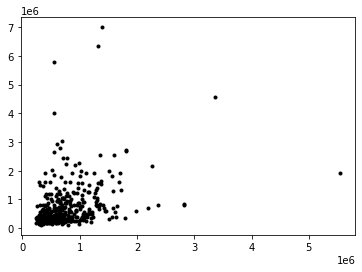

In [37]:
from sklearn.neighbors import KNeighborsRegressor

print('=' * 100)
time_start = datetime.datetime.now()
print('Training for KNeighborsRegressor started at: ', time_start)

knn_reg = KNeighborsRegressor()
knn_reg.fit(housing_prepared, housing_labels)

knn_finish = datetime.datetime.now()
print('Training for KNeighborsRegressor finished at: ', time_finish)
print('Training lasted for: ', time_finish-time_start)

test_pred_lab(knn_reg.predict(housing_prepared_test),housing_labels_test)

metrics_cross_val_score(knn_reg, housing_prepared, housing_prepared_test, housing_labels, housing_labels_test)

In [25]:
save_last_env()

[notebook_env_0.db] saved successfully.


In [39]:
def load_last_env():
    dbs = find_dbs('*.db','./')
    if(len(dbs) > 0):
        dill.load_session('notebook_env_' + str(len(dbs)-1) + '.db')
        print('[notebook_env_' + str(len(dbs)-1) + '.db] loaded successfully.')
    else:
        print('No [*.db] founded for load.')

load_last_env()

[notebook_env_1.db] loaded successfully.


In [40]:
lin_reg.coef_

array([ 1.78102989e-06,  1.34596150e-01,  4.73328505e-04, -3.69799303e-03,
       -1.46918417e-02, -7.29937266e-03,  4.04195223e-01, -7.48765873e-03,
       -1.59915580e-03, -1.37381717e-03,  2.53948483e-03,  2.93458011e-01,
       -6.72609186e-02,  3.64840805e-03, -3.64663220e-03, -1.09370208e-02,
        8.28270656e-03, -1.61379233e-03, -7.14234581e-03, -1.88657469e-02,
        7.60063876e-04,  4.77840753e-03,  6.45922709e-01, -1.29385581e+00])

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
[TEST]
Predictions & Labels 
  [[2055399.15041039 2007115.11153633]
 [ 365060.22337479  302244.72531346]
 [ 493580.9595891   480743.94481092]
 [1208558.28511002 1266749.0306662 ]
 [ 873705.91973413  861068.98635379]
 [ 436390.94556624  435104.93982577]
 [ 609013.93018984  602447.95810464]
 [ 403421.32836497  399607.93594844]
 [ 806900.84241301  805287.98026084]
 [ 694483.85953371  688654.96752102]
 [1280607.06097991 1033483.00518657]
 [ 398409.55709754  399607.93594844]
 [1813707.1504104  1773849.0860567 ]
 [ 336473.16769223  313400.92653205]
 [ 480476.19598167  480743.94481092]
 [ 346131.06674636  343826.92985548]
 [ 810070.94798328  758634.77516491]
 [ 145258.71856589  129830.70648069]
 [ 264492.14038975  257619.9204391 ]
 [ 990050.89964248 1003057.00186314]
 [ 904133.54577773  921920.99300065]
 [ 607760.33828491  602447.95810464]
 [1206294.59046276 1215024.82501637]
 [2666365.4675462

Scores: [0.00514147 0.01210359 0.04730537 0.01076636 0.00740124 0.01105553
 0.00448189 0.0097555  0.01319355 0.01444606]
Mean: 0.013565056347319429
Standard deviation: 0.011668569278704063
*************************
Sample:  Test
Scores: [0.01064515 0.04319258 0.02110133 0.04959652 0.03491946 0.02394687
 0.01461993 0.01014639 0.02035385 0.01837121]
Mean: 0.024689328575160544
Standard deviation: 0.012843920449011323
####################################################################################################
Metric:  r2
*************************
Sample:  Train
Scores: [0.98302866 0.96745421 0.83761738 0.9723883  0.98926775 0.97788848
 0.99186792 0.98338728 0.96818829 0.97121669]
Mean: 0.9642304972266625
Standard deviation: 0.042976598719086684
*************************
Sample:  Test
Scores: [0.95088292 0.48504783 0.93746085 0.86963295 0.89638138 0.90257195
 0.95069036 0.97006684 0.82053874 0.93957151]
Mean: 0.8722845344115392
Standard deviation: 0.13594004403095886


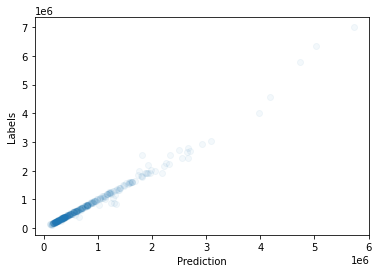

In [52]:
test_pred_lab(forest_reg.predict(housing_prepared_test),housing_labels_test)

metrics_cross_val_score(forest_reg, housing_prepared, housing_prepared_test, housing_labels, housing_labels_test)

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
[TEST]
Predictions & Labels 
  [[ 1.76336331e+06  2.00711511e+06]
 [ 4.33217797e+05  3.02244725e+05]
 [ 3.87156283e+05  4.80743945e+05]
 [ 1.30570560e+06  1.26674903e+06]
 [ 9.20940463e+05  8.61068986e+05]
 [ 4.31213863e+05  4.35104940e+05]
 [ 5.98103431e+05  6.02447958e+05]
 [ 4.11142107e+05  3.99607936e+05]
 [ 8.33633080e+05  8.05287980e+05]
 [ 7.33860498e+05  6.88654968e+05]
 [ 1.52790301e+06  1.03348301e+06]
 [ 4.00470894e+05  3.99607936e+05]
 [ 1.98894362e+06  1.77384909e+06]
 [ 2.19962283e+05  3.13400927e+05]
 [ 4.64112354e+05  4.80743945e+05]
 [ 2.47475235e+05  3.43826930e+05]
 [ 8.20647104e+05  7.58634775e+05]
 [-3.15585245e+05  1.29830706e+05]
 [ 3.15884852e+05  2.57619920e+05]
 [ 1.03871792e+06  1.00305700e+06]
 [ 9.67118009e+05  9.21920993e+05]
 [ 6.41010090e+05  6.02447958e+05]
 [ 1.17613473e+06  1.21502483e+06]
 [ 2.55556996e+06  2.43307916e+06]
 [ 7.35694027e+05  4.8581494

Scores: [0.02252297 0.03070486 0.01916767 0.04809133 0.03476029 0.01493967
 0.01345483 0.01675709 0.02194598 0.01622599]
Mean: 0.023857067362992646
Standard deviation: 0.010377207234948808
####################################################################################################
Metric:  r2
*************************
Sample:  Train
Scores: [0.76523648 0.92990899 0.84240937 0.91986718 0.95315921 0.89137791
 0.86932721 0.92408936 0.93599592 0.92945423]
Mean: 0.8960825849371588
Standard deviation: 0.05403544668166135
*************************
Sample:  Test
Scores: [0.7883769  0.76625971 0.94129361 0.88055597 0.89483417 0.95366086
 0.95767098 0.92118415 0.78640223 0.94702992]
Mean: 0.8837268491347696
Standard deviation: 0.07181811198904035


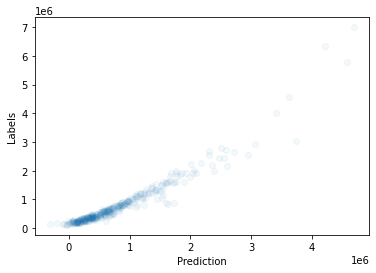

In [53]:
test_pred_lab(lin_reg.predict(housing_prepared_test),housing_labels_test)

metrics_cross_val_score(lin_reg, housing_prepared, housing_prepared_test, housing_labels, housing_labels_test)

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
[TEST]
Predictions & Labels 
  [[1976689.1082129  2007115.11153633]
 [ 485814.94536482  302244.72531346]
 [ 475672.94425701  480743.94481092]
 [1216039.02512715 1266749.0306662 ]
 [ 906707.99133894  861068.98635379]
 [ 435104.93982577  435104.93982577]
 [ 597376.95755073  602447.95810464]
 [ 419891.93816406  399607.93594844]
 [ 769790.9763835   805287.98026084]
 [ 703867.96918274  688654.96752102]
 [1413808.04672944 1033483.00518657]
 [ 430033.93927187  399607.93594844]
 [1616648.06888564 1773849.0860567 ]
 [ 394536.93539453  313400.92653205]
 [ 475672.94425701  480743.94481092]
 [ 353968.93096329  343826.92985548]
 [ 729222.97195226  758634.77516491]
 [ 125773.90603756  129830.70648069]
 [ 262690.920993    257619.9204391 ]
 [1008128.00241704 1003057.00186314]
 [ 891494.98967722  921920.99300065]
 [ 541595.95145778  602447.95810464]
 [1215024.82501637 1215024.82501637]
 [3143019.2356110

Scores: [0.01265367 0.05311296 0.04248781 0.03766494 0.03078511 0.03116194
 0.01922731 0.01931401 0.01728129 0.01443278]
Mean: 0.02781218333052977
Standard deviation: 0.012799403451487917
####################################################################################################
Metric:  r2
*************************
Sample:  Train
Scores: [ 0.93246412 -0.51494114  0.79493144  0.94419078  0.96394082  0.96146311
  0.92509003  0.89392976  0.91400451  0.93136988]
Mean: 0.7746443299702515
Standard deviation: 0.4322819495209547
*************************
Sample:  Test
Scores: [0.89960306 0.17244507 0.90043001 0.93179226 0.97508518 0.75808869
 0.91144587 0.95560383 0.52275309 0.97451993]
Mean: 0.8001766995720574
Standard deviation: 0.24648898617763235


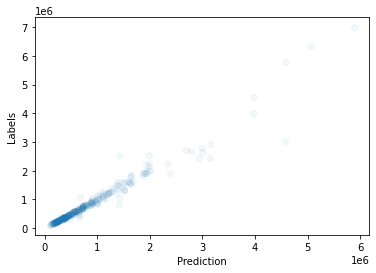

In [54]:
test_pred_lab(tree_reg.predict(housing_prepared_test),housing_labels_test)

metrics_cross_val_score(tree_reg, housing_prepared, housing_prepared_test, housing_labels, housing_labels_test)

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
[TEST]
Predictions & Labels 
  [[1023341.00407876 2007115.11153633]
 [1018270.00352485  302244.72531346]
 [ 631656.92129513  480743.94481092]
 [ 891292.14965507 1266749.0306662 ]
 [ 755592.17483257  861068.98635379]
 [ 659243.16430837  435104.93982577]
 [ 930034.5938869   602447.95810464]
 [1127803.6154892   399607.93594844]
 [ 961069.1172768   805287.98026084]
 [ 655794.88393172  688654.96752102]
 [ 683583.96696712 1033483.00518657]
 [ 956200.95674505  399607.93594844]
 [ 665125.5249509  1773849.0860567 ]
 [ 440581.62042399  313400.92653205]
 [ 673441.96585931  480743.94481092]
 [ 698796.96862883  343826.92985548]
 [ 399405.09592628  758634.77516491]
 [ 365733.65224835  129830.70648069]
 [ 770602.33647213  257619.9204391 ]
 [1044639.20640516 1003057.00186314]
 [1279933.63210635  921920.99300065]
 [1453361.8510499   602447.95810464]
 [ 781961.37771288 1215024.82501637]
 [ 778918.7773805

Scores: [-8.72301973e-01 -6.76984231e+00 -5.61991196e-03 -2.04052296e-01
 -1.62405170e-01 -2.02372737e-01 -1.56729635e-01 -2.42495394e-01
  3.28957252e-02 -3.14828319e-01]
Mean: -0.8897752016877909
Standard deviation: 1.9740122281029922
*************************
Sample:  Test
Scores: [-0.06131318 -1.4847814  -0.19550331  0.02691887 -0.10227902 -0.13134717
 -0.31808681 -0.4927439  -0.50583499 -0.12381985]
Mean: -0.33887907473021256
Standard deviation: 0.417346407384406


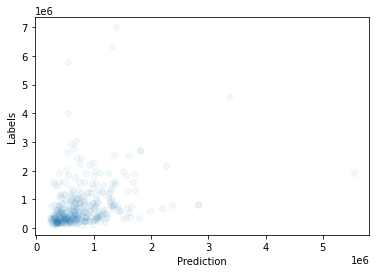

In [55]:
test_pred_lab(knn_reg.predict(housing_prepared_test),housing_labels_test)

metrics_cross_val_score(knn_reg, housing_prepared, housing_prepared_test, housing_labels, housing_labels_test)